# Training

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader
import tqdm

import matplotlib.pyplot as plt

In [2]:
from src.starcattovae.training.data import Data

from src.starcattovae.nn.decoder import Decoder
from src.starcattovae.nn.encoder import Encoder
from src.starcattovae.nn.model import Model

from src.starcattovae.plotting import plot_loss
from src.starcattovae.plotting import plot_reconstruction
from src.starcattovae.plotting import plot_waveform_grid

In [3]:
manualSeed = 99
np.random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True) # Needed for reproducible results

### Define Parameters

In [4]:
# configure parameters
if torch.backends.mps.is_available() and torch.backends.mps.is_built():
    DEVICE = "mps"
else:
    DEVICE = "cpu"

print(f"Using device: {DEVICE}")

# model parameters
batch_size = 32
epochs = 320

x_dim = 256
hidden_dim = 512
latent_dim = 128
lr = 1e-3

Using device: mps


## Load Training Data

In [5]:
np.random.seed(42)
indices = np.arange(1684) # this is the number of signals minus all the signals with beta_IC_b less than 0
np.random.shuffle(indices)
split_ratio = 0.9
split_idx = int(len(indices) * split_ratio)
train_indices = indices[:split_idx]
test_indices = indices[split_idx:]

# Create train and test datasets
train_dataset = Data(indices=train_indices, train=True)
test_dataset = Data(indices=test_indices, train=False)

# Check for overlap
train_indices_set = set(train_dataset.get_indices())
test_indices_set = set(test_dataset.get_indices())

overlap = train_indices_set.intersection(test_indices_set)
if len(overlap) == 0:
    print("Train and test sets are different.")
else:
    print("Train and test sets have overlap.")

Train and test sets are different.


In [6]:
train_dataset.summary()
test_dataset.summary()

2024-11-13 23:20:24.188 | INFO     | src.starcattovae.training.data:summary:96 - Signal Dataset mean: -0.524 +/- 39.879
Signal Dataset scaling factor (to match noise in generator): 5
Signal Dataset max value: 656.2575073242188
Signal Dataset shape: (256, 1515)

2024-11-13 23:20:24.189 | INFO     | src.starcattovae.training.data:summary:96 - Signal Dataset mean: -0.444 +/- 38.309
Signal Dataset scaling factor (to match noise in generator): 5
Signal Dataset max value: 626.9296875
Signal Dataset shape: (256, 169)



In [7]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

## Load Autoencoders

In [8]:
encoder = Encoder(input_dim=x_dim, hidden_dim=hidden_dim, latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim, hidden_dim = hidden_dim, output_dim = x_dim)

model = Model(Encoder=encoder, Decoder=decoder, DEVICE=DEVICE).to(DEVICE)

### Loss Function

In [9]:
def loss_function(x, x_hat, mean, log_var):
    # reproduction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    reproduction_loss = nn.functional.mse_loss(x_hat, x, reduction='sum')
    reproduction_loss *= 1 * 256
    KLD = - 0.5 * torch.sum(1+ log_var - mean.pow(2) - log_var.exp())
    total_loss = reproduction_loss + KLD
    return total_loss, reproduction_loss, KLD

optimizer = Adam(model.parameters(), lr=lr)

### Train VAE

Start training VAE...
Epoch 1 complete! 	Average Loss: 229.5745
Epoch 2 complete! 	Average Loss: 122.8103
Epoch 3 complete! 	Average Loss: 97.9915
Epoch 4 complete! 	Average Loss: 85.2261
Epoch 5 complete! 	Average Loss: 82.6511
Epoch 6 complete! 	Average Loss: 76.8322
Epoch 7 complete! 	Average Loss: 71.8203
Epoch 8 complete! 	Average Loss: 67.6583
Epoch 9 complete! 	Average Loss: 64.0247
Epoch 10 complete! 	Average Loss: 61.5610


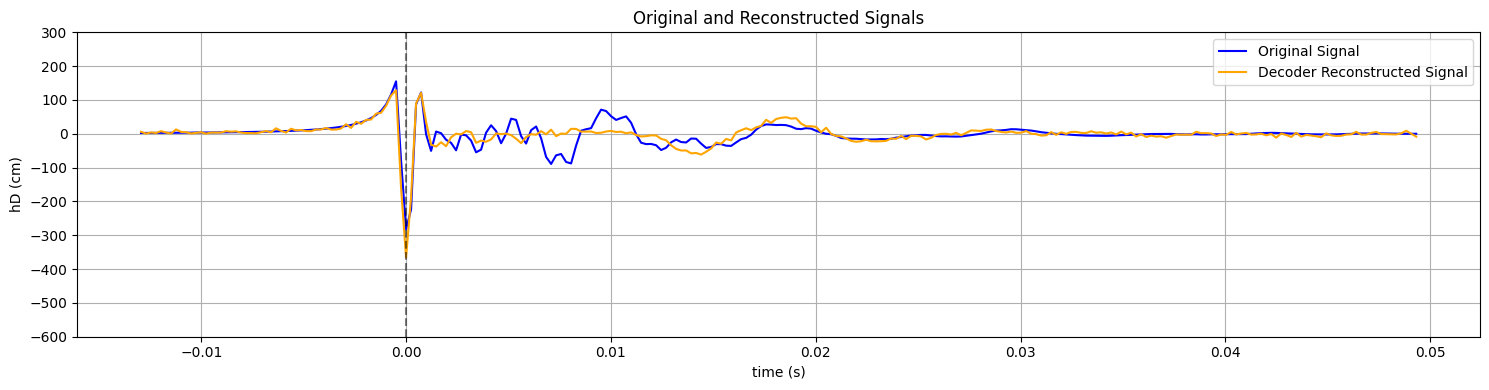

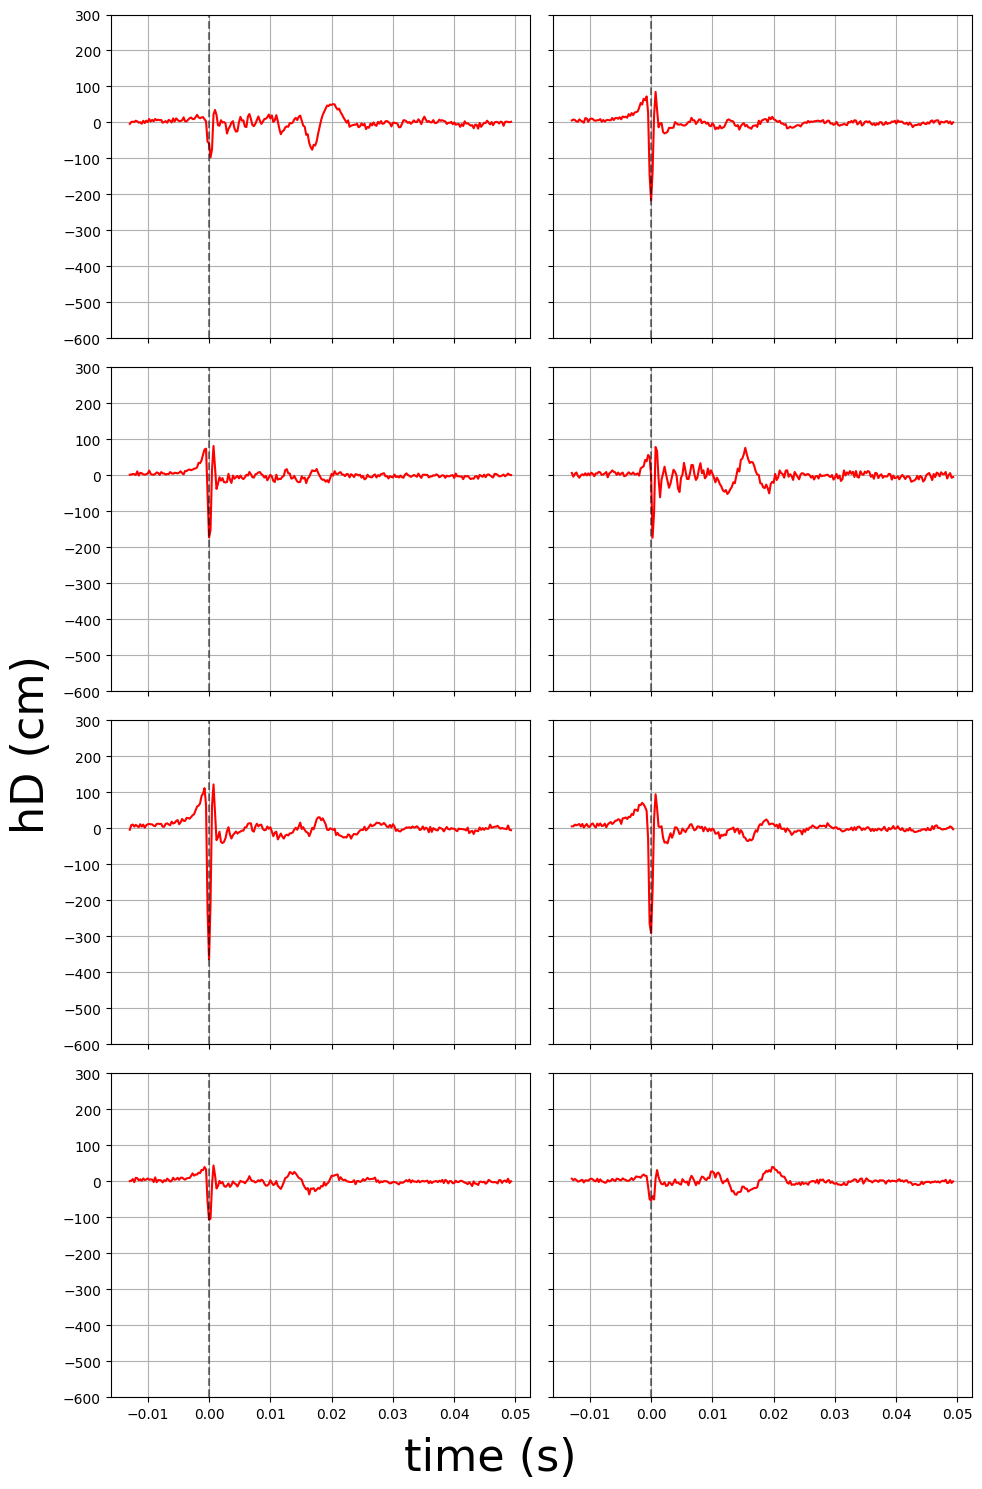

Epoch 11 complete! 	Average Loss: 59.5305
Epoch 12 complete! 	Average Loss: 57.1082
Epoch 13 complete! 	Average Loss: 55.5192
Epoch 14 complete! 	Average Loss: 54.0400
Epoch 15 complete! 	Average Loss: 52.0393
Epoch 16 complete! 	Average Loss: 50.8483
Epoch 17 complete! 	Average Loss: 49.9611
Epoch 18 complete! 	Average Loss: 48.4087
Epoch 19 complete! 	Average Loss: 47.7884
Epoch 20 complete! 	Average Loss: 47.1765


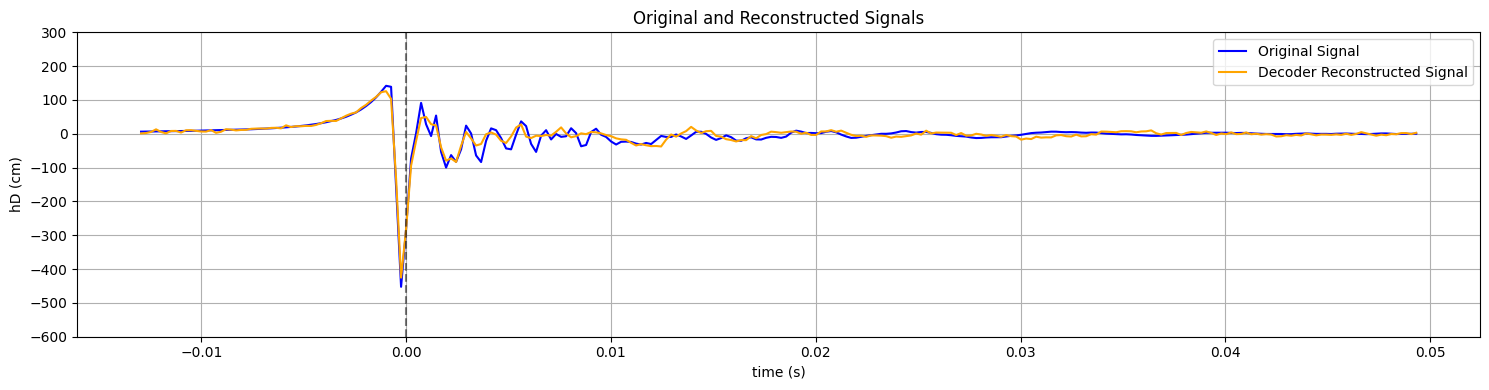

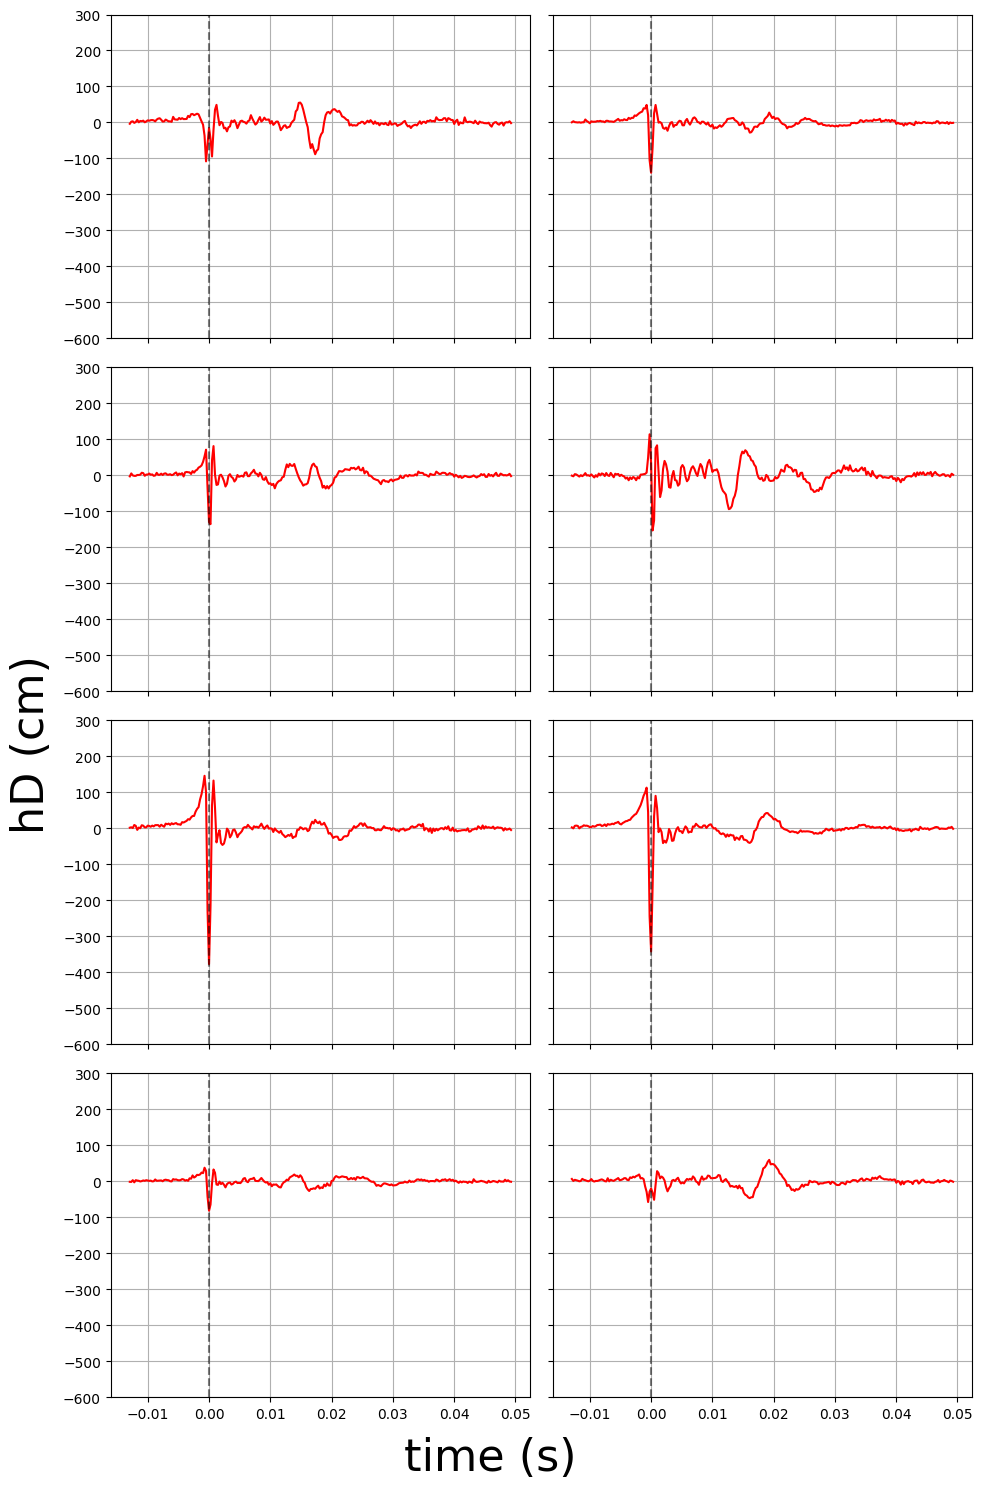

Epoch 21 complete! 	Average Loss: 46.4194
Epoch 22 complete! 	Average Loss: 45.4347
Epoch 23 complete! 	Average Loss: 45.2746
Epoch 24 complete! 	Average Loss: 44.9217
Epoch 25 complete! 	Average Loss: 44.5364
Epoch 26 complete! 	Average Loss: 43.9549
Epoch 27 complete! 	Average Loss: 43.4133
Epoch 28 complete! 	Average Loss: 42.8955
Epoch 29 complete! 	Average Loss: 42.8774
Epoch 30 complete! 	Average Loss: 41.7482


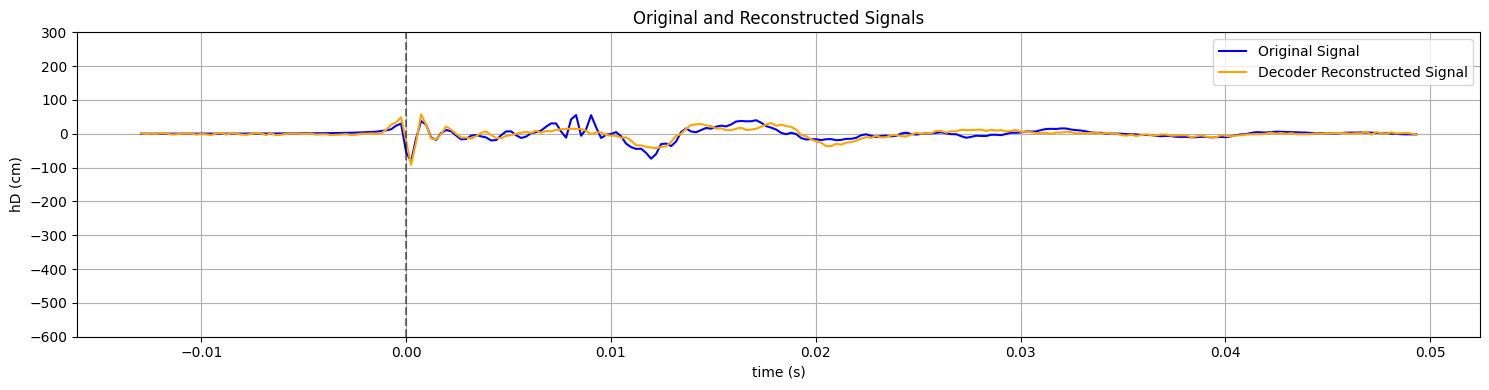

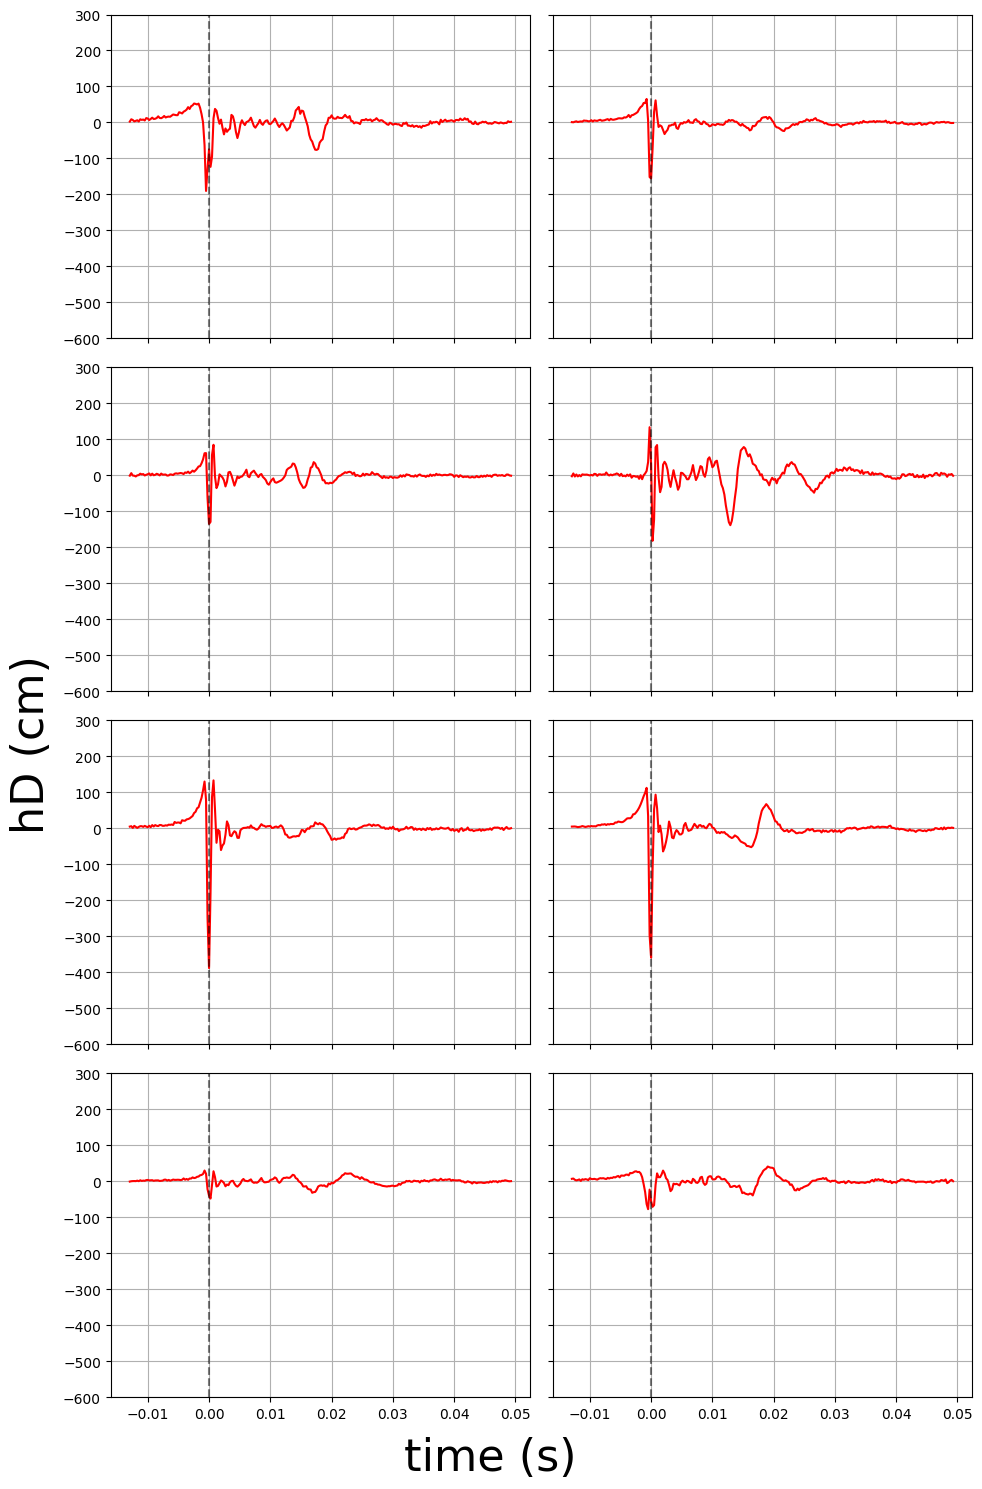

Epoch 31 complete! 	Average Loss: 41.5807
Epoch 32 complete! 	Average Loss: 41.7299
Epoch 33 complete! 	Average Loss: 41.4623
Epoch 34 complete! 	Average Loss: 40.7454
Epoch 35 complete! 	Average Loss: 40.3205
Epoch 36 complete! 	Average Loss: 40.3429
Epoch 37 complete! 	Average Loss: 40.2632
Epoch 38 complete! 	Average Loss: 39.5748
Epoch 39 complete! 	Average Loss: 39.2466
Epoch 40 complete! 	Average Loss: 39.1042


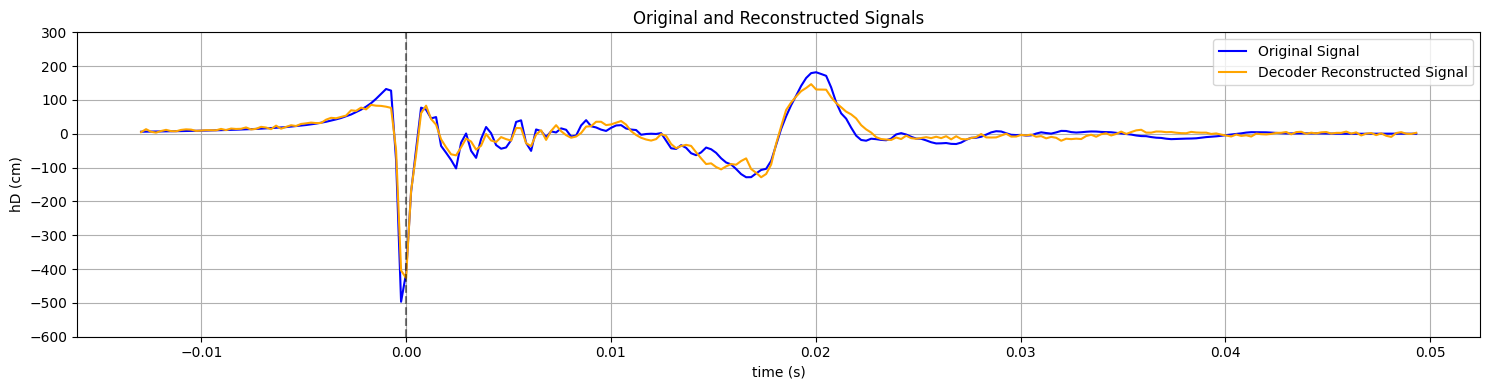

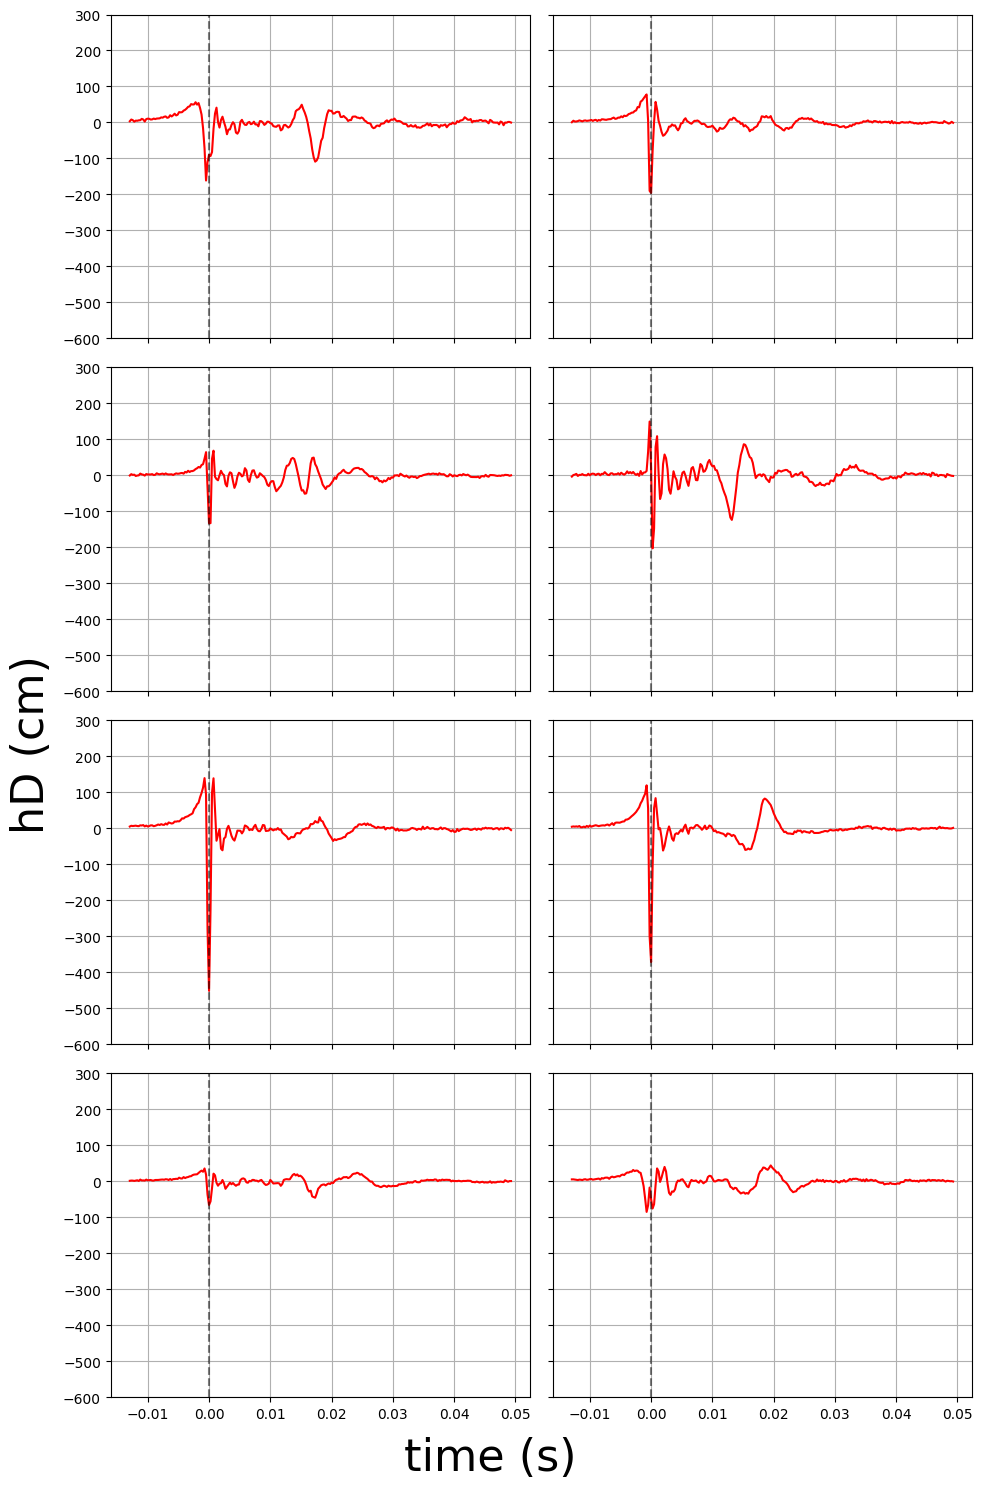

Epoch 41 complete! 	Average Loss: 38.7969
Epoch 42 complete! 	Average Loss: 39.1751
Epoch 43 complete! 	Average Loss: 38.6608
Epoch 44 complete! 	Average Loss: 38.2873
Epoch 45 complete! 	Average Loss: 38.0715
Epoch 46 complete! 	Average Loss: 37.5635
Epoch 47 complete! 	Average Loss: 37.5194
Epoch 48 complete! 	Average Loss: 38.1672
Epoch 49 complete! 	Average Loss: 37.1813
Epoch 50 complete! 	Average Loss: 36.9881


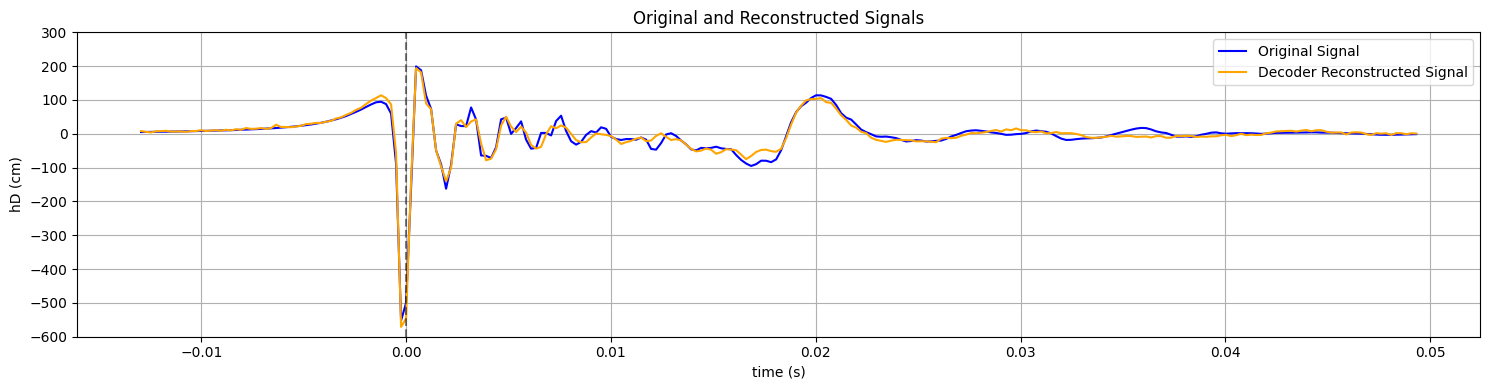

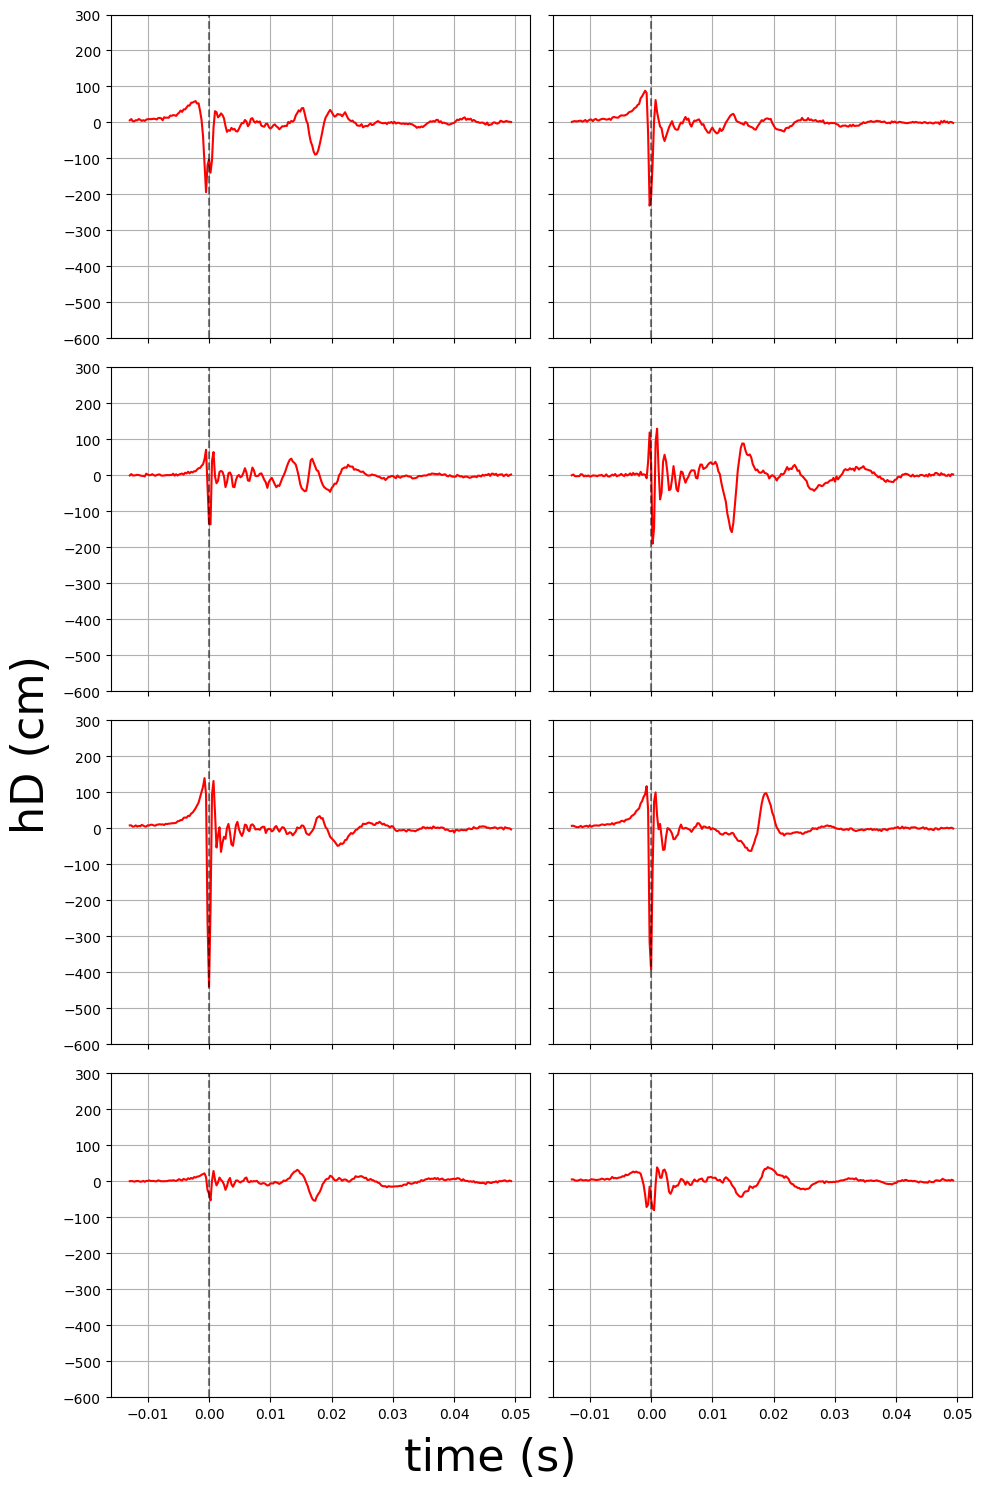

Epoch 51 complete! 	Average Loss: 37.0494
Epoch 52 complete! 	Average Loss: 37.2090
Epoch 53 complete! 	Average Loss: 36.3085
Epoch 54 complete! 	Average Loss: 36.5093
Epoch 55 complete! 	Average Loss: 36.1781
Epoch 56 complete! 	Average Loss: 36.0138
Epoch 57 complete! 	Average Loss: 36.0905
Epoch 58 complete! 	Average Loss: 35.5582
Epoch 59 complete! 	Average Loss: 35.8579
Epoch 60 complete! 	Average Loss: 35.6353


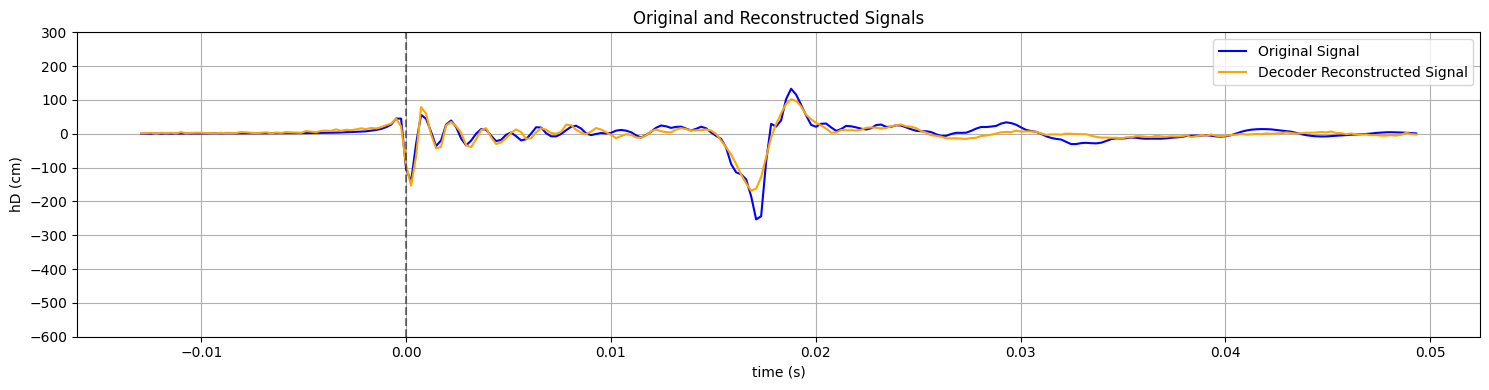

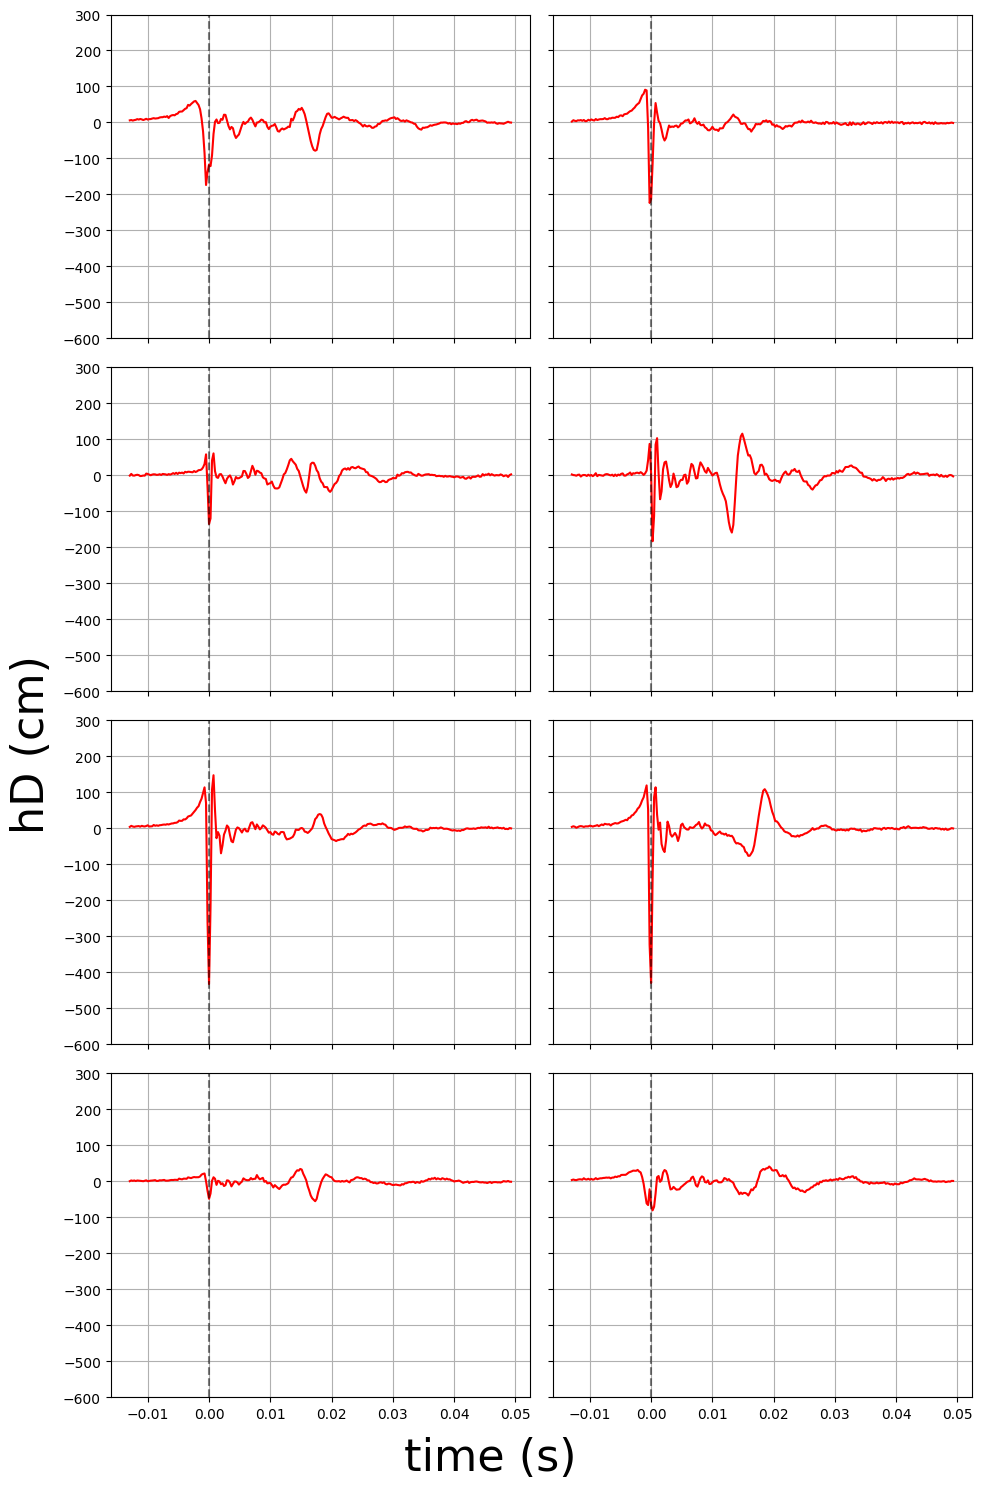

Epoch 61 complete! 	Average Loss: 35.0590
Epoch 62 complete! 	Average Loss: 35.1228
Epoch 63 complete! 	Average Loss: 35.2418
Epoch 64 complete! 	Average Loss: 35.3017
Epoch 65 complete! 	Average Loss: 34.6669
Epoch 66 complete! 	Average Loss: 34.6419
Epoch 67 complete! 	Average Loss: 34.6967
Epoch 68 complete! 	Average Loss: 34.6461
Epoch 69 complete! 	Average Loss: 34.4956
Epoch 70 complete! 	Average Loss: 34.2262


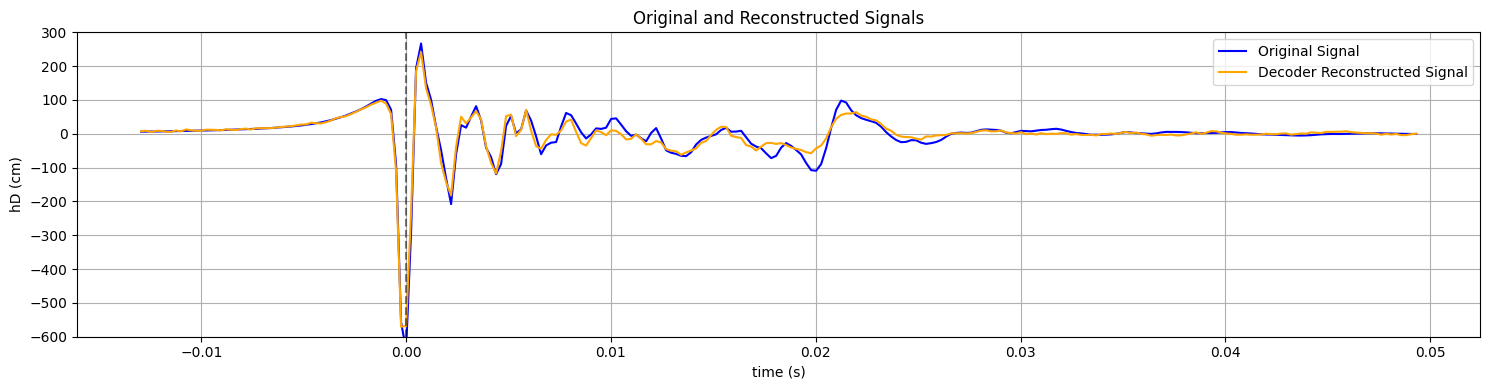

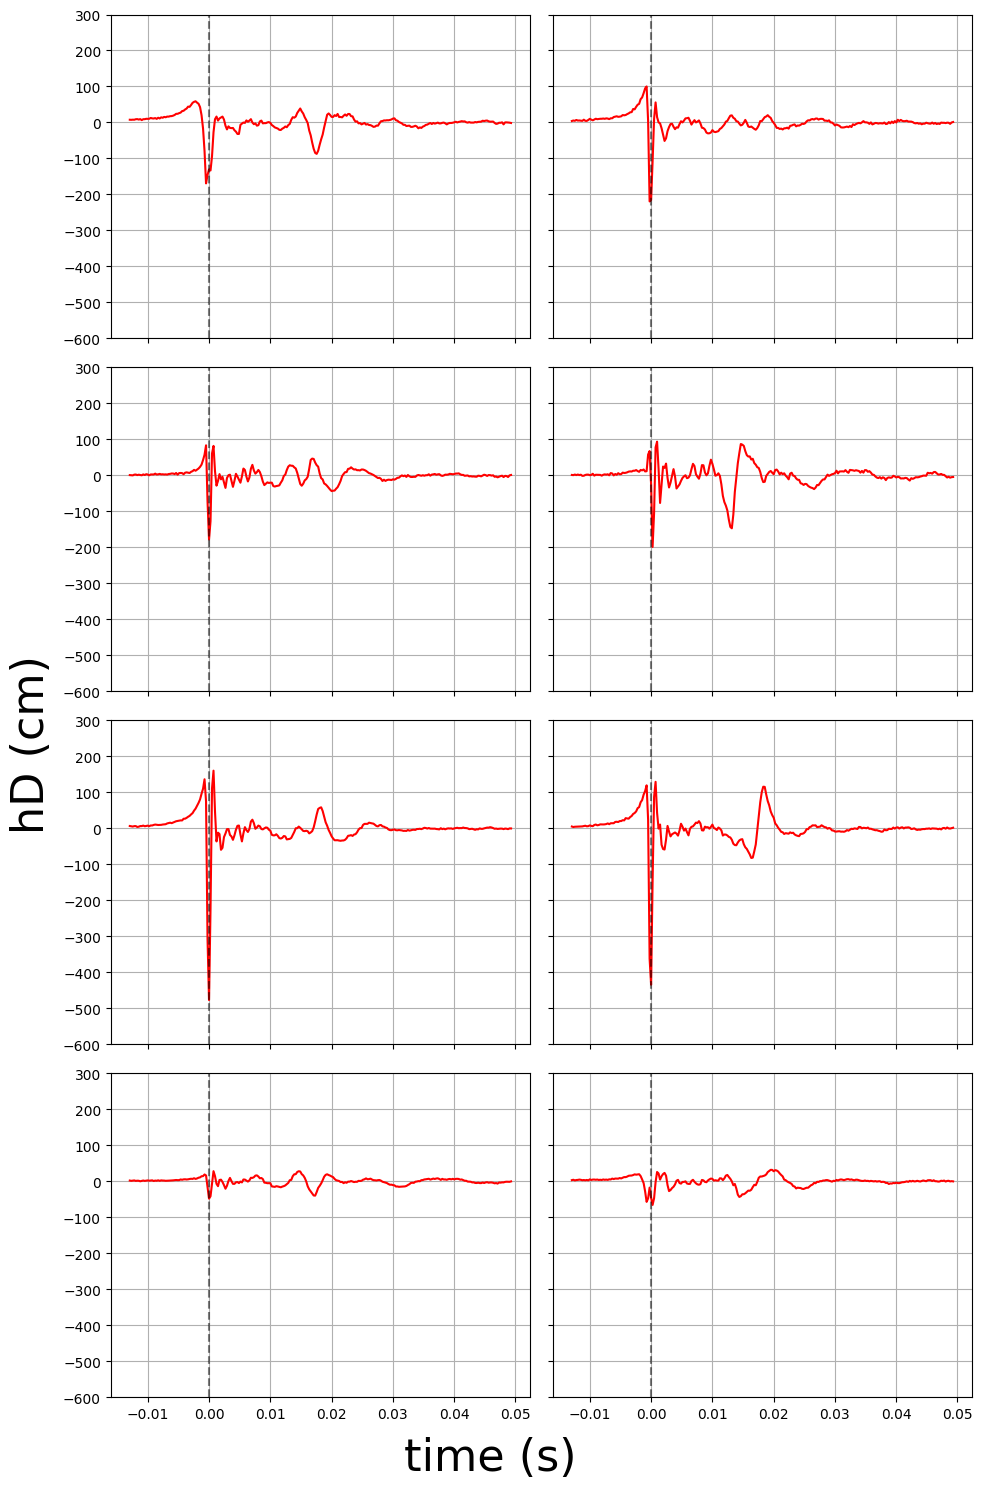

Epoch 71 complete! 	Average Loss: 33.8889
Epoch 72 complete! 	Average Loss: 34.1199
Epoch 73 complete! 	Average Loss: 33.7410
Epoch 74 complete! 	Average Loss: 34.1885
Epoch 75 complete! 	Average Loss: 33.9288
Epoch 76 complete! 	Average Loss: 34.0134
Epoch 77 complete! 	Average Loss: 33.7862
Epoch 78 complete! 	Average Loss: 33.3434
Epoch 79 complete! 	Average Loss: 33.4717
Epoch 80 complete! 	Average Loss: 33.6874


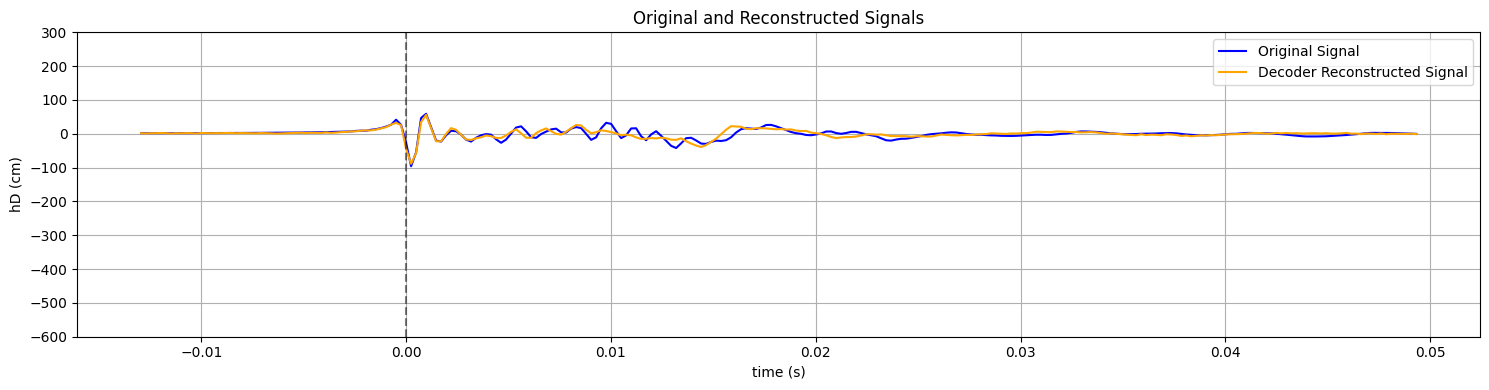

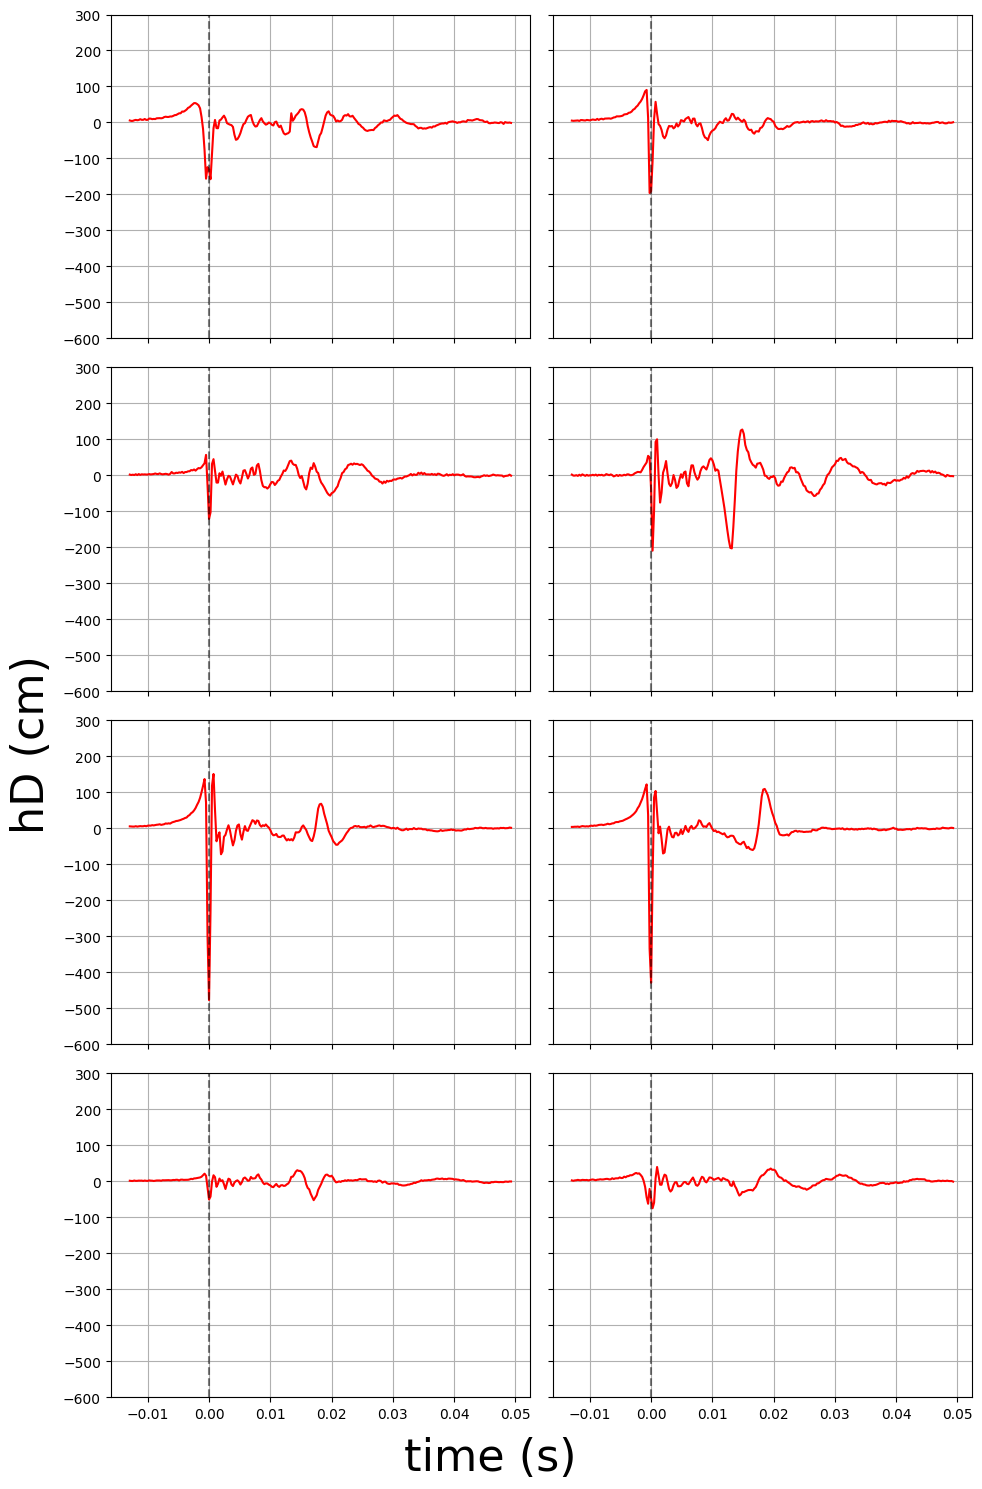

Epoch 81 complete! 	Average Loss: 33.2399
Epoch 82 complete! 	Average Loss: 33.0034
Epoch 83 complete! 	Average Loss: 32.9697
Epoch 84 complete! 	Average Loss: 32.8730
Epoch 85 complete! 	Average Loss: 33.4785
Epoch 86 complete! 	Average Loss: 32.9828
Epoch 87 complete! 	Average Loss: 32.8503
Epoch 88 complete! 	Average Loss: 32.5679
Epoch 89 complete! 	Average Loss: 32.8524
Epoch 90 complete! 	Average Loss: 32.7784


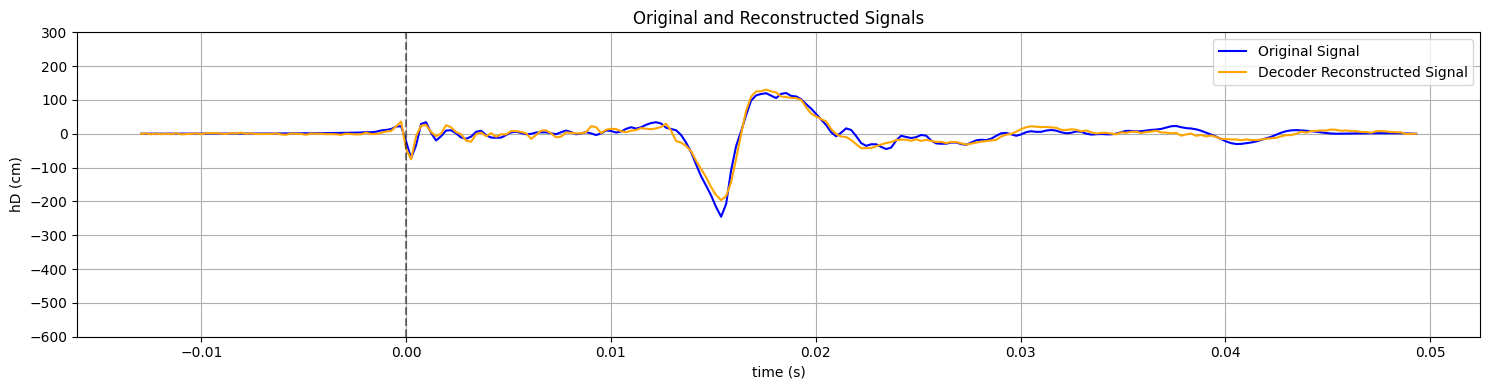

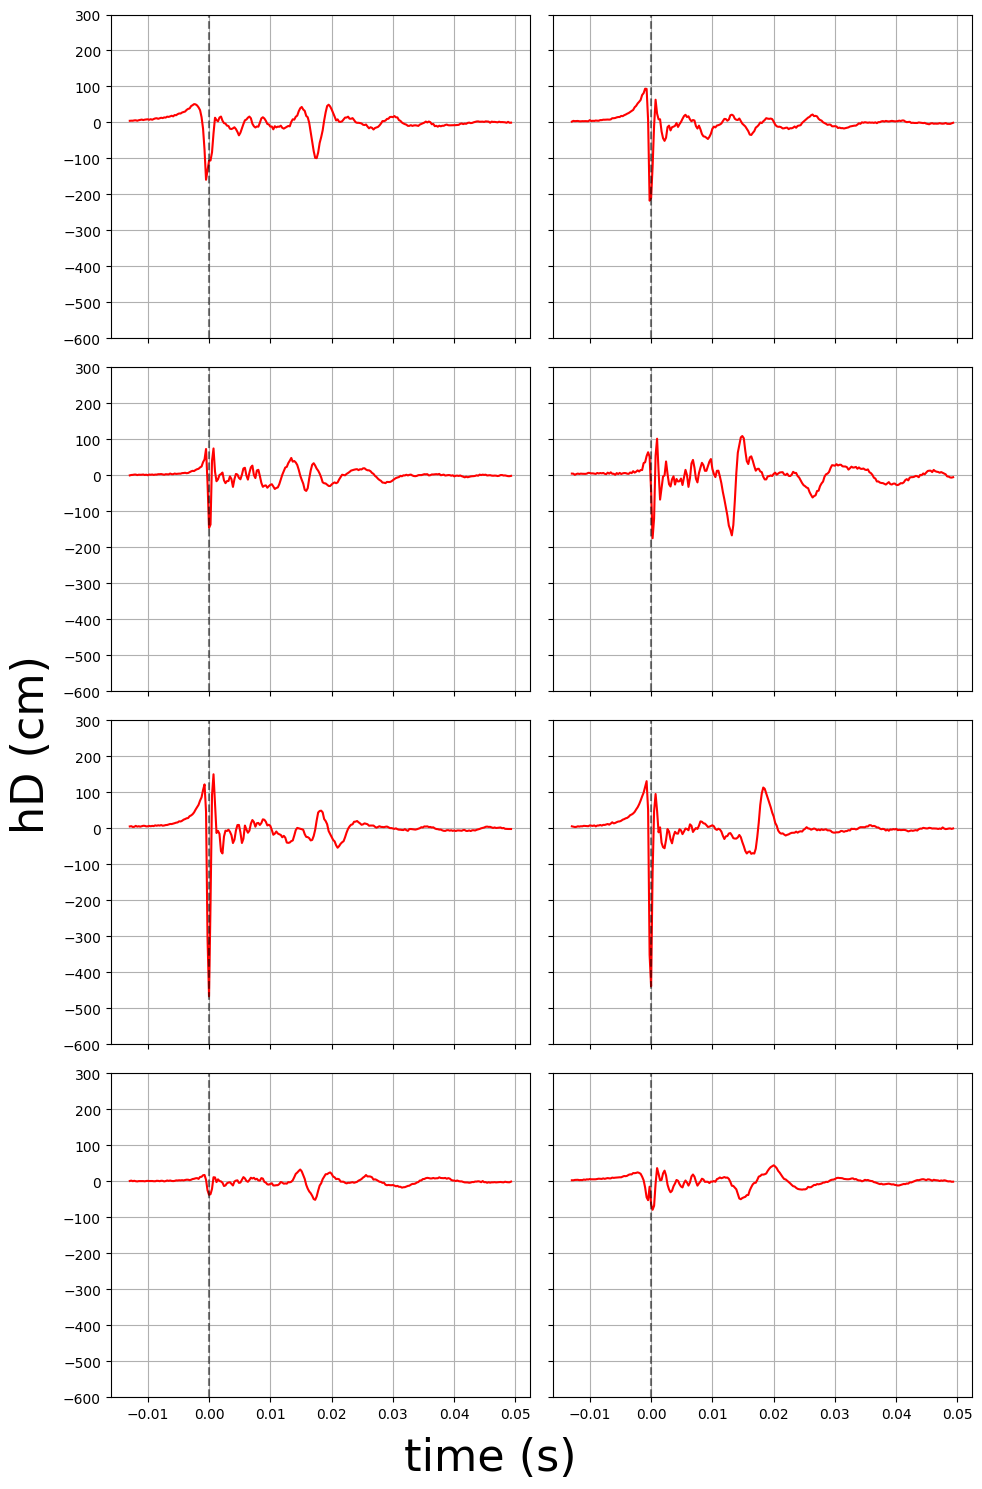

Epoch 91 complete! 	Average Loss: 32.2182
Epoch 92 complete! 	Average Loss: 32.5372
Epoch 93 complete! 	Average Loss: 32.5419
Epoch 94 complete! 	Average Loss: 32.6266
Epoch 95 complete! 	Average Loss: 32.5353
Epoch 96 complete! 	Average Loss: 32.5476
Epoch 97 complete! 	Average Loss: 31.9940
Epoch 98 complete! 	Average Loss: 32.1316
Epoch 99 complete! 	Average Loss: 31.8961
Epoch 100 complete! 	Average Loss: 32.0084


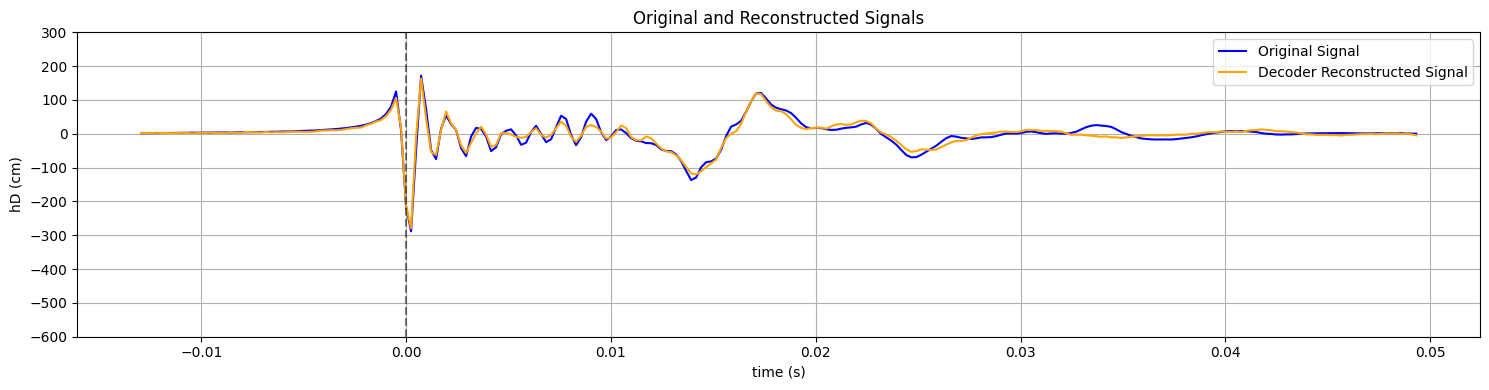

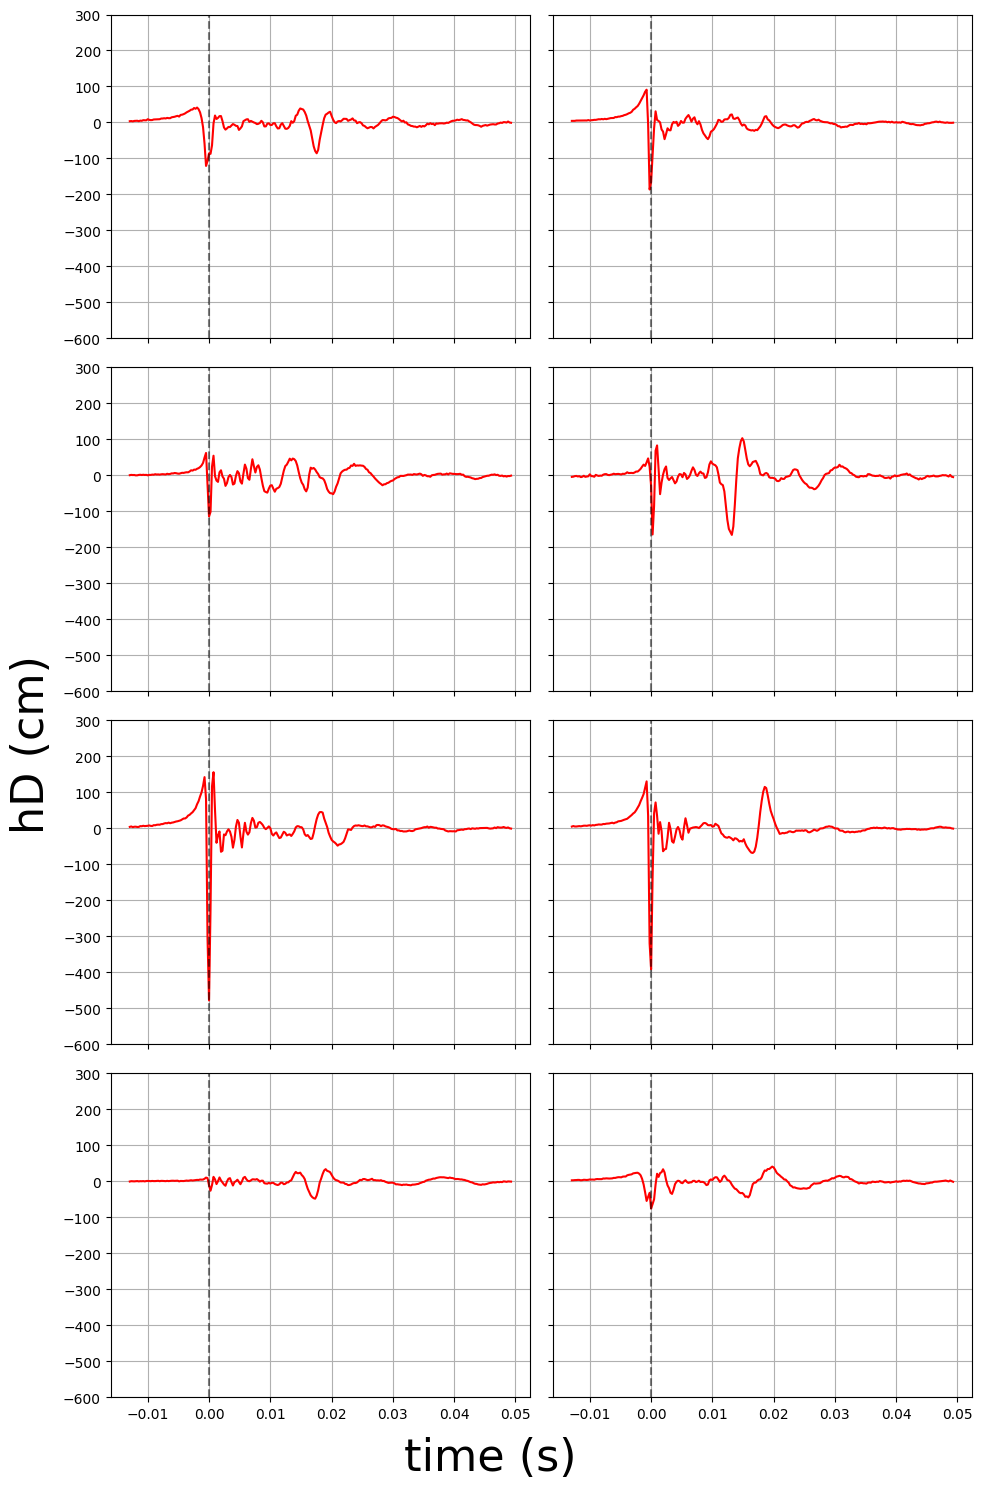

Epoch 101 complete! 	Average Loss: 31.9394
Epoch 102 complete! 	Average Loss: 32.0429
Epoch 103 complete! 	Average Loss: 31.9751
Epoch 104 complete! 	Average Loss: 31.9429
Epoch 105 complete! 	Average Loss: 31.5531
Epoch 106 complete! 	Average Loss: 32.2915
Epoch 107 complete! 	Average Loss: 31.6590
Epoch 108 complete! 	Average Loss: 31.4823
Epoch 109 complete! 	Average Loss: 31.7044
Epoch 110 complete! 	Average Loss: 31.5389


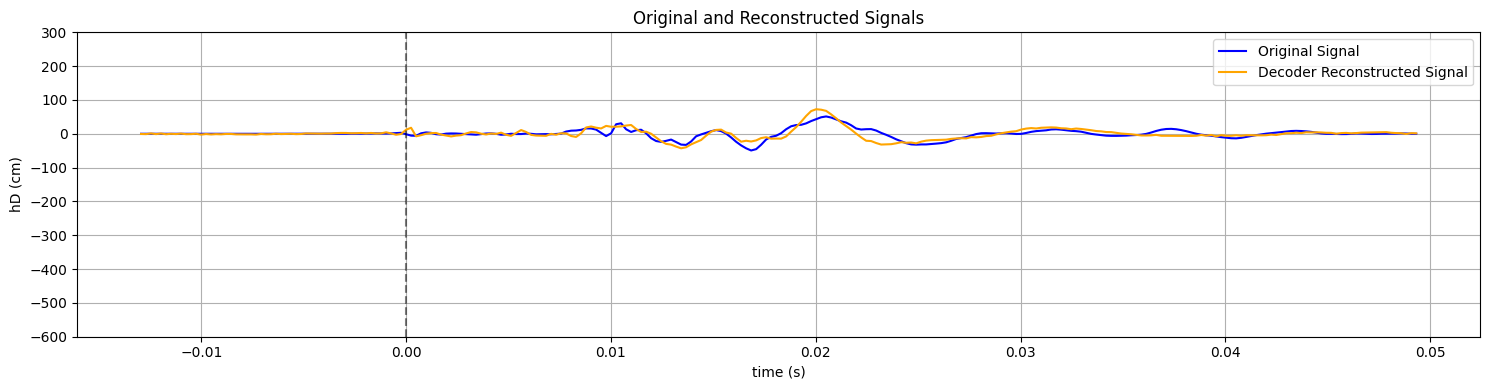

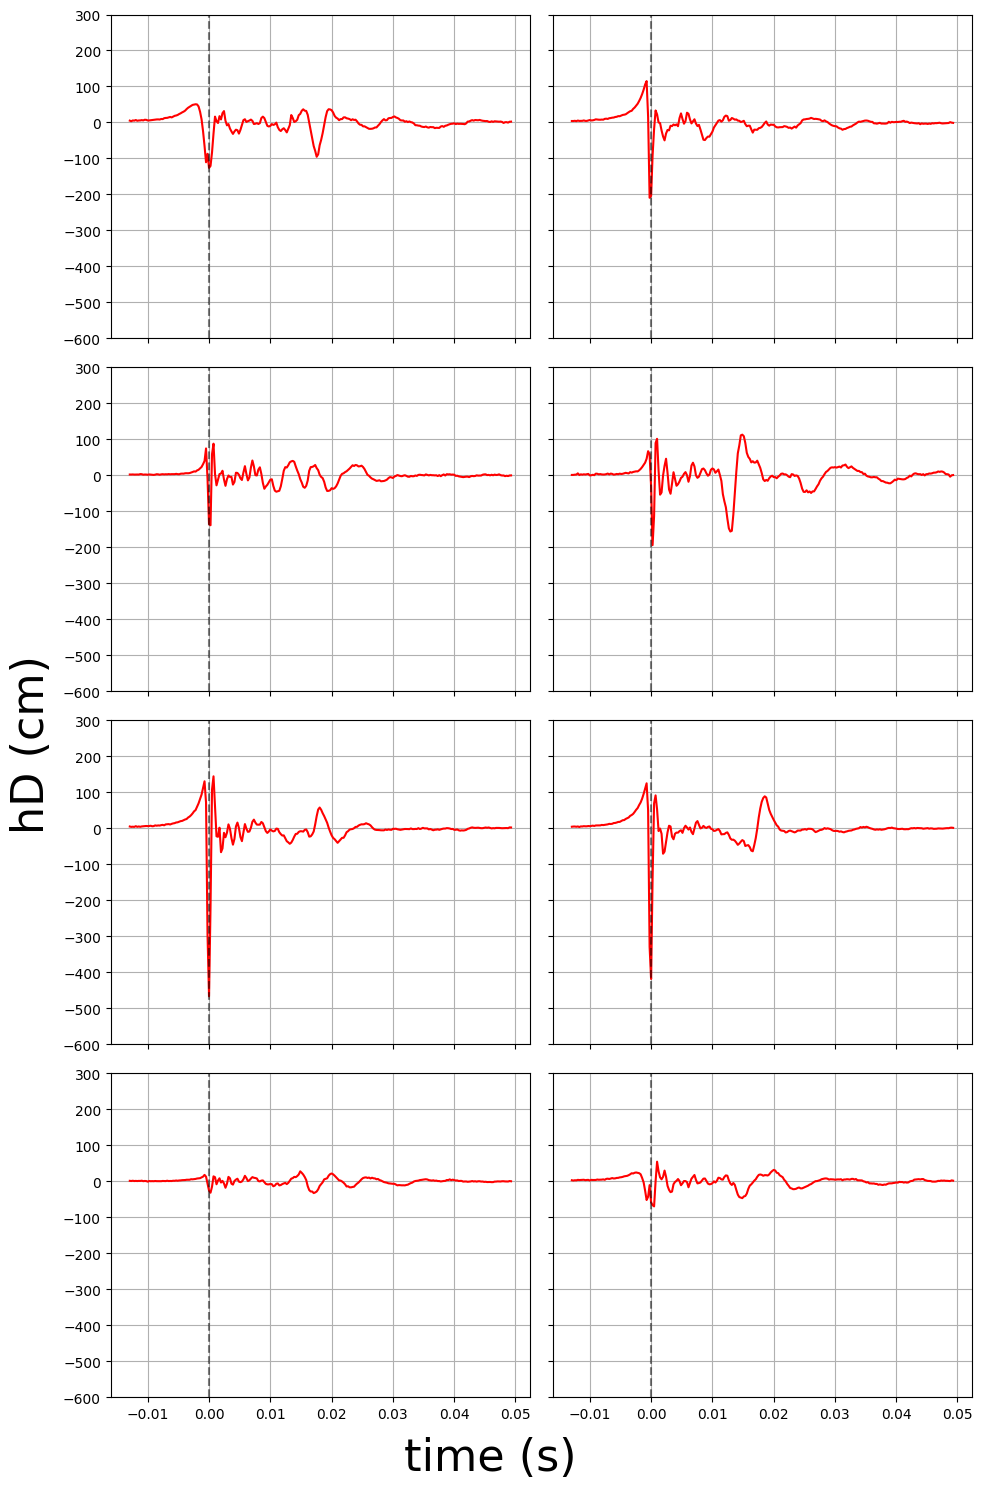

Epoch 111 complete! 	Average Loss: 31.4817
Epoch 112 complete! 	Average Loss: 31.7320
Epoch 113 complete! 	Average Loss: 31.7961
Epoch 114 complete! 	Average Loss: 31.5461
Epoch 115 complete! 	Average Loss: 31.2640
Epoch 116 complete! 	Average Loss: 31.2584
Epoch 117 complete! 	Average Loss: 31.2909
Epoch 118 complete! 	Average Loss: 31.3059
Epoch 119 complete! 	Average Loss: 30.9948
Epoch 120 complete! 	Average Loss: 31.1246


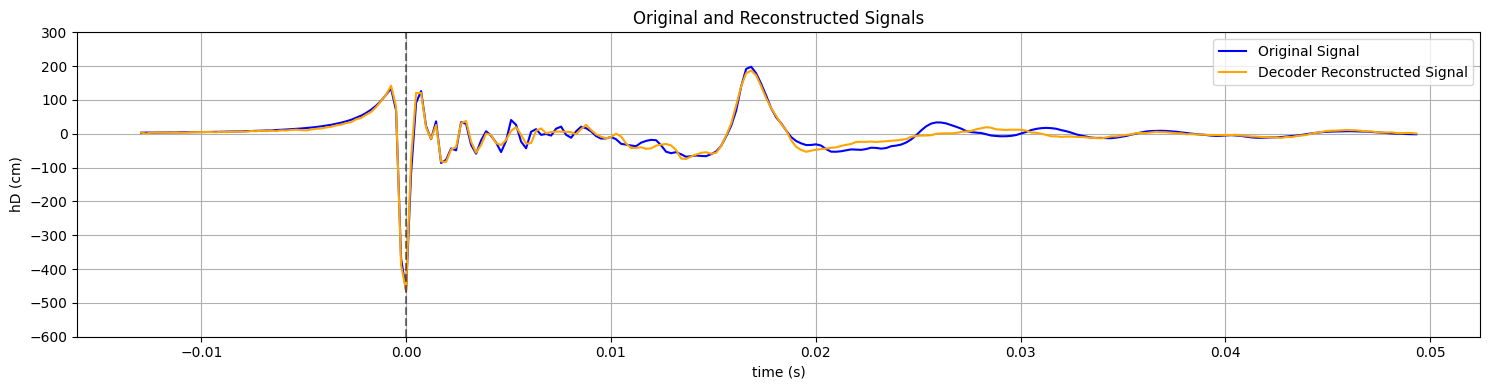

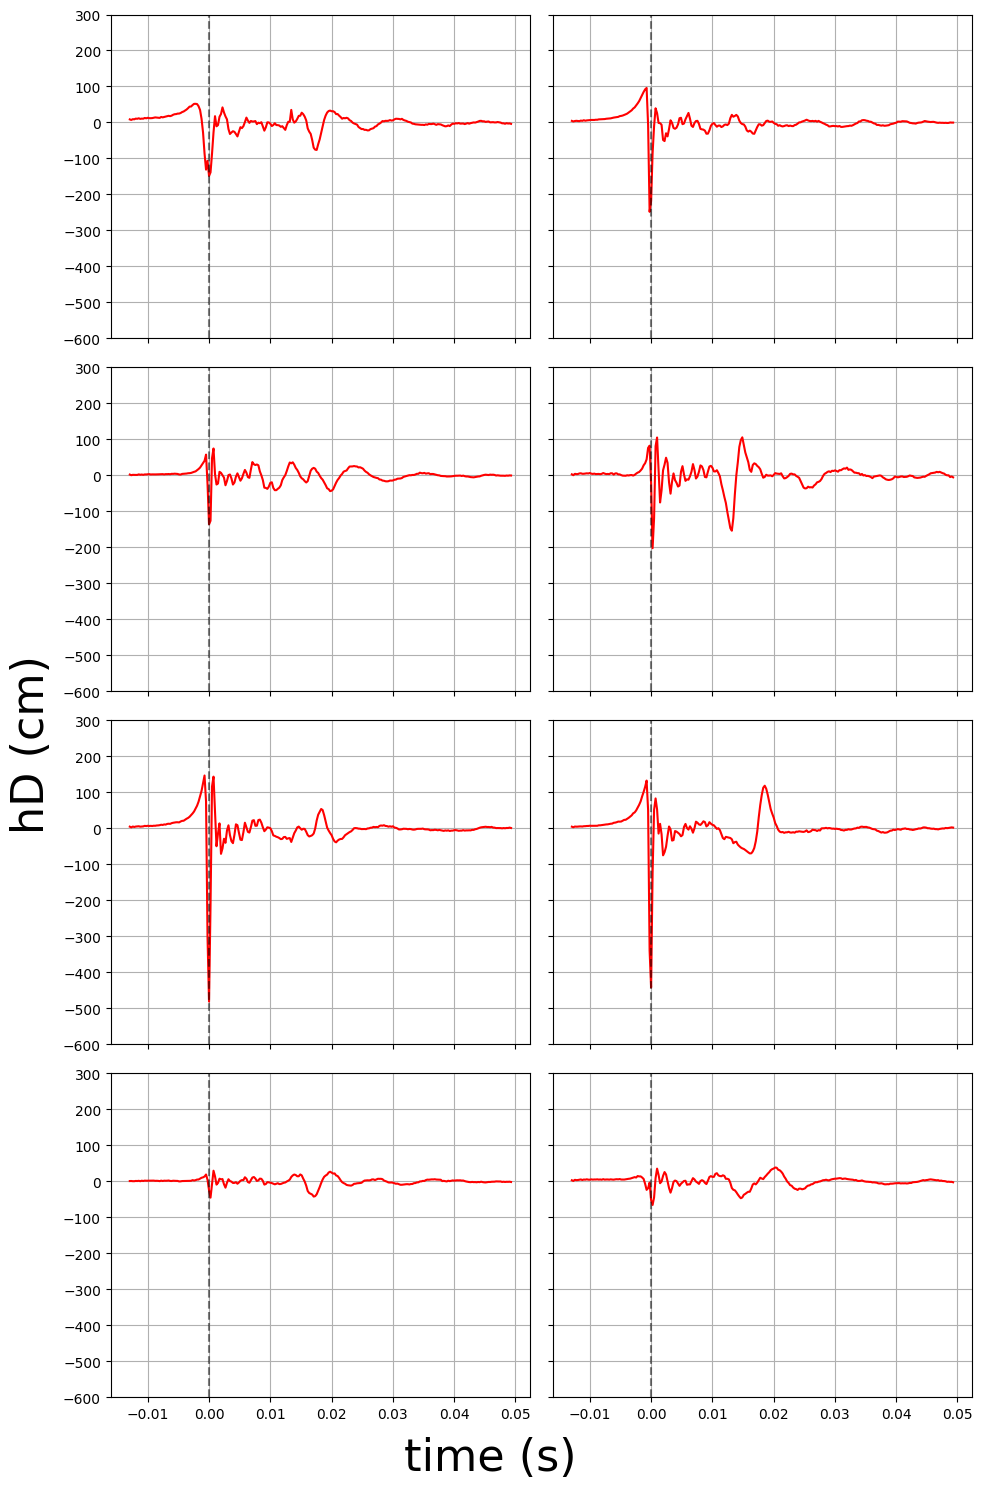

Epoch 121 complete! 	Average Loss: 31.1238
Epoch 122 complete! 	Average Loss: 31.1193
Epoch 123 complete! 	Average Loss: 31.0118
Epoch 124 complete! 	Average Loss: 31.0312
Epoch 125 complete! 	Average Loss: 30.7707
Epoch 126 complete! 	Average Loss: 30.7975
Epoch 127 complete! 	Average Loss: 30.8224
Epoch 128 complete! 	Average Loss: 30.7783
Epoch 129 complete! 	Average Loss: 30.9523
Epoch 130 complete! 	Average Loss: 30.8995


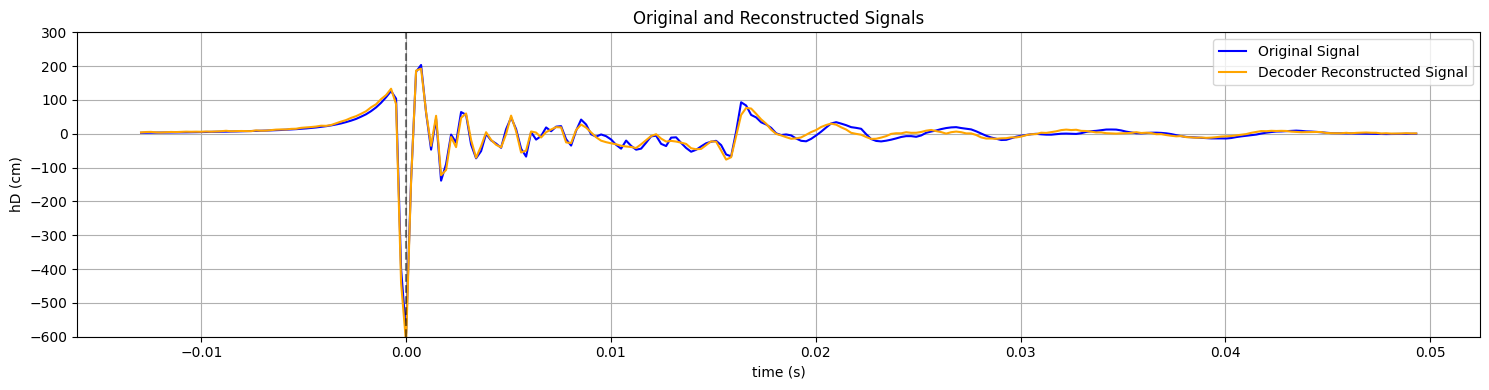

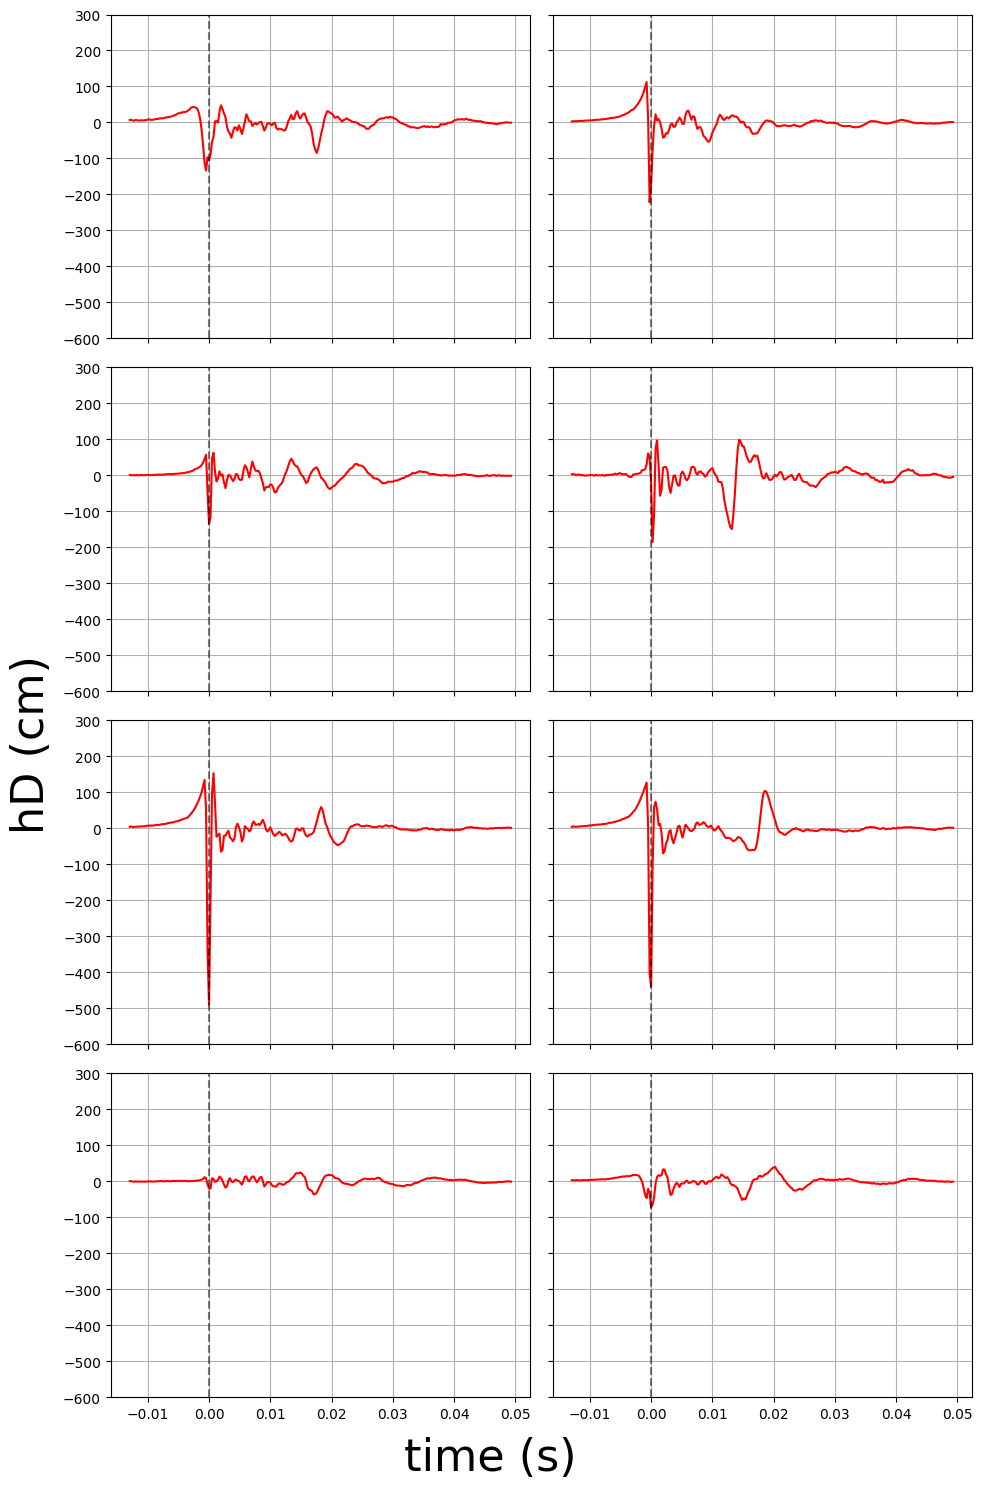

Epoch 131 complete! 	Average Loss: 30.7070
Epoch 132 complete! 	Average Loss: 30.5522
Epoch 133 complete! 	Average Loss: 30.7315
Epoch 134 complete! 	Average Loss: 31.1022
Epoch 135 complete! 	Average Loss: 30.7314
Epoch 136 complete! 	Average Loss: 30.7560
Epoch 137 complete! 	Average Loss: 31.3123
Epoch 138 complete! 	Average Loss: 30.9279
Epoch 139 complete! 	Average Loss: 30.4745
Epoch 140 complete! 	Average Loss: 29.9642


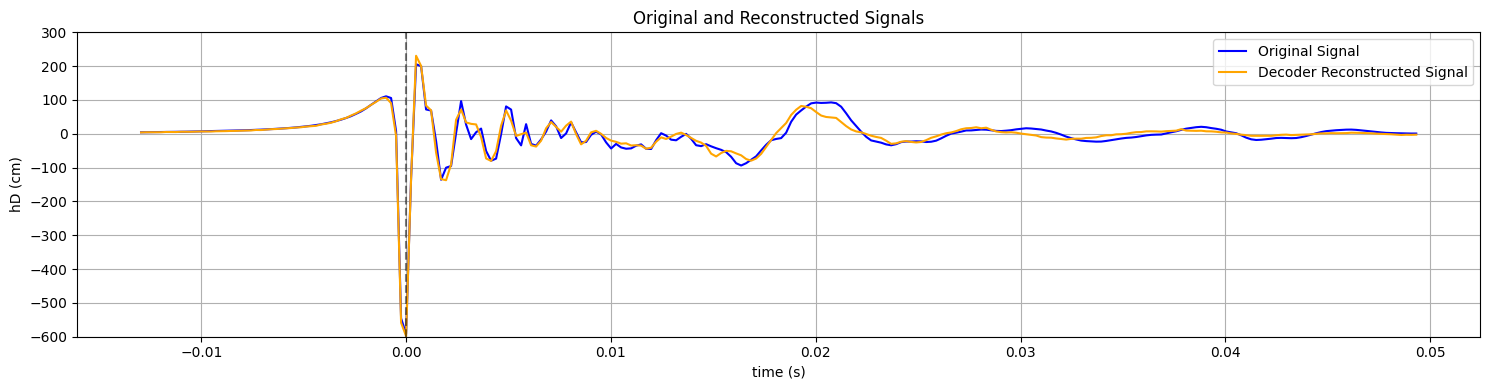

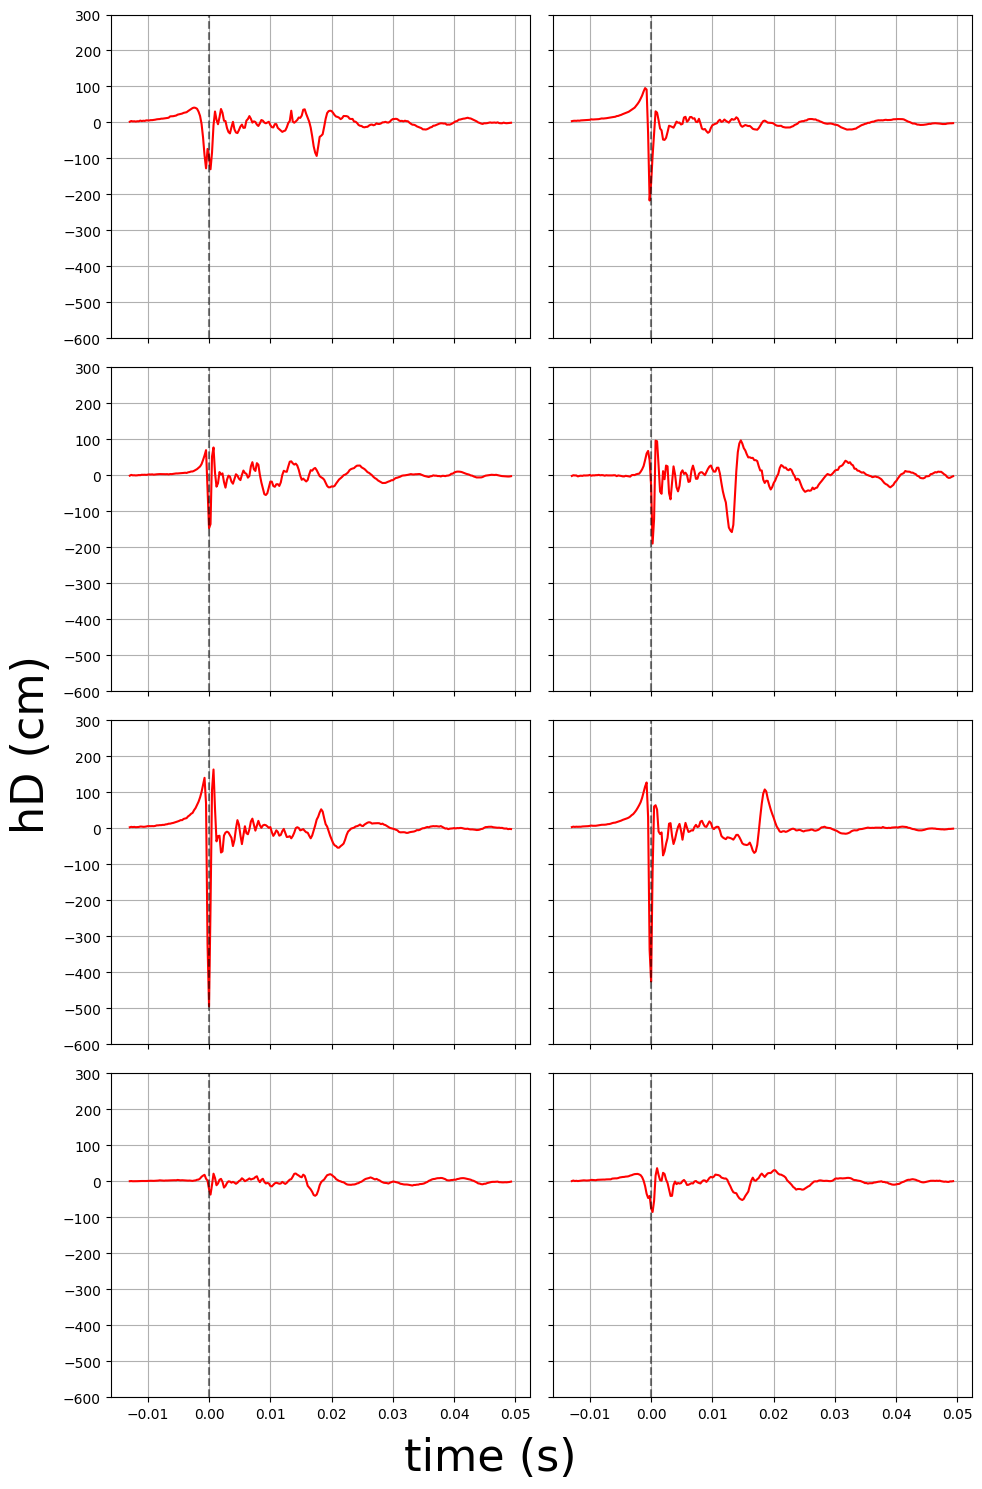

Epoch 141 complete! 	Average Loss: 30.5540
Epoch 142 complete! 	Average Loss: 30.4660
Epoch 143 complete! 	Average Loss: 30.3026
Epoch 144 complete! 	Average Loss: 30.4748
Epoch 145 complete! 	Average Loss: 30.3582
Epoch 146 complete! 	Average Loss: 30.5687
Epoch 147 complete! 	Average Loss: 30.6413
Epoch 148 complete! 	Average Loss: 30.5449
Epoch 149 complete! 	Average Loss: 30.4972
Epoch 150 complete! 	Average Loss: 30.3576


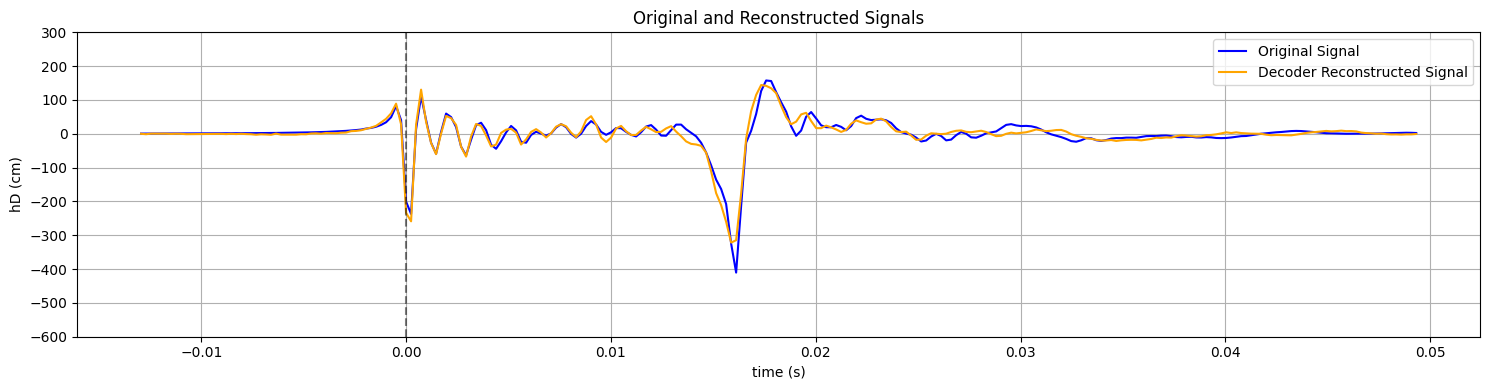

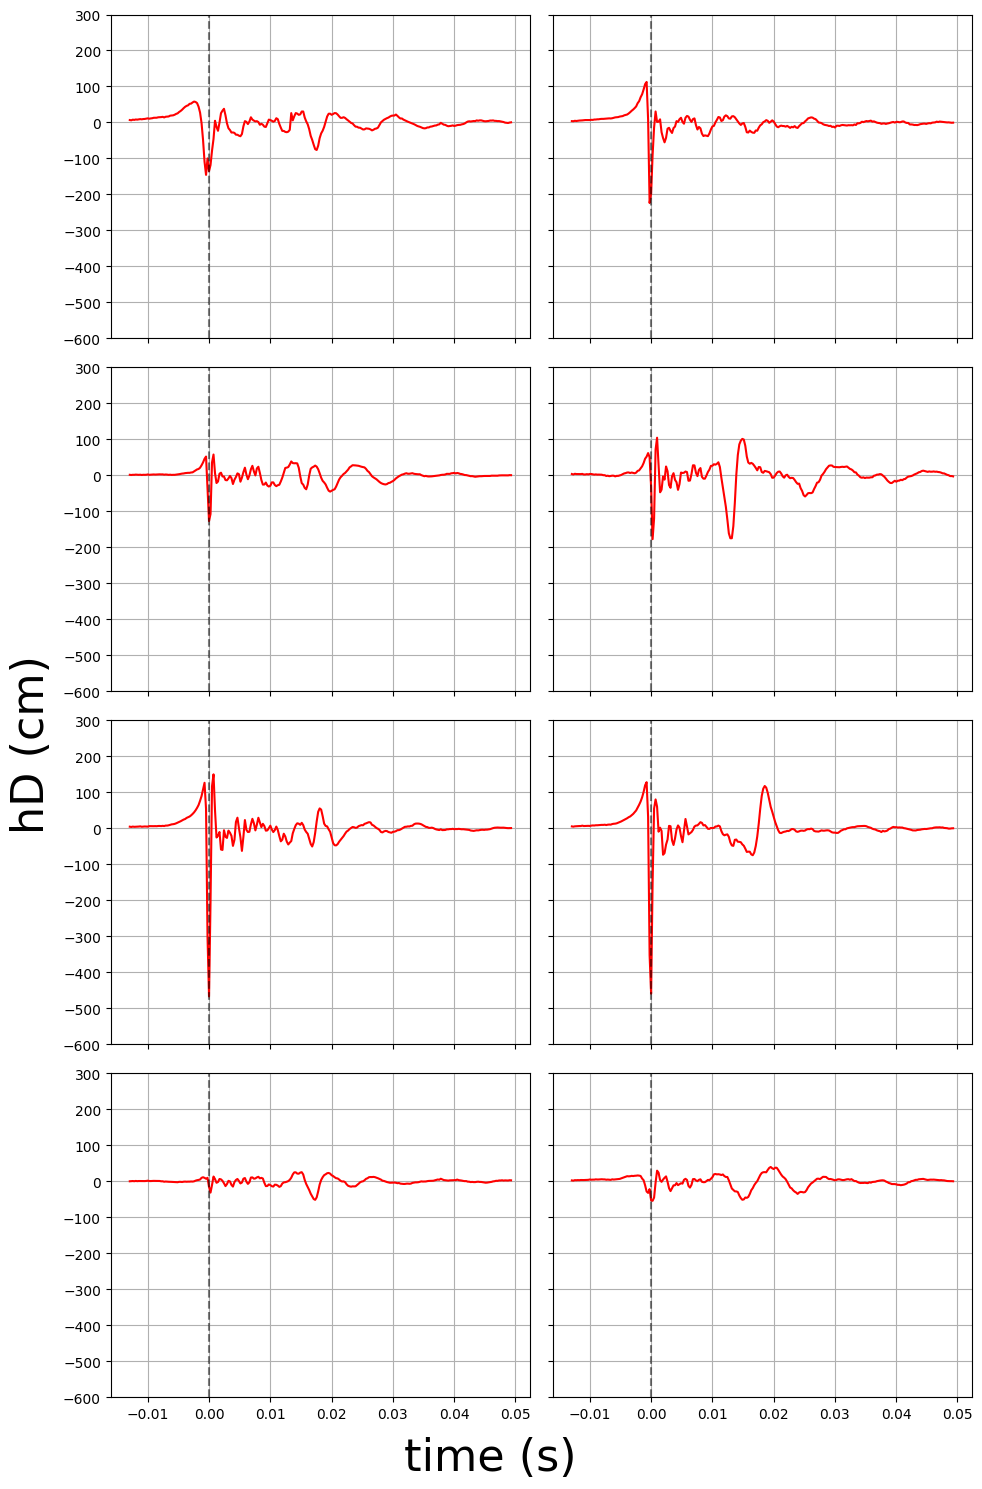

Epoch 151 complete! 	Average Loss: 30.2978
Epoch 152 complete! 	Average Loss: 29.8779
Epoch 153 complete! 	Average Loss: 30.1304
Epoch 154 complete! 	Average Loss: 30.1807
Epoch 155 complete! 	Average Loss: 30.2108
Epoch 156 complete! 	Average Loss: 30.4129
Epoch 157 complete! 	Average Loss: 30.4331
Epoch 158 complete! 	Average Loss: 30.2333
Epoch 159 complete! 	Average Loss: 30.2619
Epoch 160 complete! 	Average Loss: 30.0487


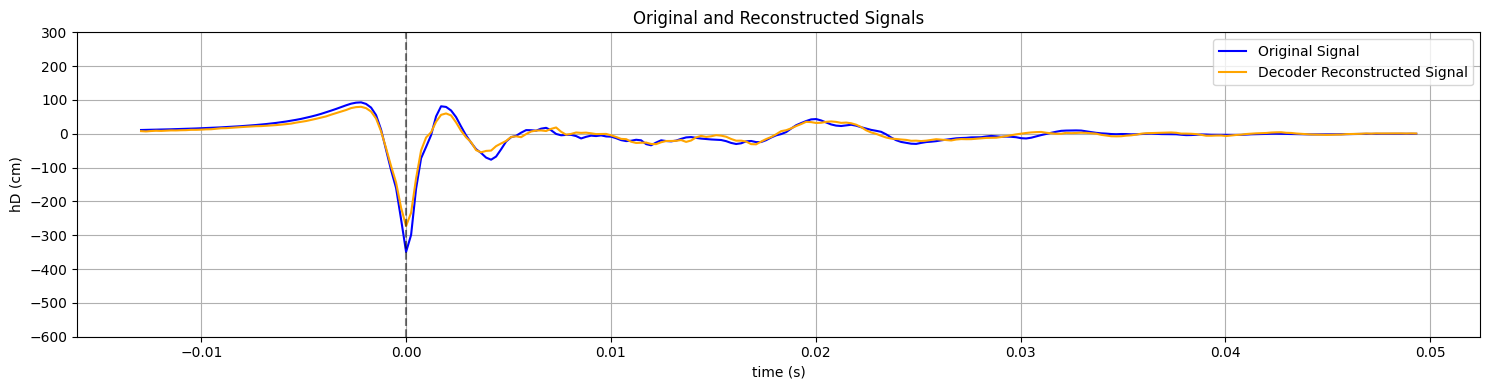

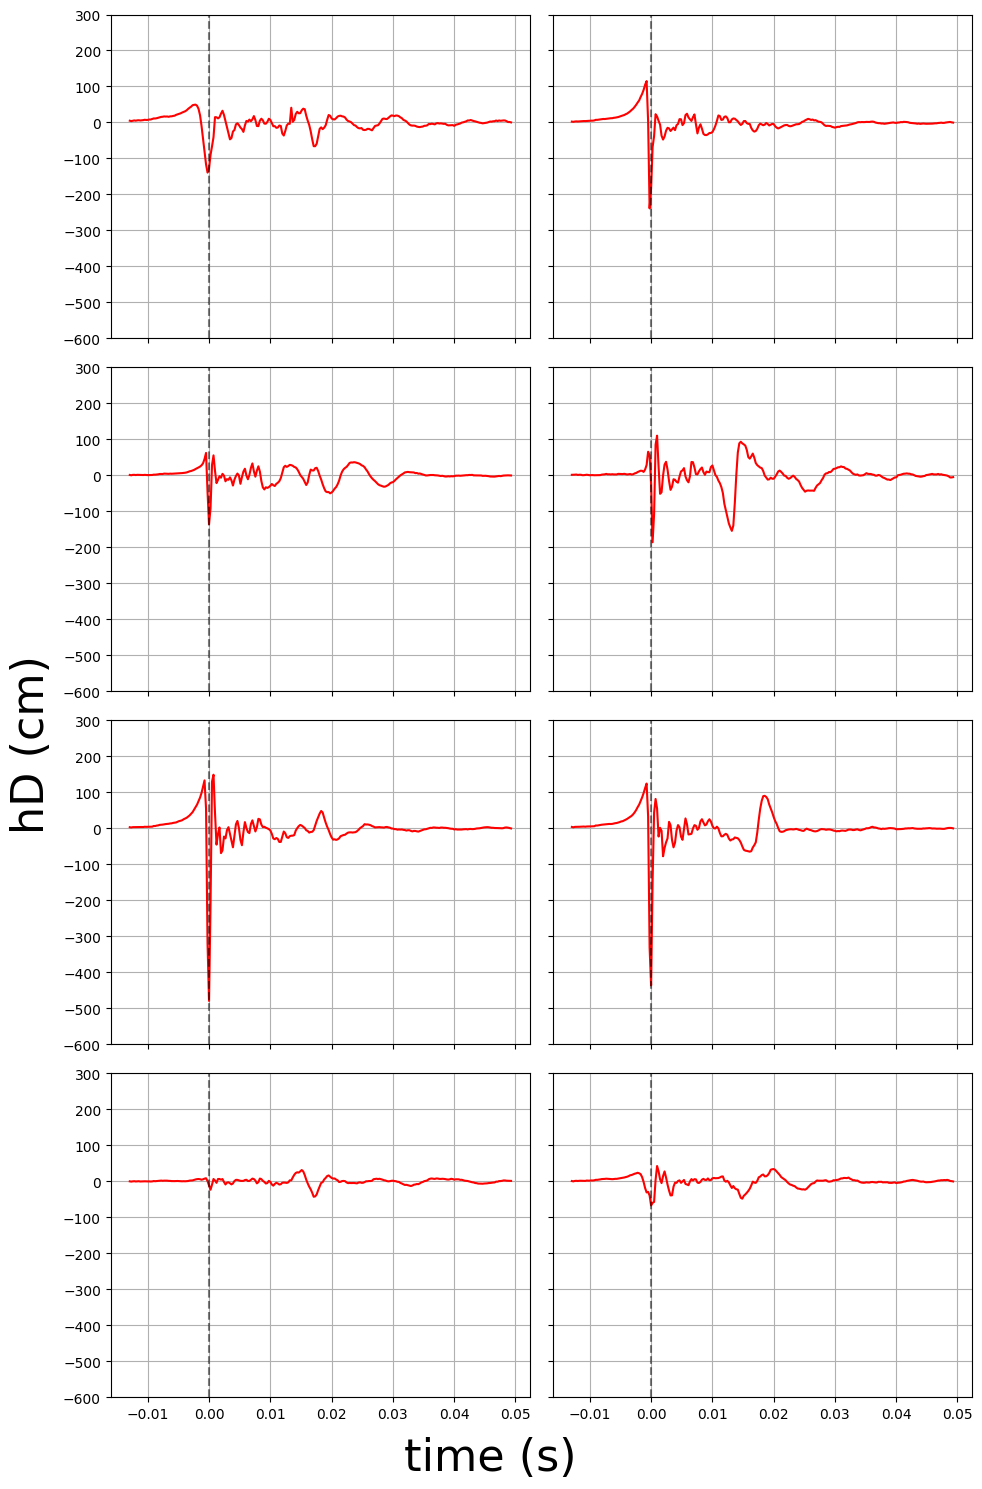

Epoch 161 complete! 	Average Loss: 29.9173
Epoch 162 complete! 	Average Loss: 30.1519
Epoch 163 complete! 	Average Loss: 30.1766
Epoch 164 complete! 	Average Loss: 30.0412
Epoch 165 complete! 	Average Loss: 29.9017
Epoch 166 complete! 	Average Loss: 30.1976
Epoch 167 complete! 	Average Loss: 30.1964
Epoch 168 complete! 	Average Loss: 29.6888
Epoch 169 complete! 	Average Loss: 29.8366
Epoch 170 complete! 	Average Loss: 30.0922


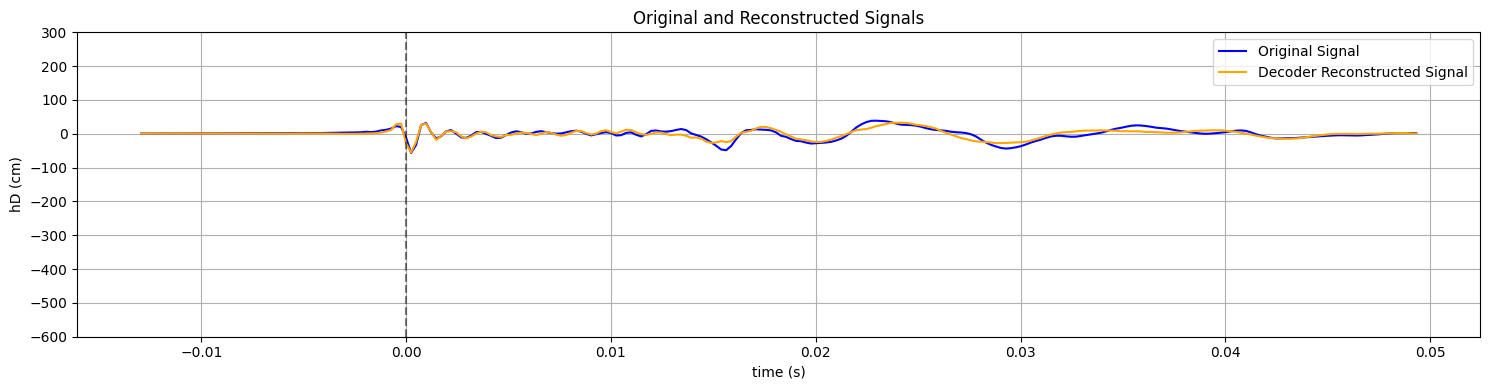

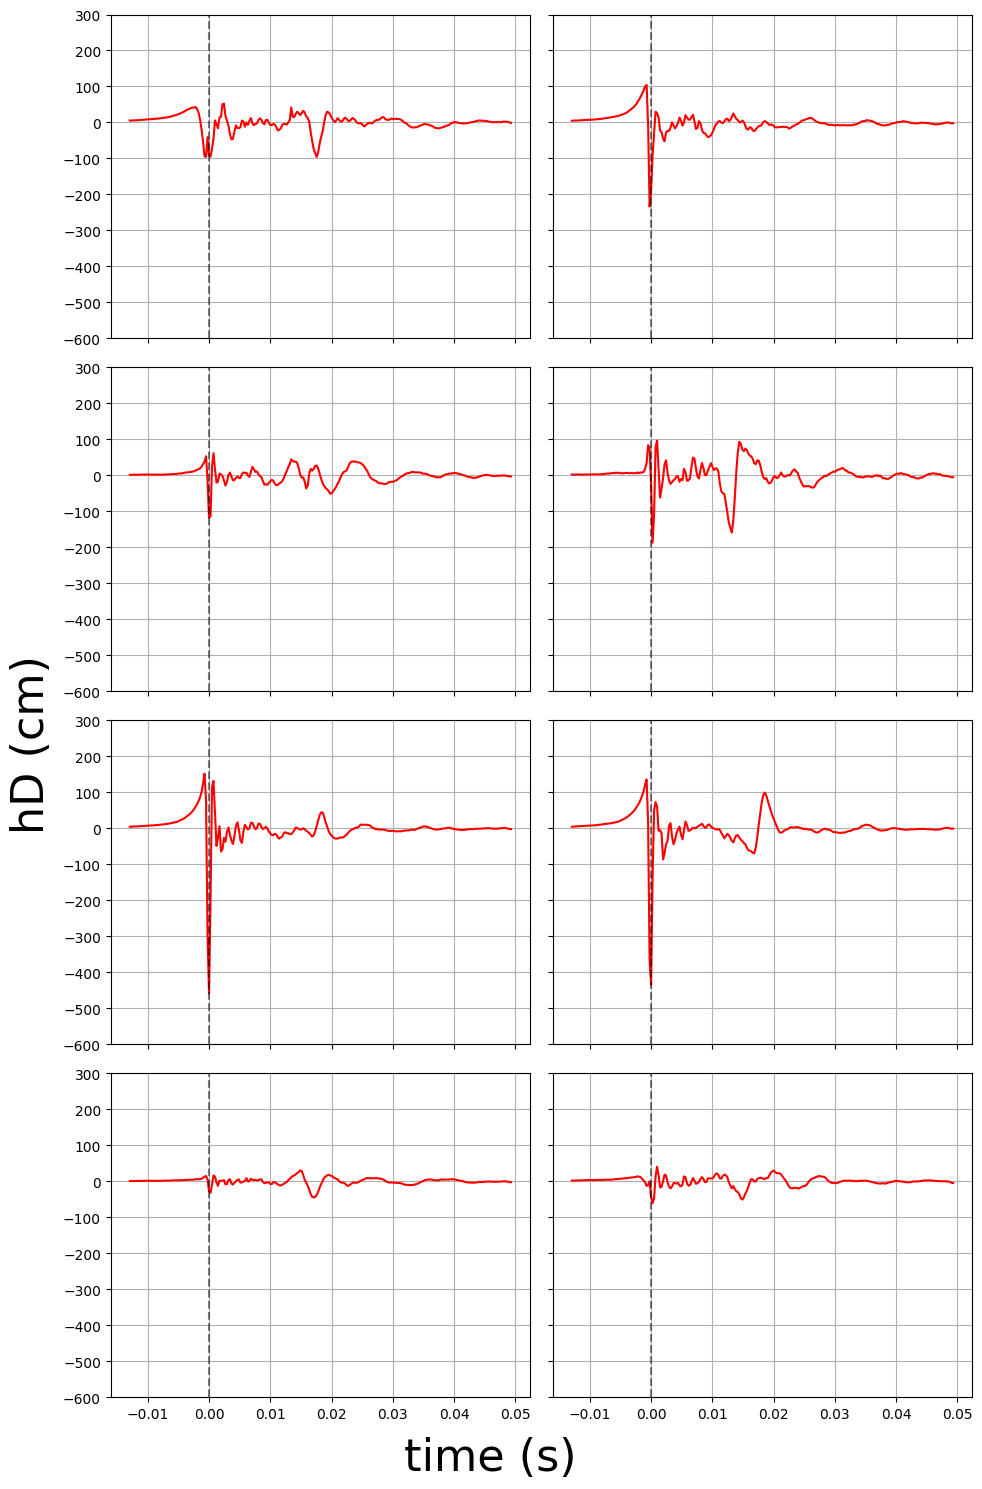

Epoch 171 complete! 	Average Loss: 30.0284
Epoch 172 complete! 	Average Loss: 29.6043
Epoch 173 complete! 	Average Loss: 29.9579
Epoch 174 complete! 	Average Loss: 29.6862
Epoch 175 complete! 	Average Loss: 29.4045
Epoch 176 complete! 	Average Loss: 29.7260
Epoch 177 complete! 	Average Loss: 29.5417
Epoch 178 complete! 	Average Loss: 29.6487
Epoch 179 complete! 	Average Loss: 29.9405
Epoch 180 complete! 	Average Loss: 29.6322


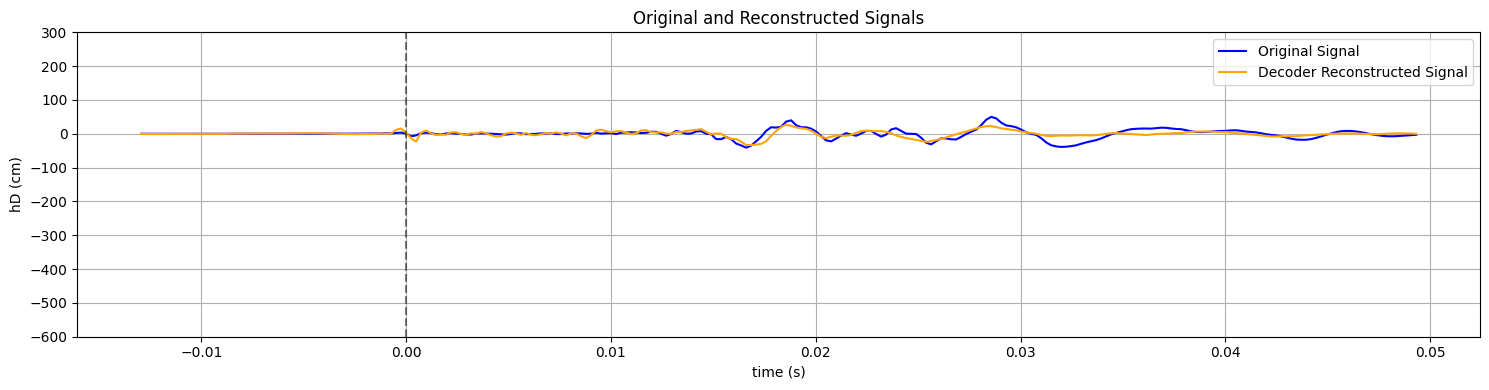

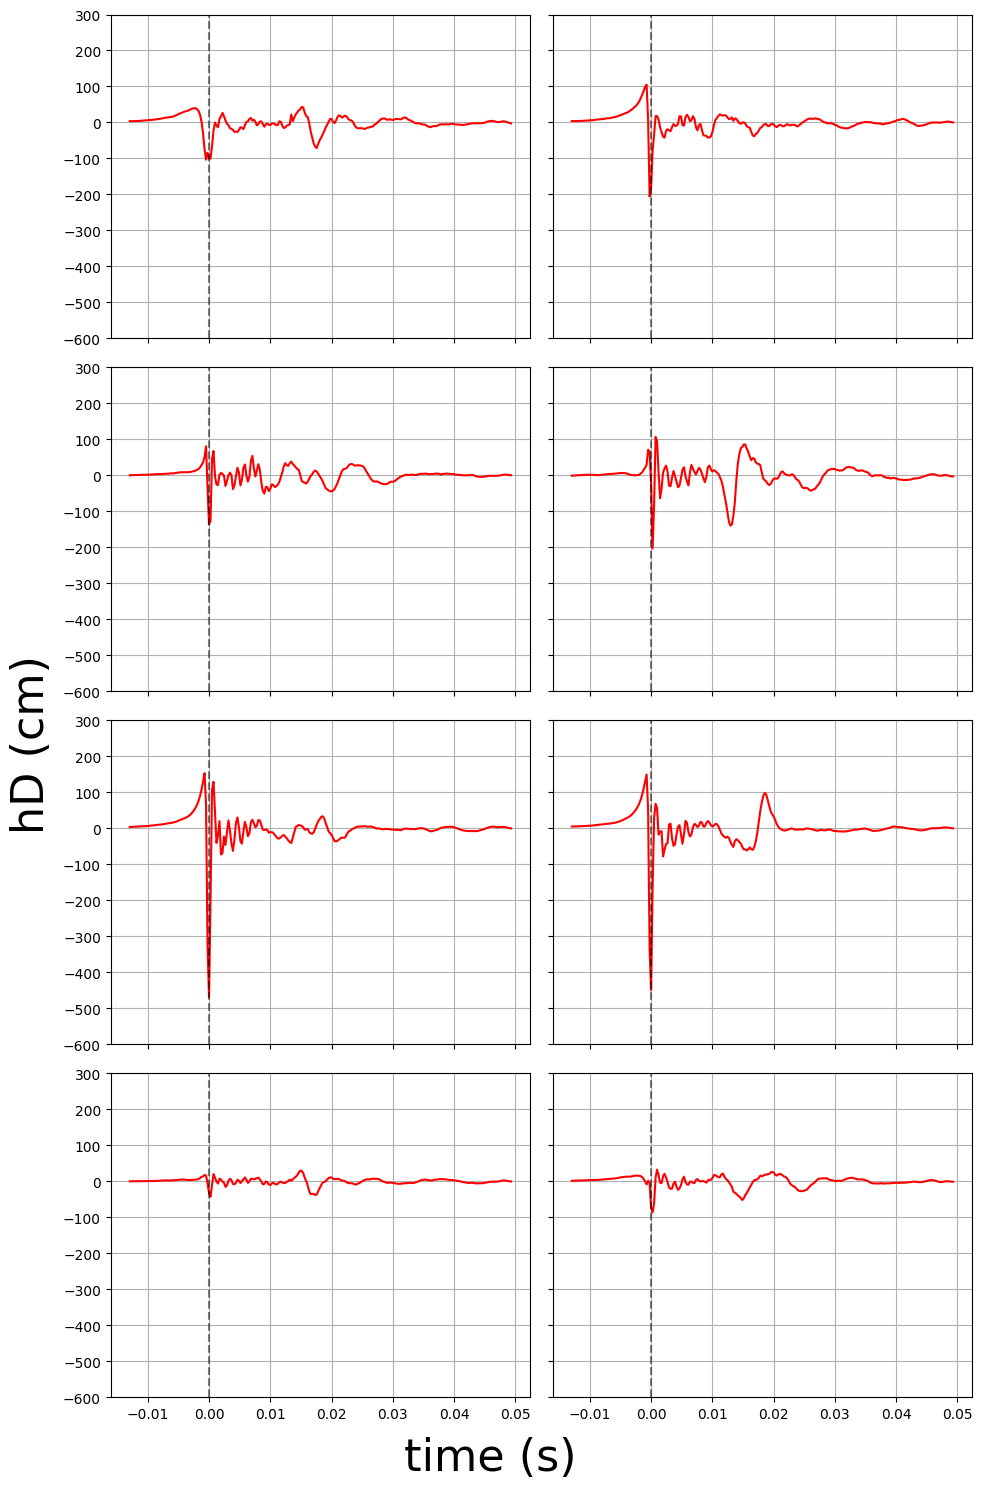

Epoch 181 complete! 	Average Loss: 29.6409
Epoch 182 complete! 	Average Loss: 29.6386
Epoch 183 complete! 	Average Loss: 29.3504
Epoch 184 complete! 	Average Loss: 29.5740
Epoch 185 complete! 	Average Loss: 29.5227
Epoch 186 complete! 	Average Loss: 29.6988
Epoch 187 complete! 	Average Loss: 29.6914
Epoch 188 complete! 	Average Loss: 29.4871
Epoch 189 complete! 	Average Loss: 29.3265
Epoch 190 complete! 	Average Loss: 29.3603


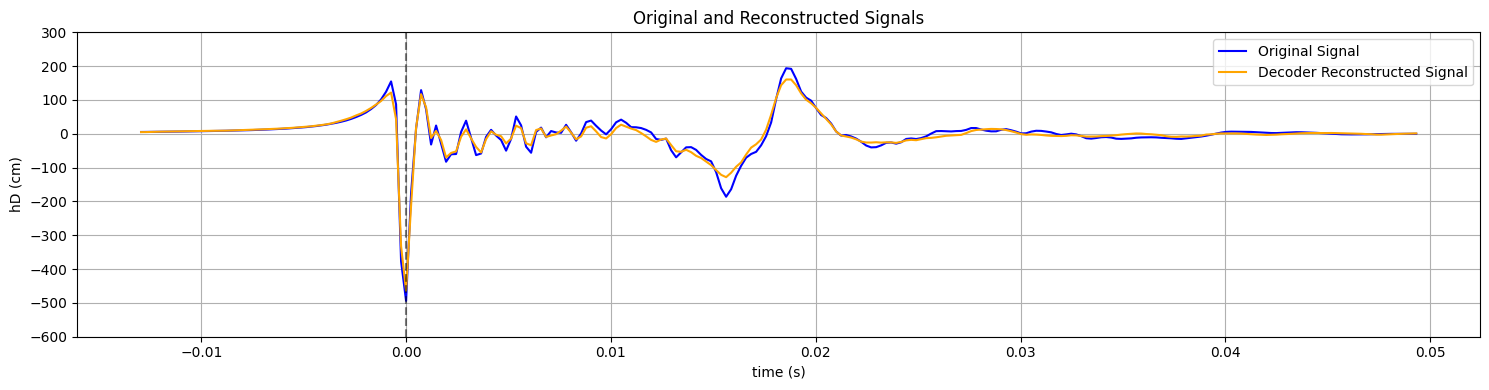

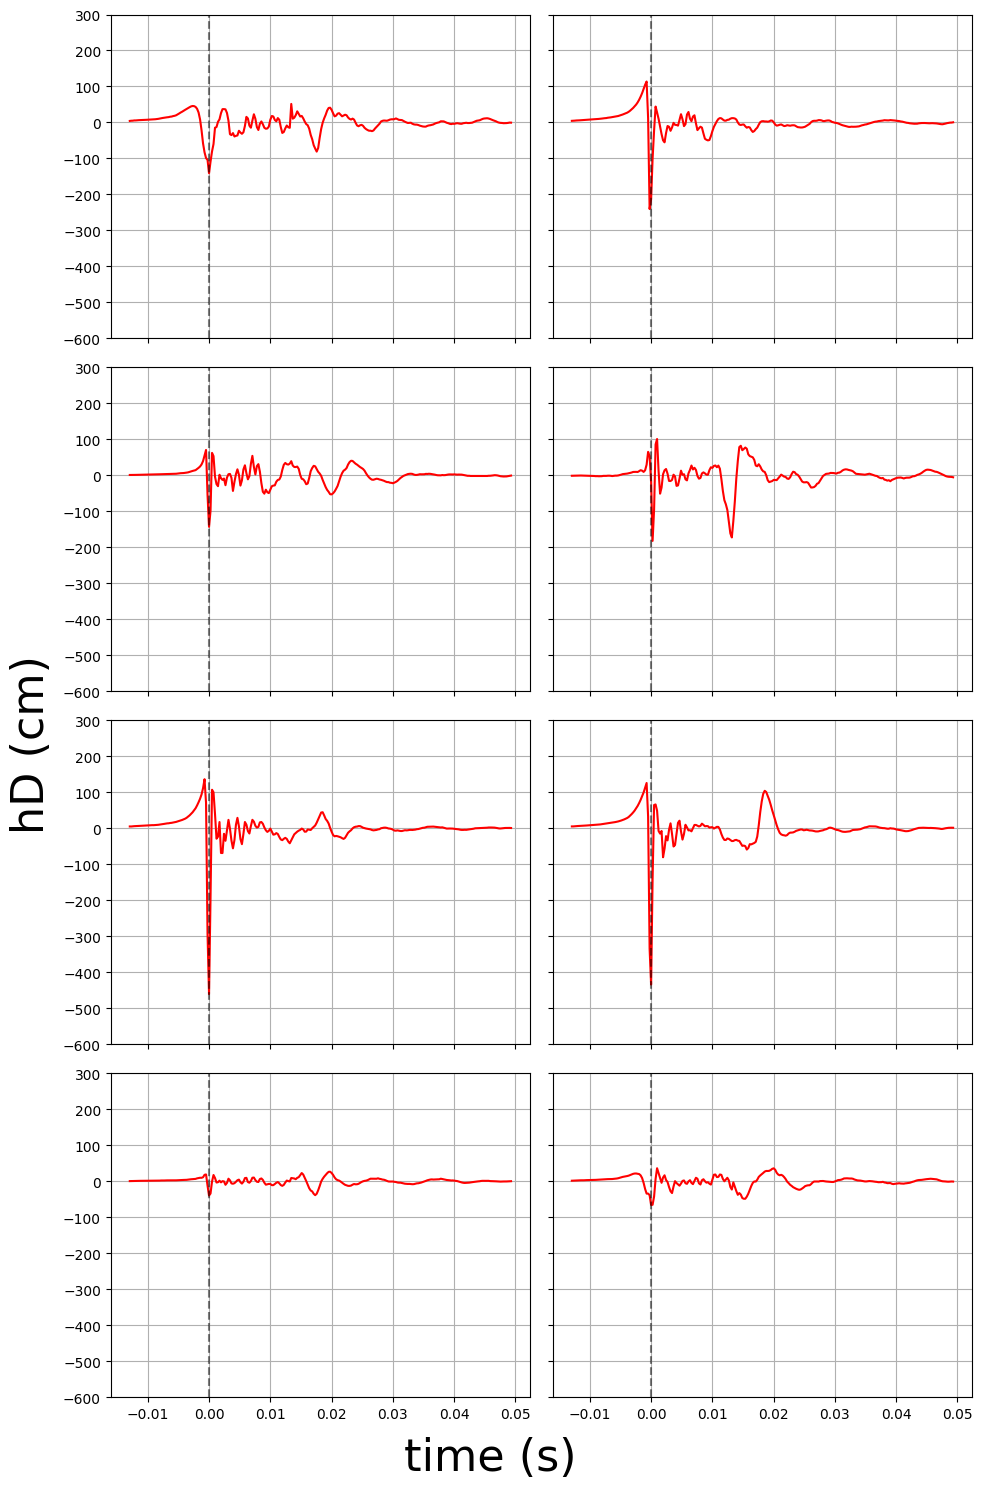

Epoch 191 complete! 	Average Loss: 29.7535
Epoch 192 complete! 	Average Loss: 29.5639
Epoch 193 complete! 	Average Loss: 29.2325
Epoch 194 complete! 	Average Loss: 29.5383
Epoch 195 complete! 	Average Loss: 29.4764
Epoch 196 complete! 	Average Loss: 29.5293
Epoch 197 complete! 	Average Loss: 29.5340
Epoch 198 complete! 	Average Loss: 29.2145
Epoch 199 complete! 	Average Loss: 29.1507
Epoch 200 complete! 	Average Loss: 29.0772


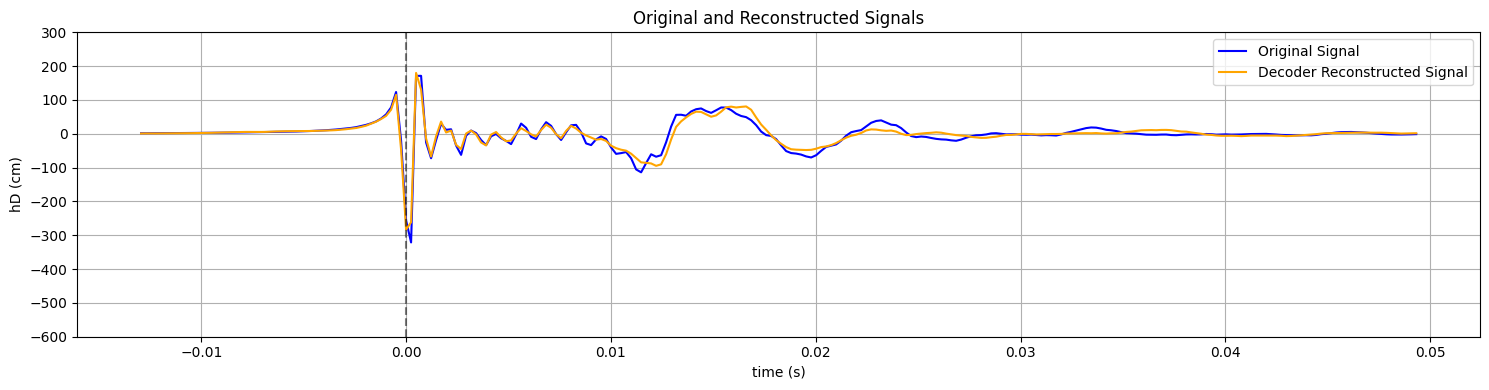

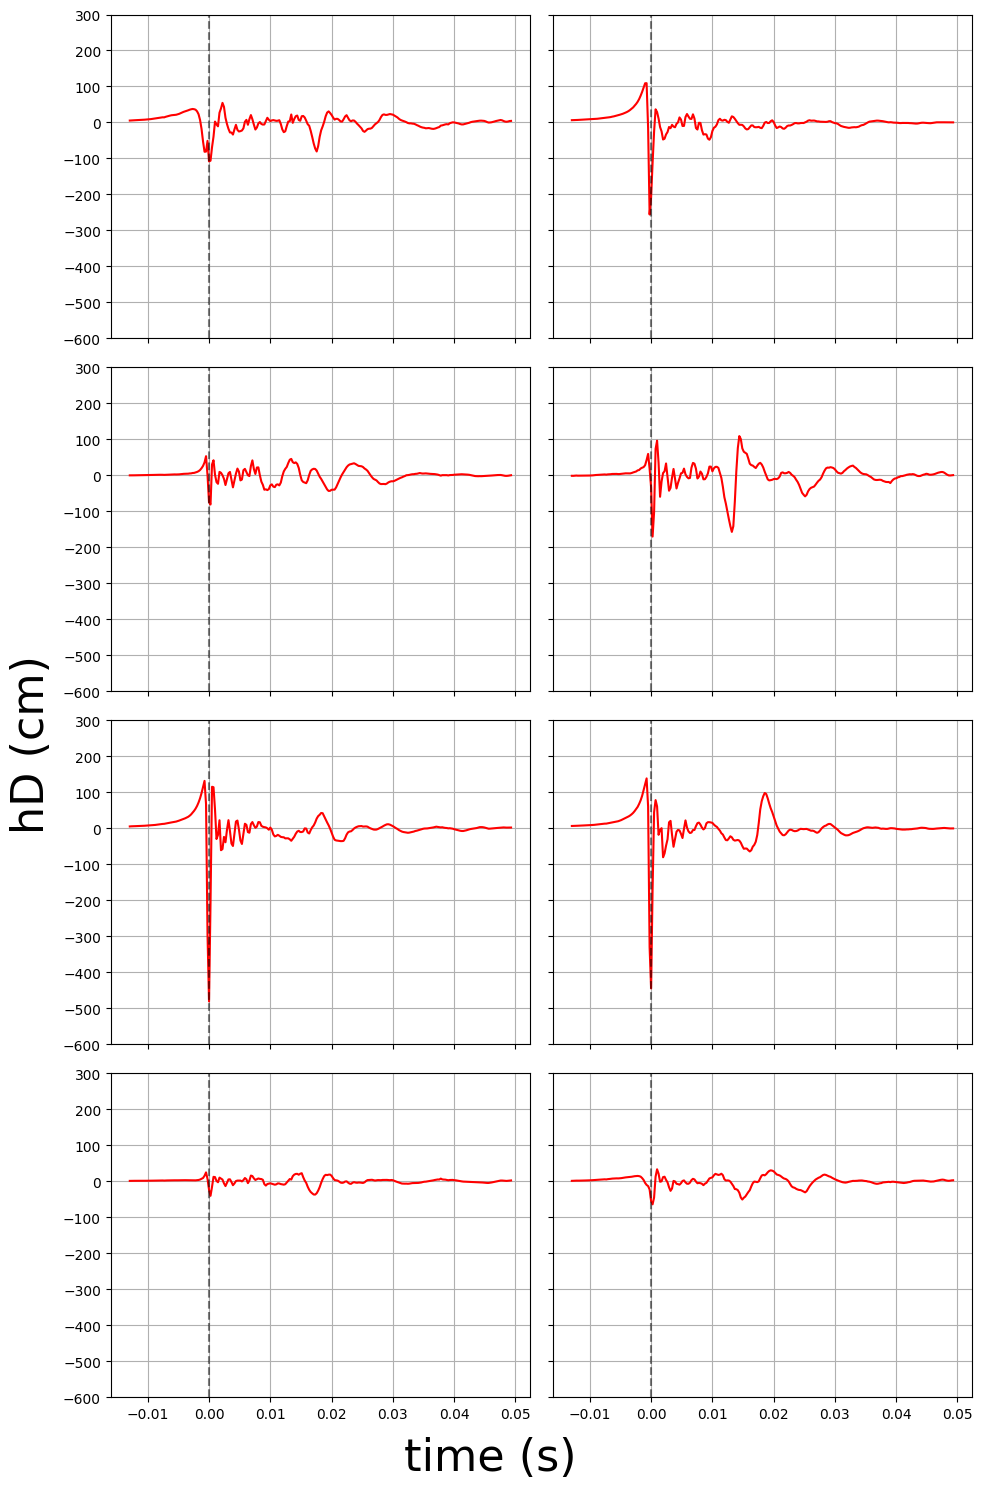

Epoch 201 complete! 	Average Loss: 29.2806
Epoch 202 complete! 	Average Loss: 29.3028
Epoch 203 complete! 	Average Loss: 29.3528
Epoch 204 complete! 	Average Loss: 29.2360
Epoch 205 complete! 	Average Loss: 28.9968
Epoch 206 complete! 	Average Loss: 29.1503
Epoch 207 complete! 	Average Loss: 29.1121
Epoch 208 complete! 	Average Loss: 29.2374
Epoch 209 complete! 	Average Loss: 29.0666
Epoch 210 complete! 	Average Loss: 29.1020


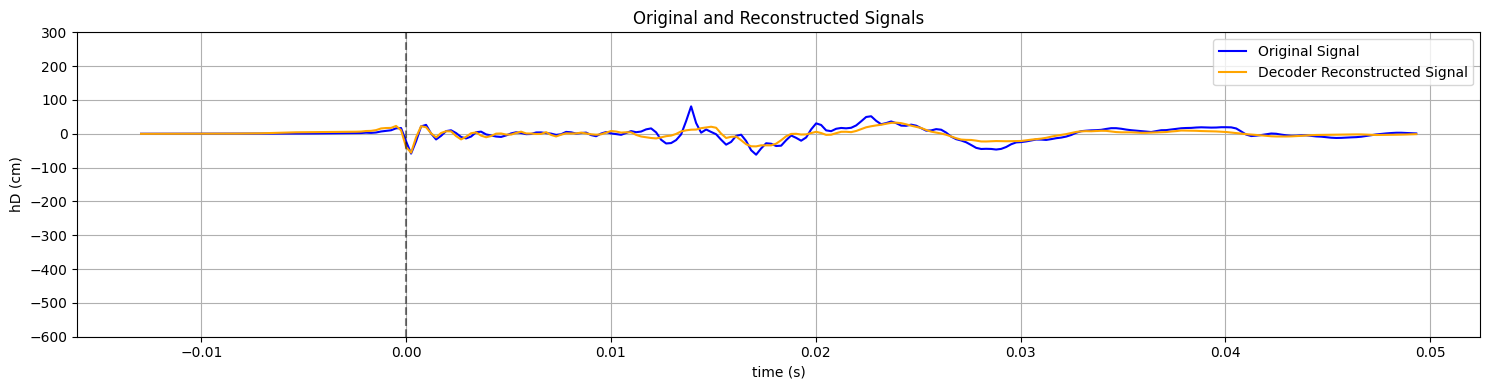

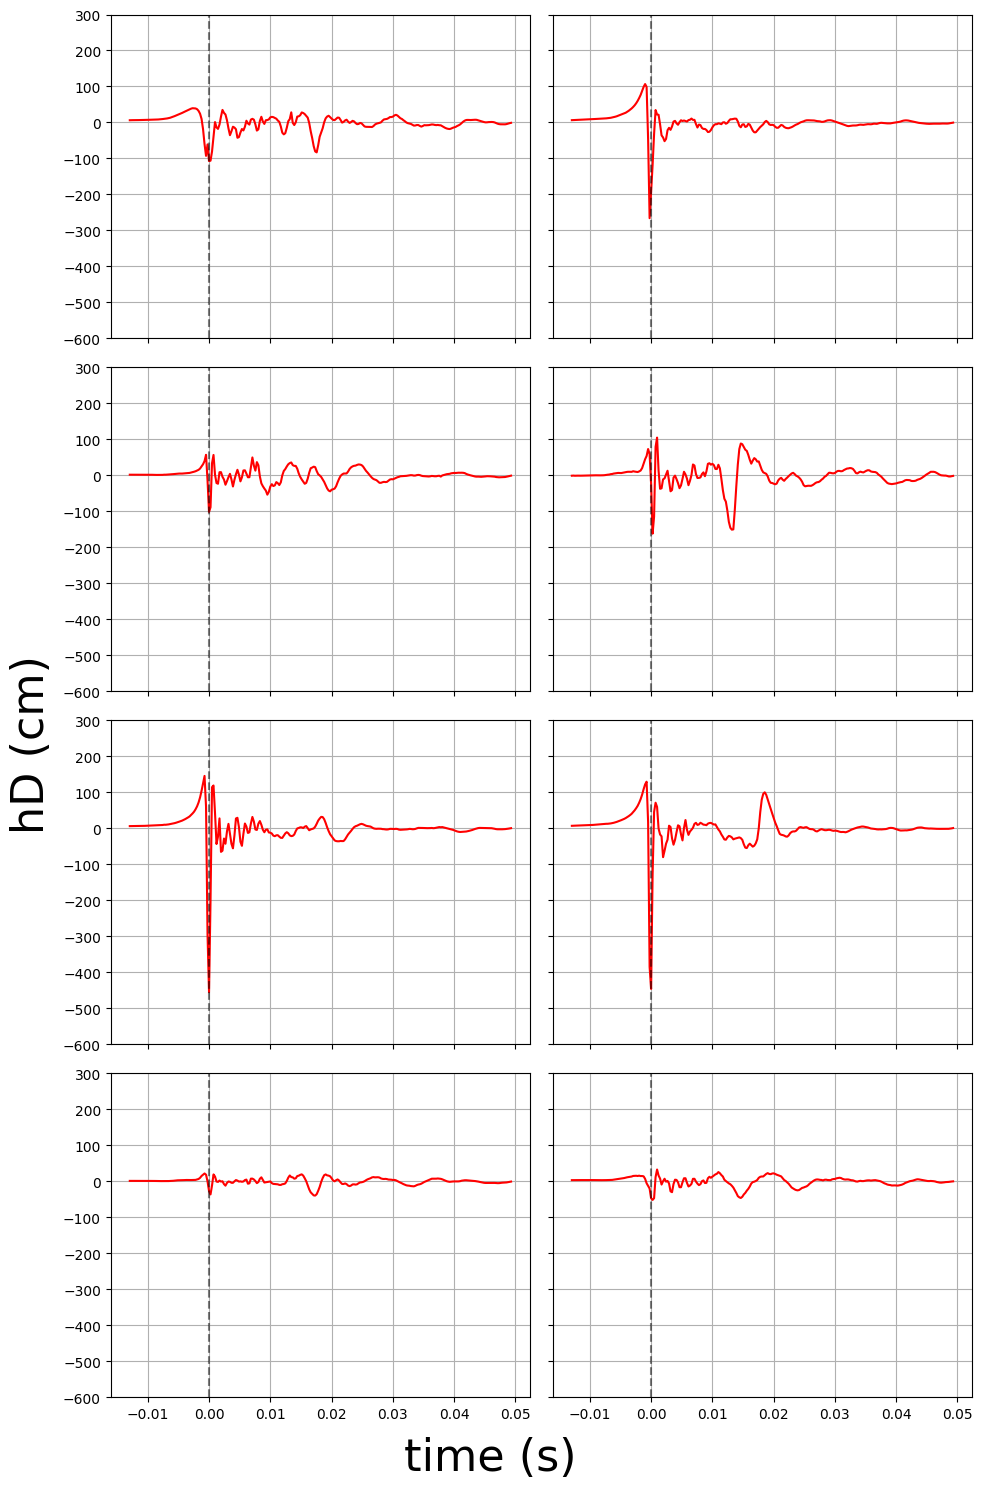

Epoch 211 complete! 	Average Loss: 29.3893
Epoch 212 complete! 	Average Loss: 29.3157
Epoch 213 complete! 	Average Loss: 29.1245
Epoch 214 complete! 	Average Loss: 28.9657
Epoch 215 complete! 	Average Loss: 28.7114
Epoch 216 complete! 	Average Loss: 29.2894
Epoch 217 complete! 	Average Loss: 28.9963
Epoch 218 complete! 	Average Loss: 28.9267
Epoch 219 complete! 	Average Loss: 29.1319
Epoch 220 complete! 	Average Loss: 29.0613


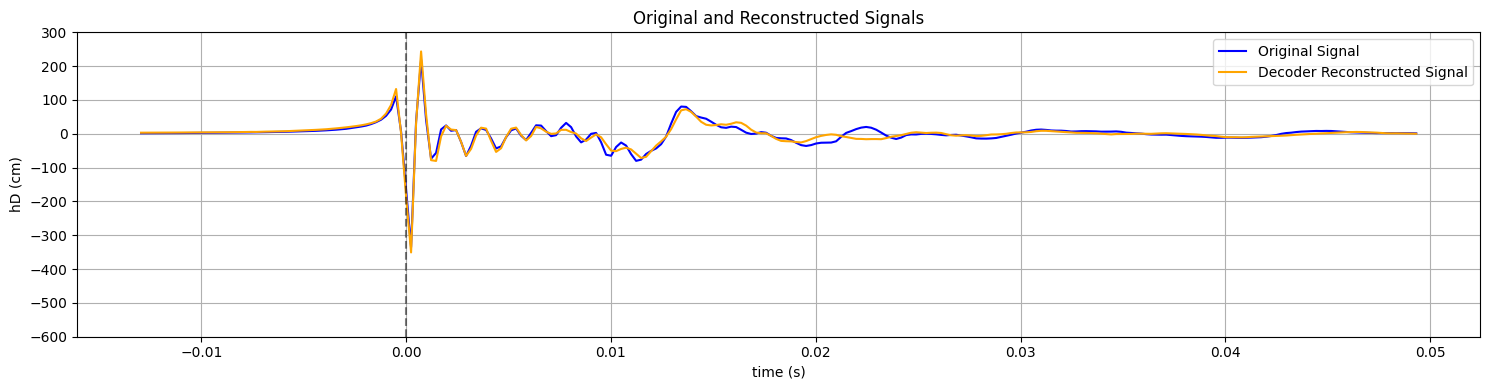

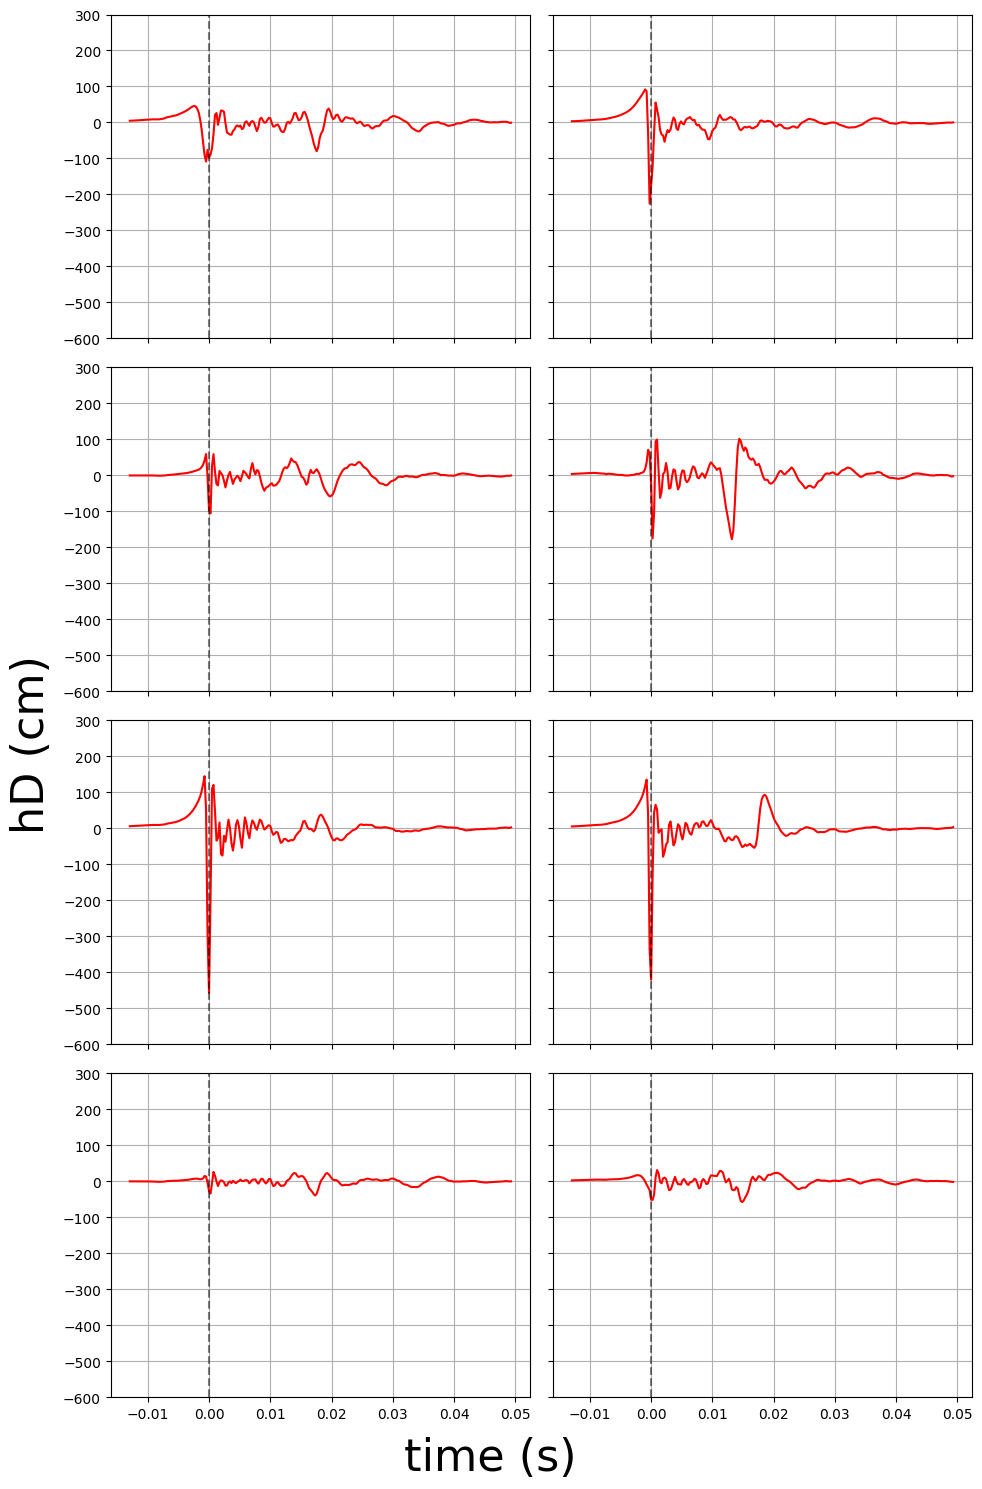

Epoch 221 complete! 	Average Loss: 28.7510
Epoch 222 complete! 	Average Loss: 28.7850
Epoch 223 complete! 	Average Loss: 29.0661
Epoch 224 complete! 	Average Loss: 28.7611
Epoch 225 complete! 	Average Loss: 28.8229
Epoch 226 complete! 	Average Loss: 28.7611
Epoch 227 complete! 	Average Loss: 28.8059
Epoch 228 complete! 	Average Loss: 28.7590
Epoch 229 complete! 	Average Loss: 28.6973
Epoch 230 complete! 	Average Loss: 29.1634


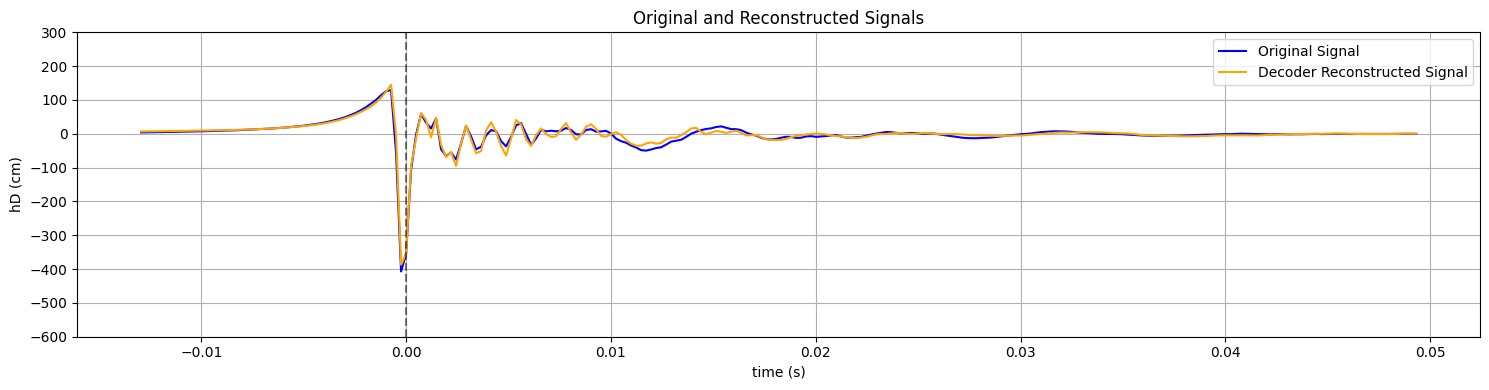

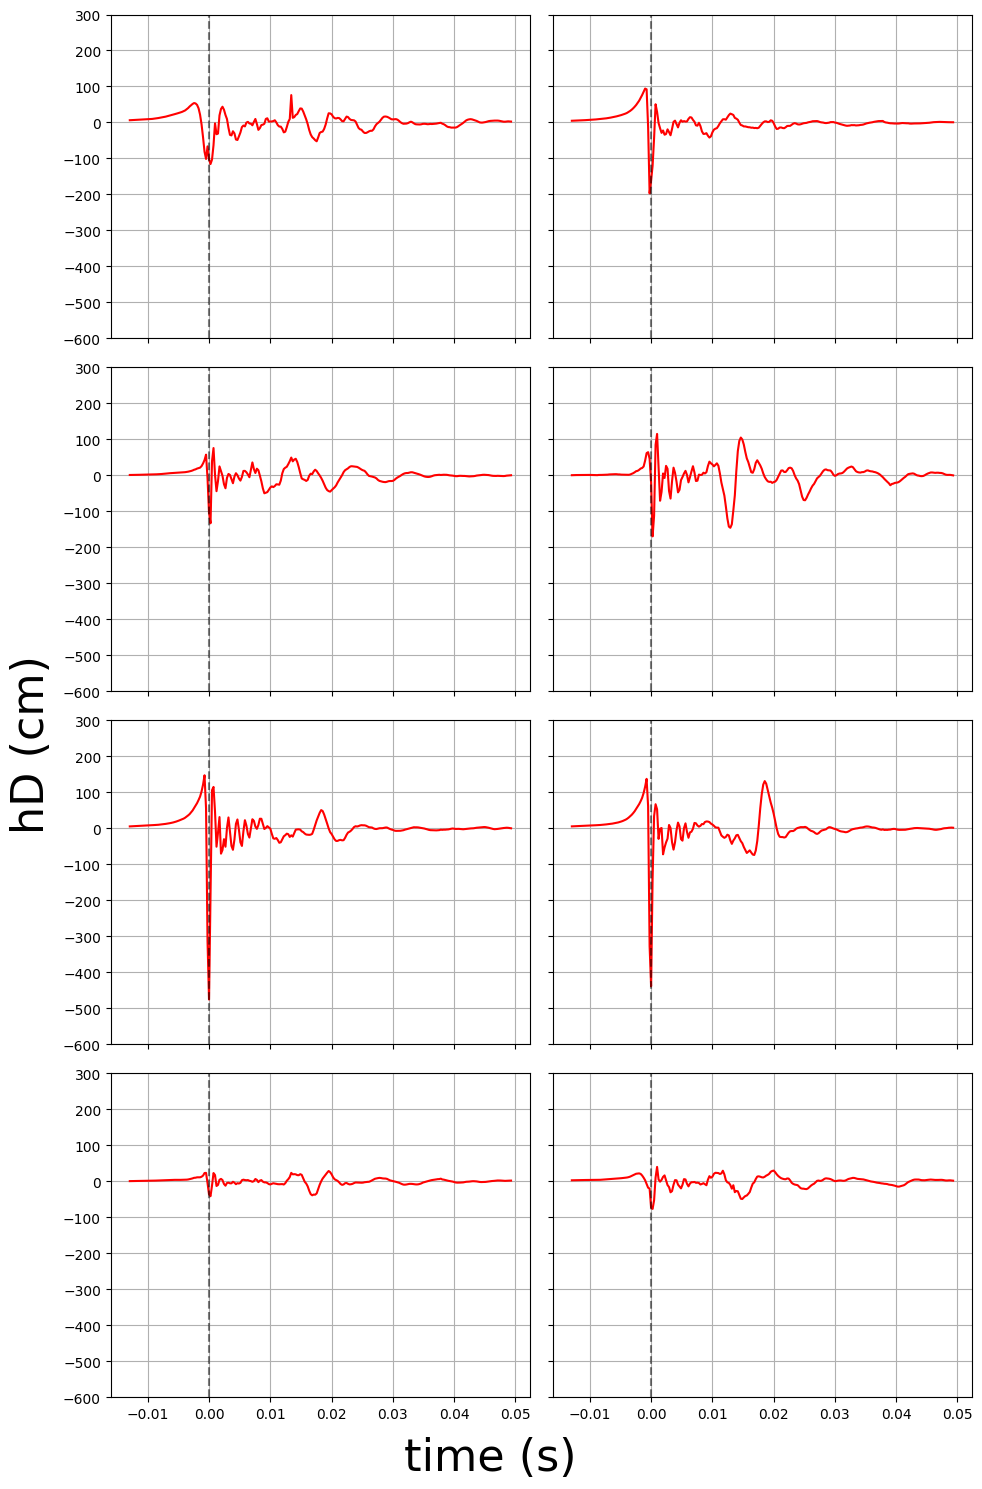

Epoch 231 complete! 	Average Loss: 29.1470
Epoch 232 complete! 	Average Loss: 28.9886
Epoch 233 complete! 	Average Loss: 28.7870
Epoch 234 complete! 	Average Loss: 28.7988
Epoch 235 complete! 	Average Loss: 28.6746
Epoch 236 complete! 	Average Loss: 28.6178
Epoch 237 complete! 	Average Loss: 29.0080
Epoch 238 complete! 	Average Loss: 28.8761
Epoch 239 complete! 	Average Loss: 28.8023
Epoch 240 complete! 	Average Loss: 28.5809


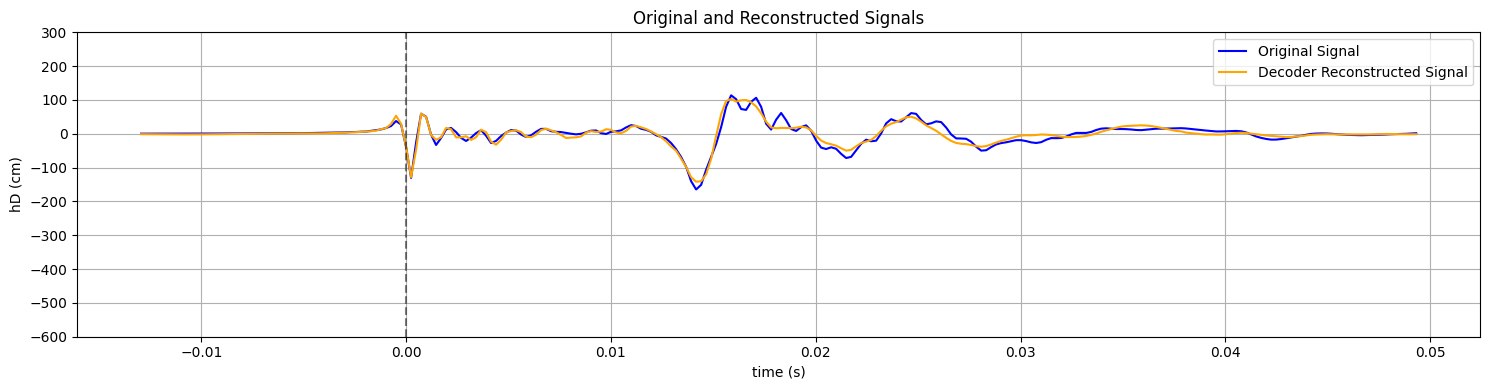

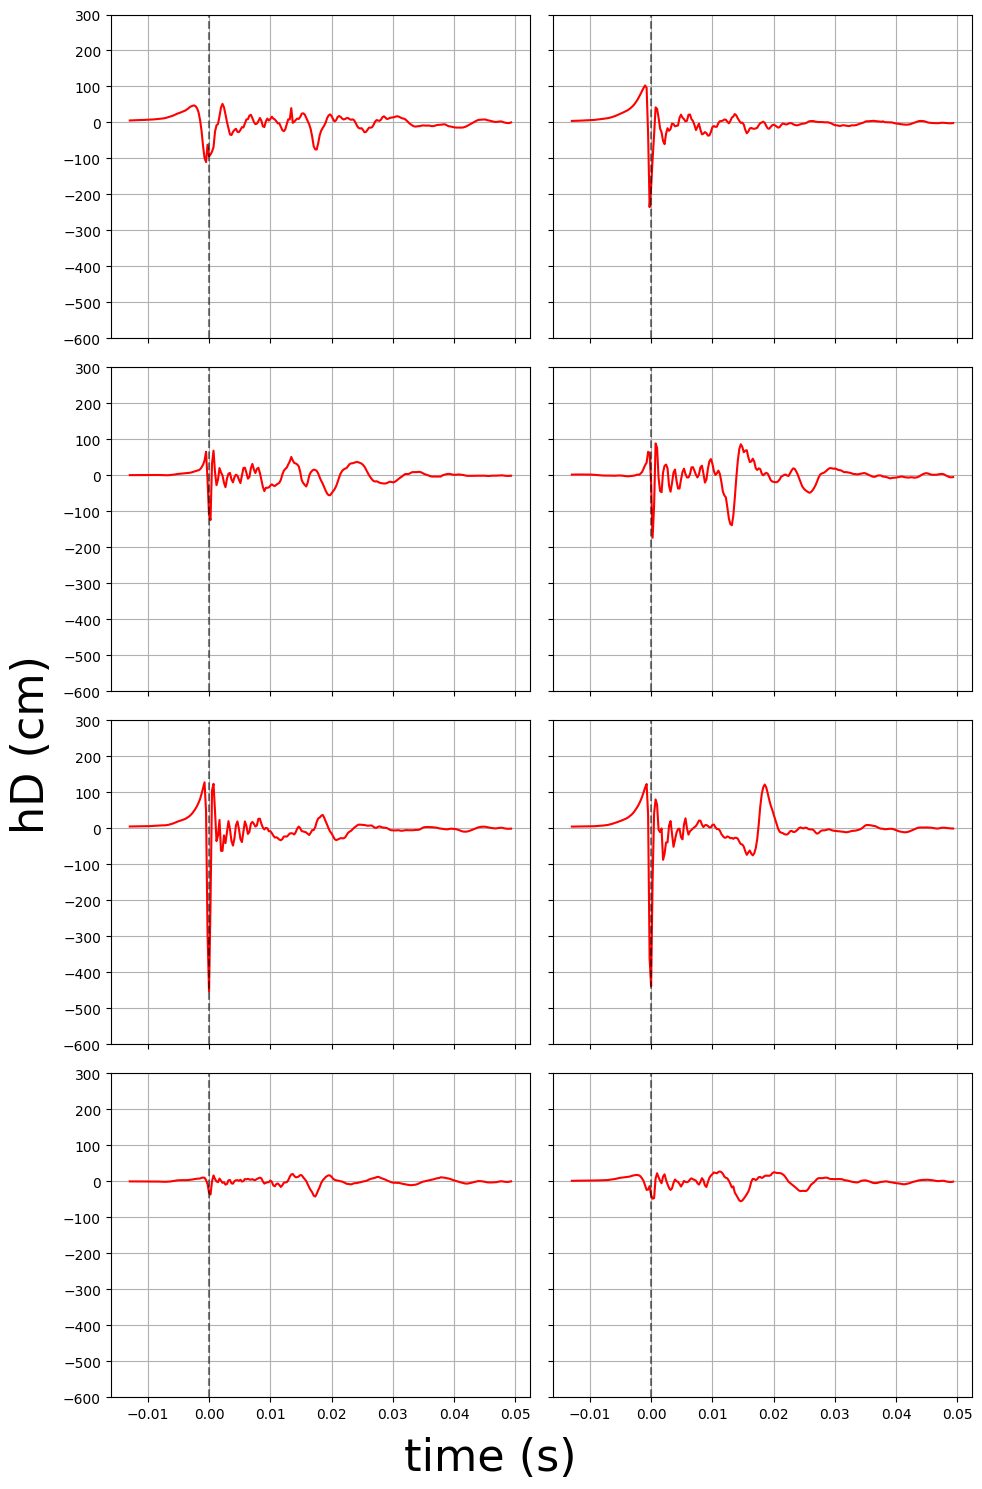

Epoch 241 complete! 	Average Loss: 28.7417
Epoch 242 complete! 	Average Loss: 28.6391
Epoch 243 complete! 	Average Loss: 28.5885
Epoch 244 complete! 	Average Loss: 28.7042
Epoch 245 complete! 	Average Loss: 28.8355
Epoch 246 complete! 	Average Loss: 28.6843
Epoch 247 complete! 	Average Loss: 28.5892
Epoch 248 complete! 	Average Loss: 28.6776
Epoch 249 complete! 	Average Loss: 28.4491
Epoch 250 complete! 	Average Loss: 28.5348


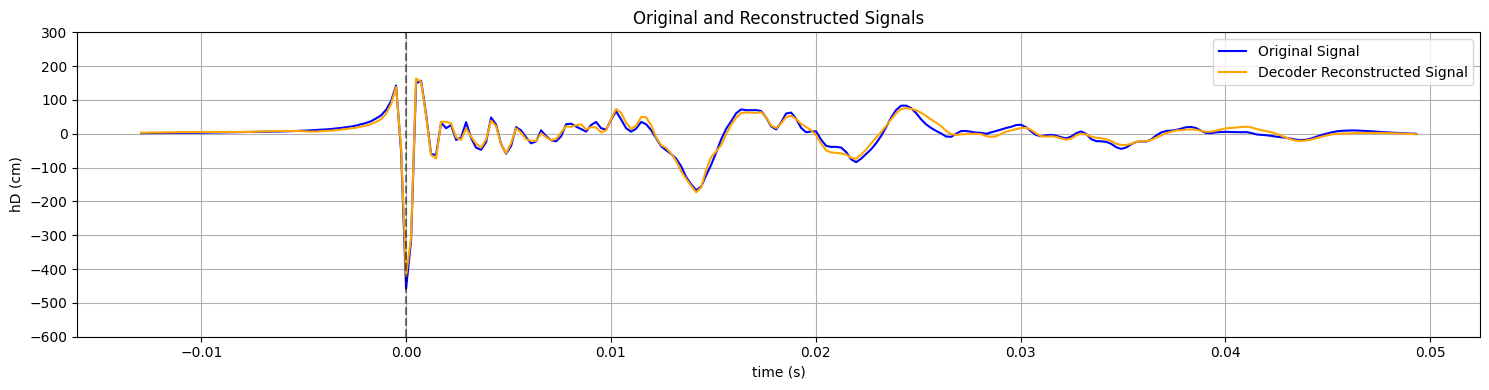

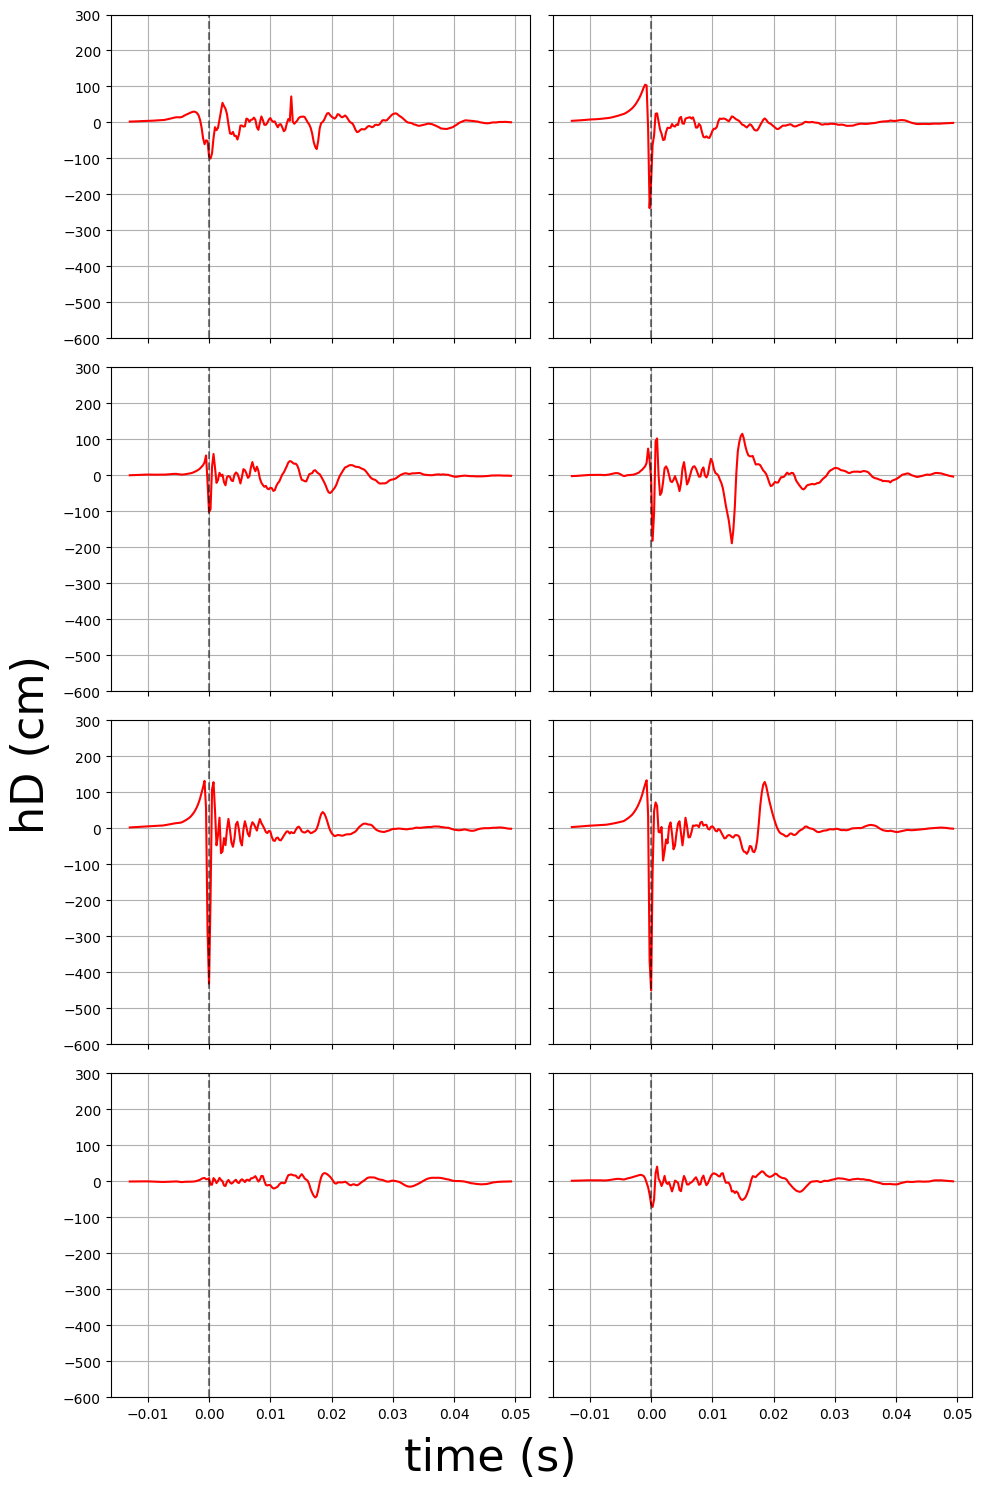

Epoch 251 complete! 	Average Loss: 28.5267
Epoch 252 complete! 	Average Loss: 28.3123
Epoch 253 complete! 	Average Loss: 28.6790
Epoch 254 complete! 	Average Loss: 28.5539
Epoch 255 complete! 	Average Loss: 28.2358
Epoch 256 complete! 	Average Loss: 28.5092
Epoch 257 complete! 	Average Loss: 28.6737
Epoch 258 complete! 	Average Loss: 28.9389
Epoch 259 complete! 	Average Loss: 28.5754
Epoch 260 complete! 	Average Loss: 28.7307


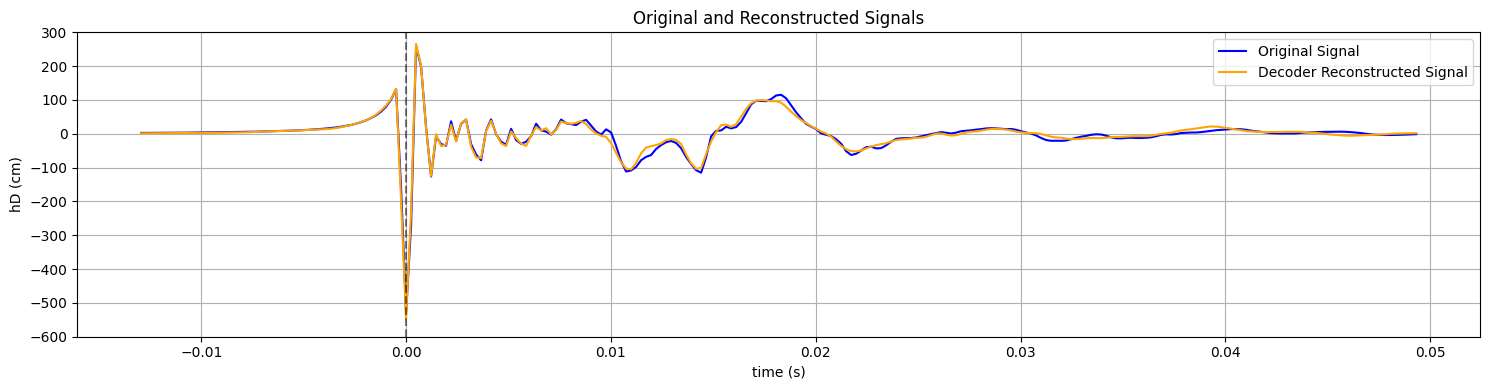

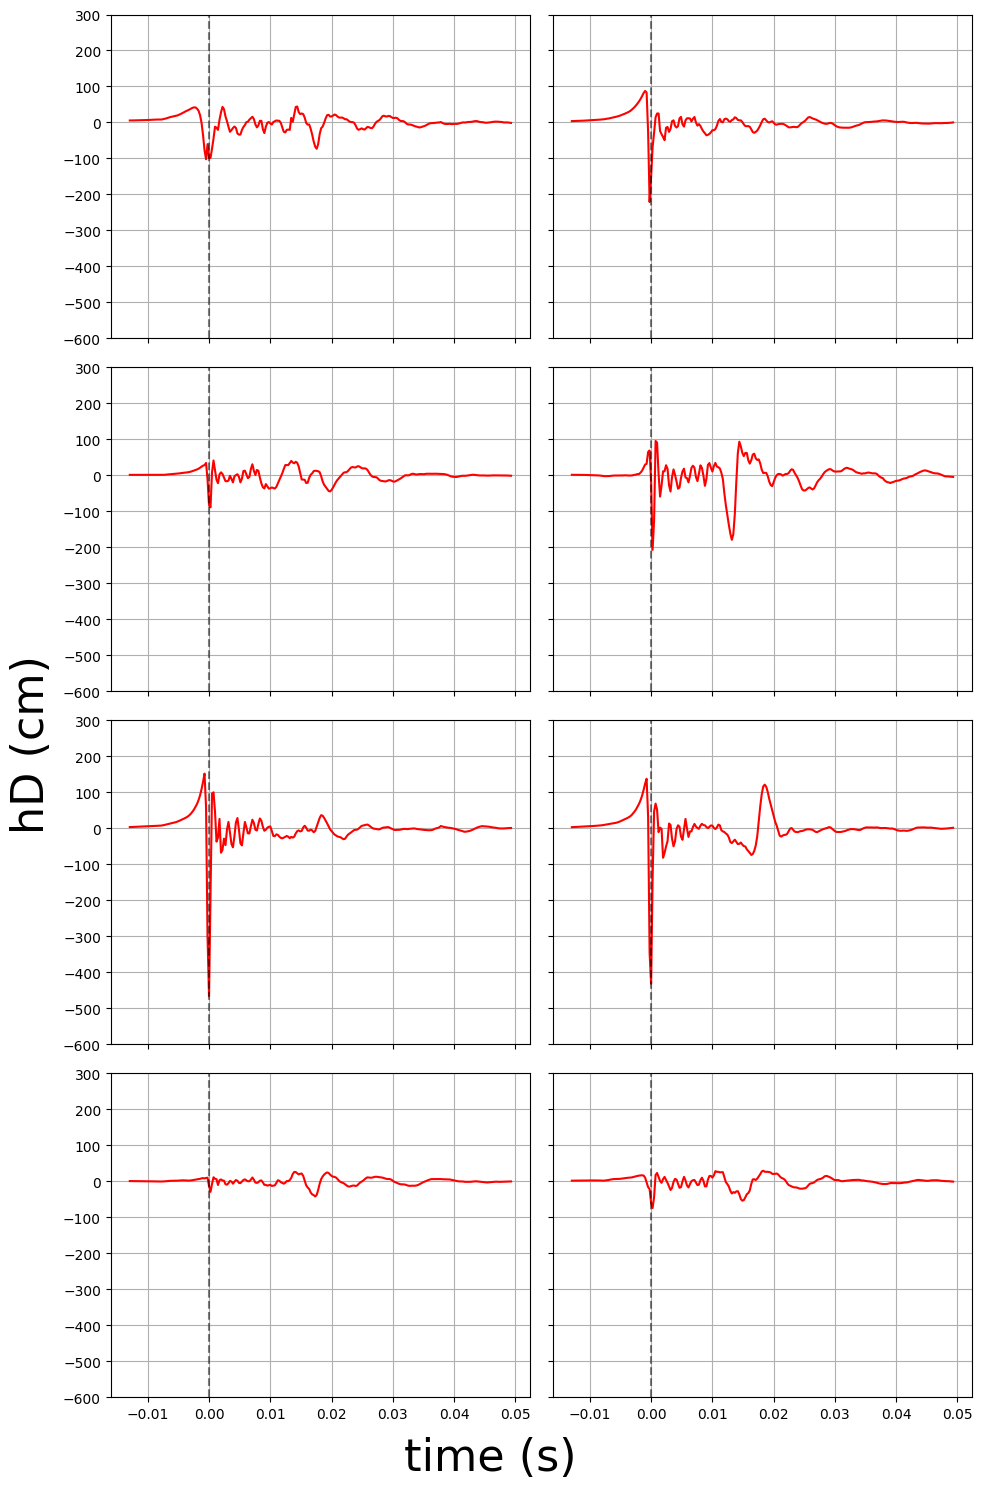

Epoch 261 complete! 	Average Loss: 28.5454
Epoch 262 complete! 	Average Loss: 28.7252
Epoch 263 complete! 	Average Loss: 28.6387
Epoch 264 complete! 	Average Loss: 28.3326
Epoch 265 complete! 	Average Loss: 28.3209
Epoch 266 complete! 	Average Loss: 28.4446
Epoch 267 complete! 	Average Loss: 28.3682
Epoch 268 complete! 	Average Loss: 28.3369
Epoch 269 complete! 	Average Loss: 28.3067
Epoch 270 complete! 	Average Loss: 28.3282


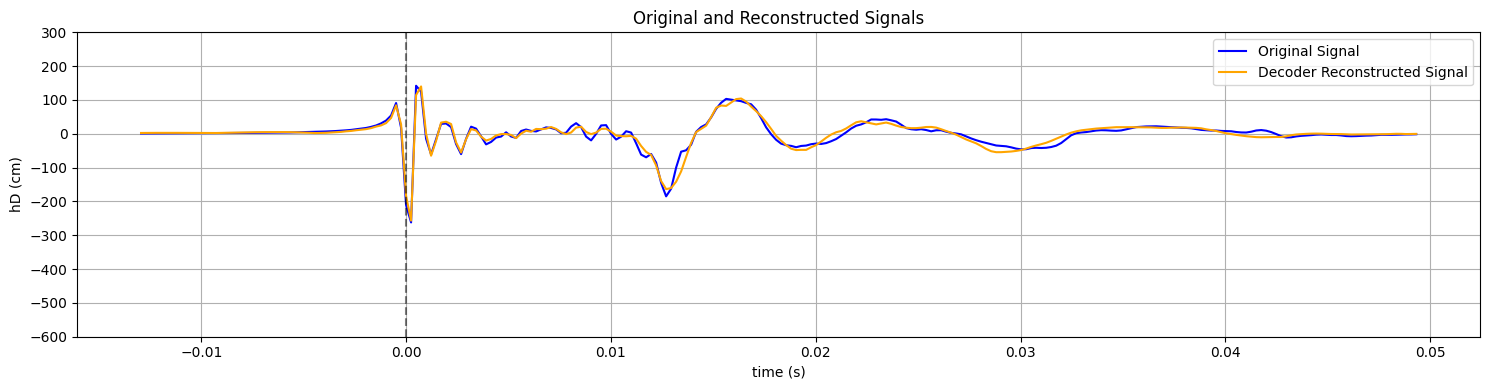

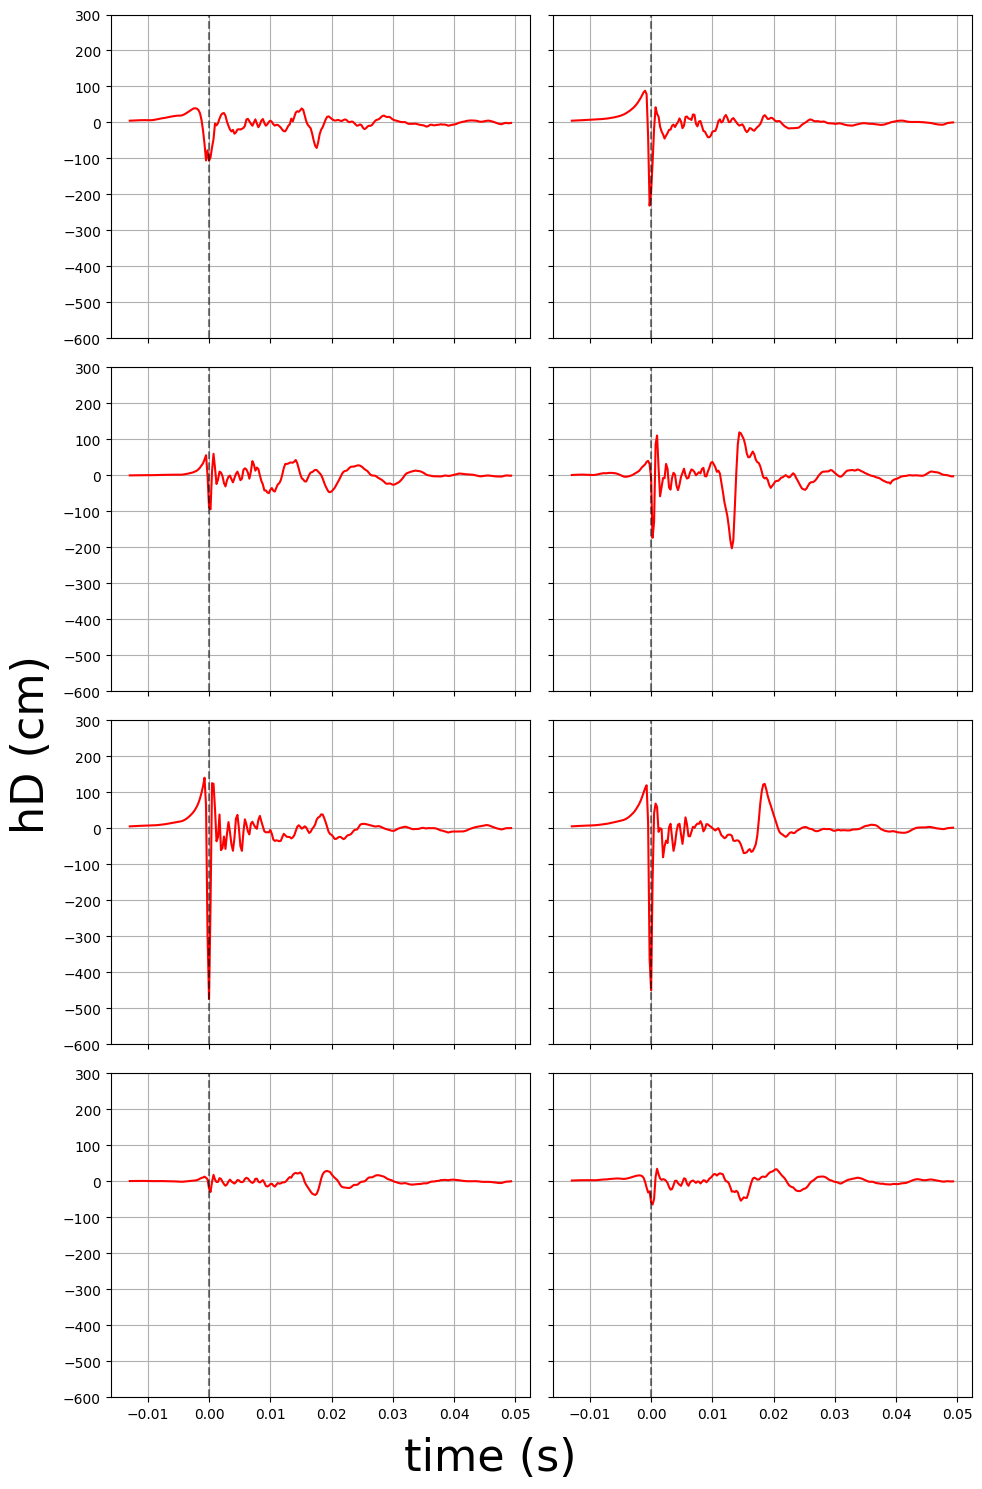

Epoch 271 complete! 	Average Loss: 28.2275
Epoch 272 complete! 	Average Loss: 28.6318
Epoch 273 complete! 	Average Loss: 28.3022
Epoch 274 complete! 	Average Loss: 28.4531
Epoch 275 complete! 	Average Loss: 28.1952
Epoch 276 complete! 	Average Loss: 28.4112
Epoch 277 complete! 	Average Loss: 28.5379
Epoch 278 complete! 	Average Loss: 28.5531
Epoch 279 complete! 	Average Loss: 28.6024
Epoch 280 complete! 	Average Loss: 28.5771


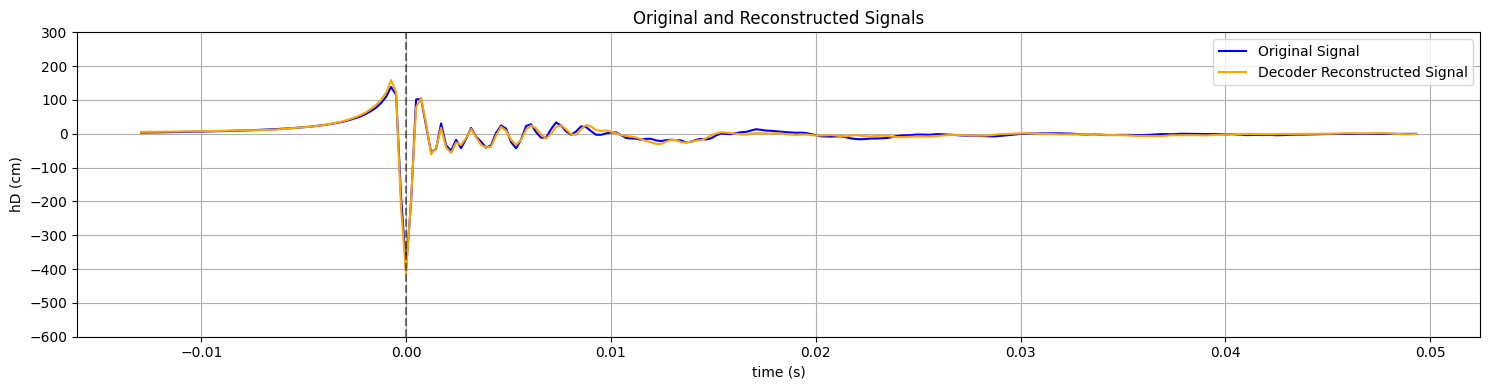

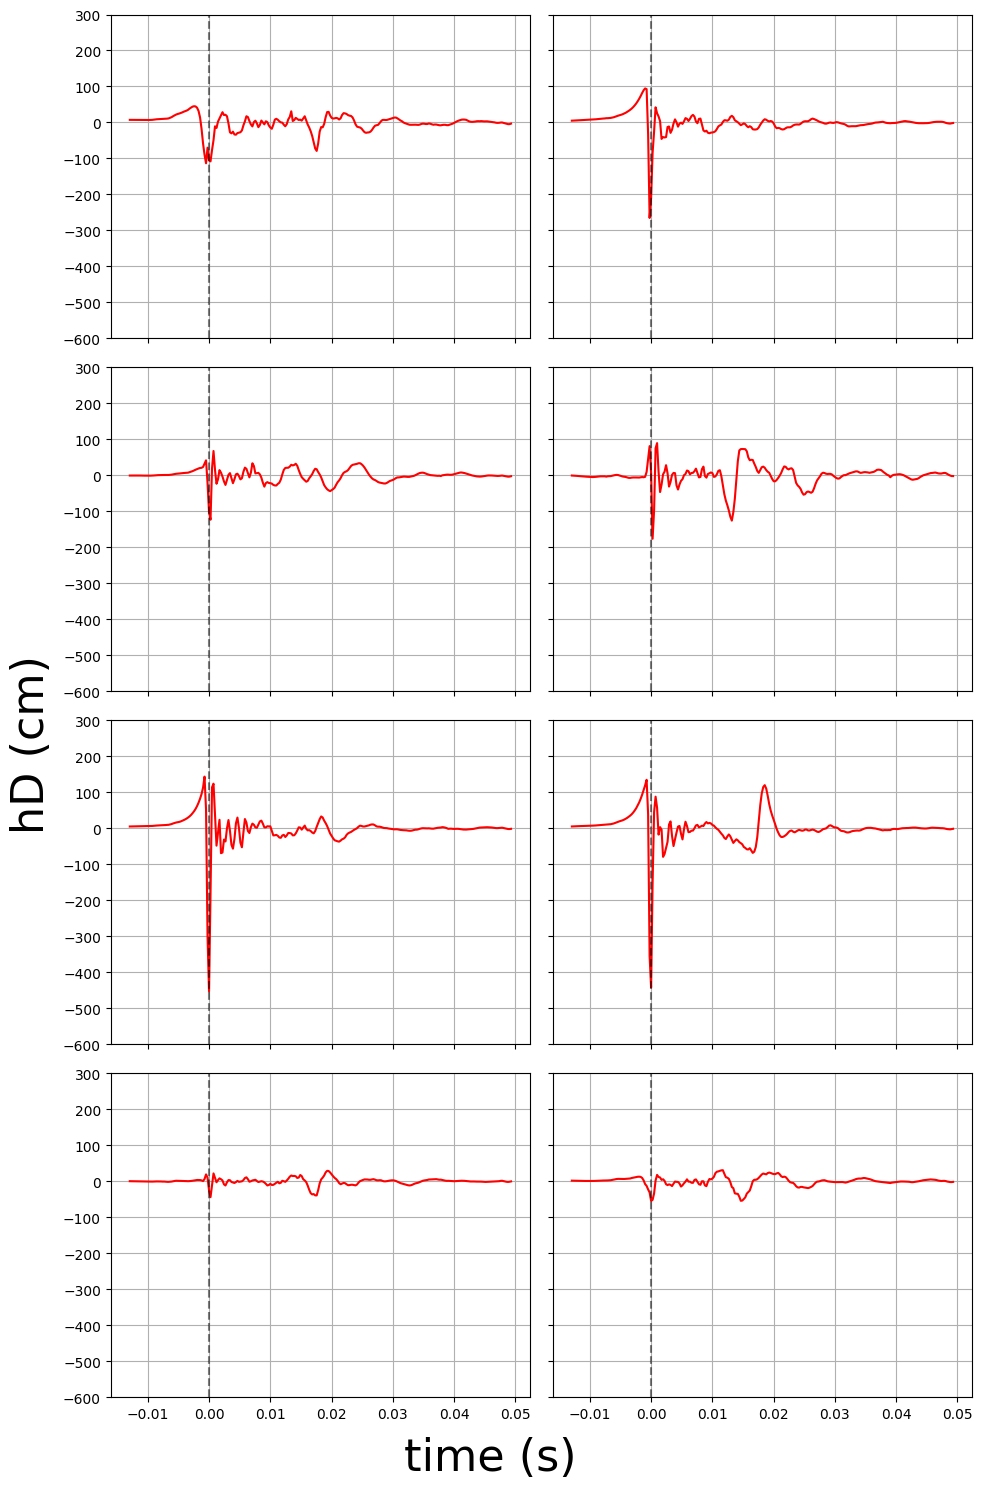

Epoch 281 complete! 	Average Loss: 28.3669
Epoch 282 complete! 	Average Loss: 28.4347
Epoch 283 complete! 	Average Loss: 28.3738
Epoch 284 complete! 	Average Loss: 28.1880
Epoch 285 complete! 	Average Loss: 28.1751
Epoch 286 complete! 	Average Loss: 28.1718
Epoch 287 complete! 	Average Loss: 28.2456
Epoch 288 complete! 	Average Loss: 28.2887
Epoch 289 complete! 	Average Loss: 28.3107
Epoch 290 complete! 	Average Loss: 28.1729


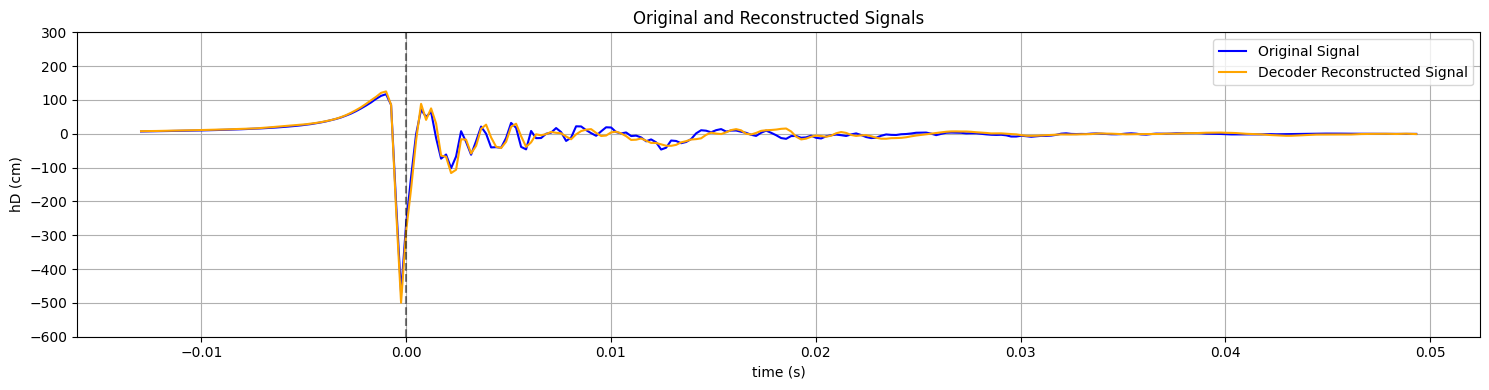

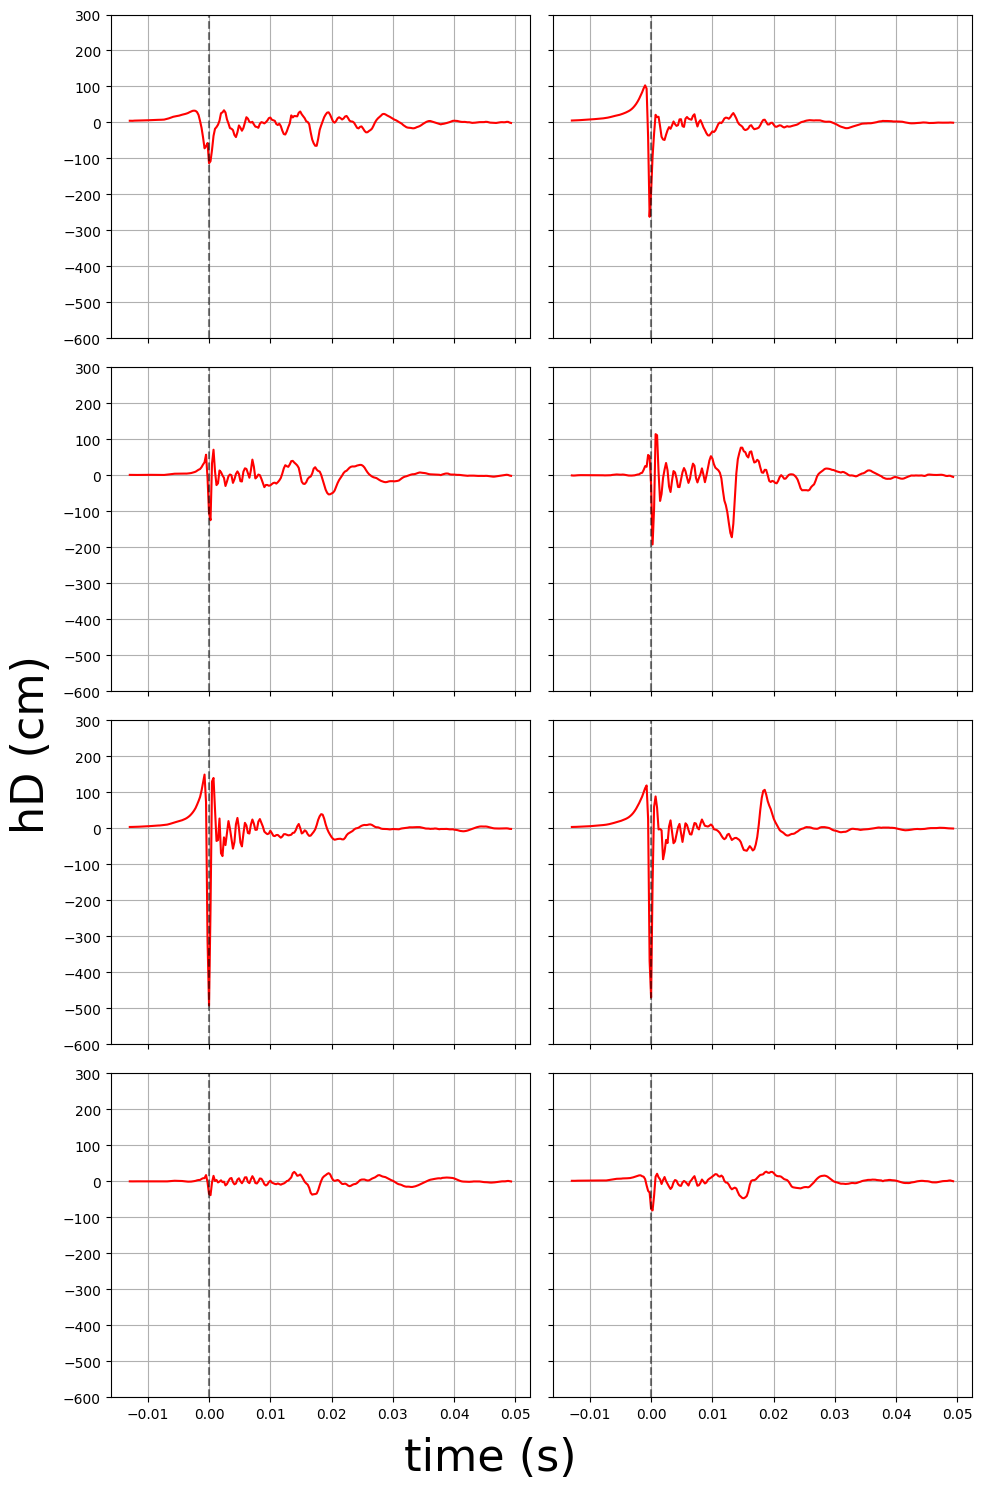

Epoch 291 complete! 	Average Loss: 28.2405
Epoch 292 complete! 	Average Loss: 28.0597
Epoch 293 complete! 	Average Loss: 28.1037
Epoch 294 complete! 	Average Loss: 28.3541
Epoch 295 complete! 	Average Loss: 28.1573
Epoch 296 complete! 	Average Loss: 27.9756
Epoch 297 complete! 	Average Loss: 28.5253
Epoch 298 complete! 	Average Loss: 28.2178
Epoch 299 complete! 	Average Loss: 28.0971
Epoch 300 complete! 	Average Loss: 28.2697


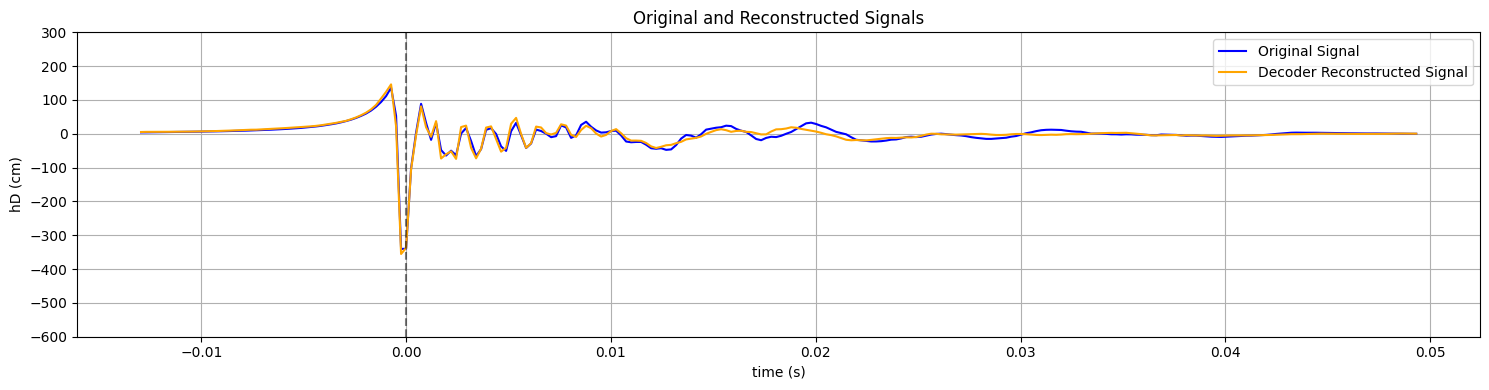

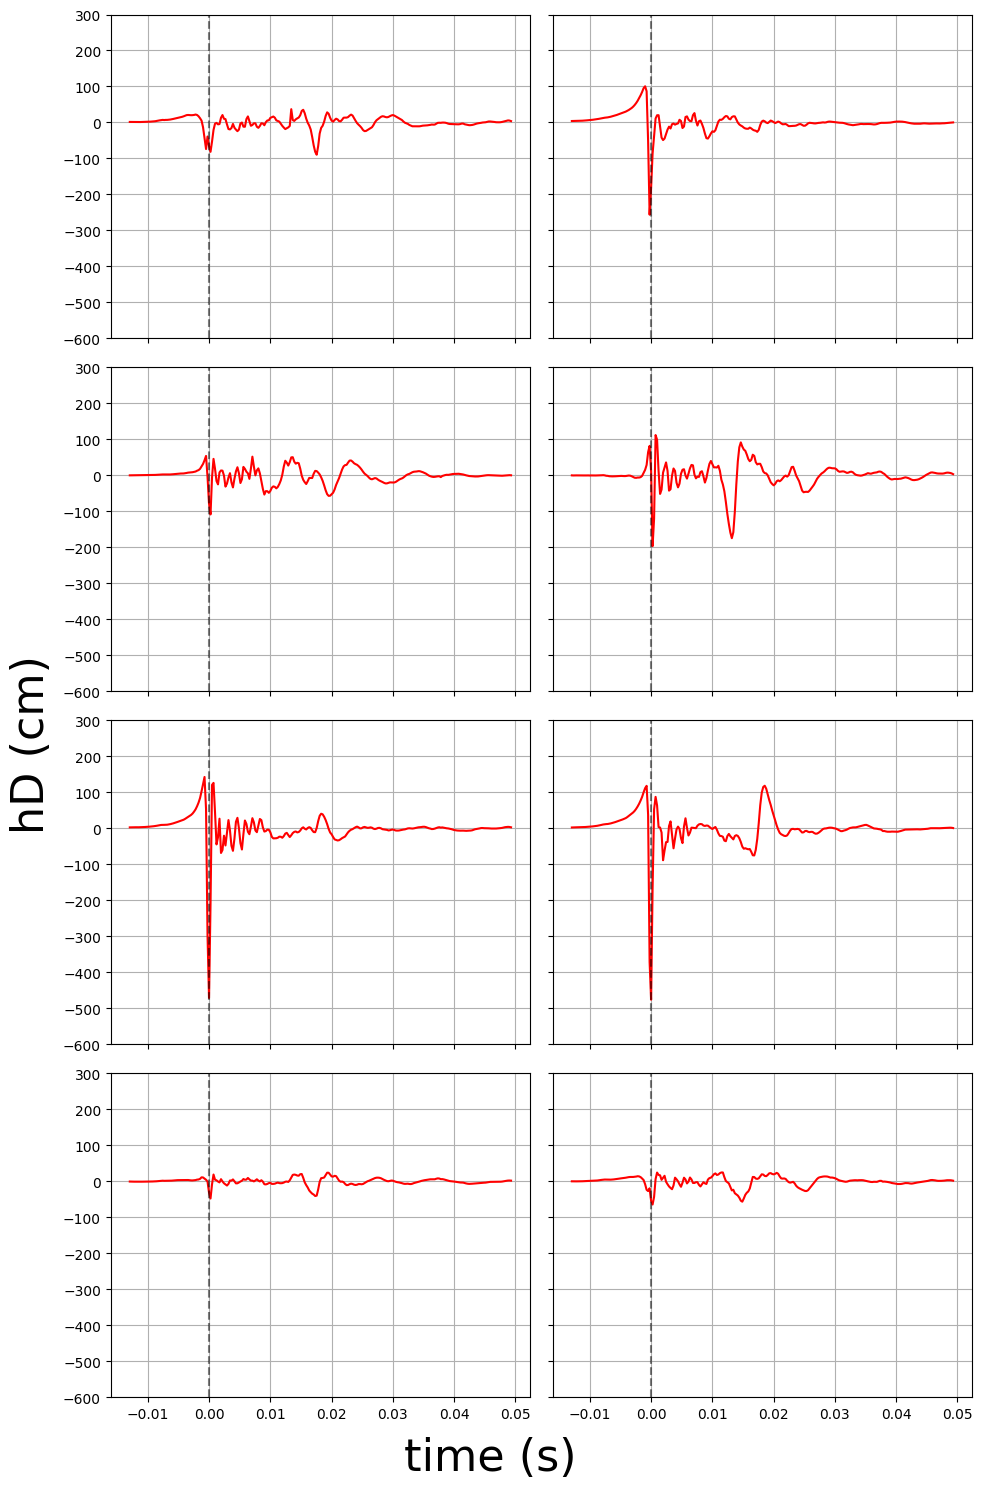

Epoch 301 complete! 	Average Loss: 28.0038
Epoch 302 complete! 	Average Loss: 28.4234
Epoch 303 complete! 	Average Loss: 28.2568
Epoch 304 complete! 	Average Loss: 28.3372
Epoch 305 complete! 	Average Loss: 28.1445
Epoch 306 complete! 	Average Loss: 27.9928
Epoch 307 complete! 	Average Loss: 28.0229
Epoch 308 complete! 	Average Loss: 27.9955
Epoch 309 complete! 	Average Loss: 28.7215
Epoch 310 complete! 	Average Loss: 27.9874


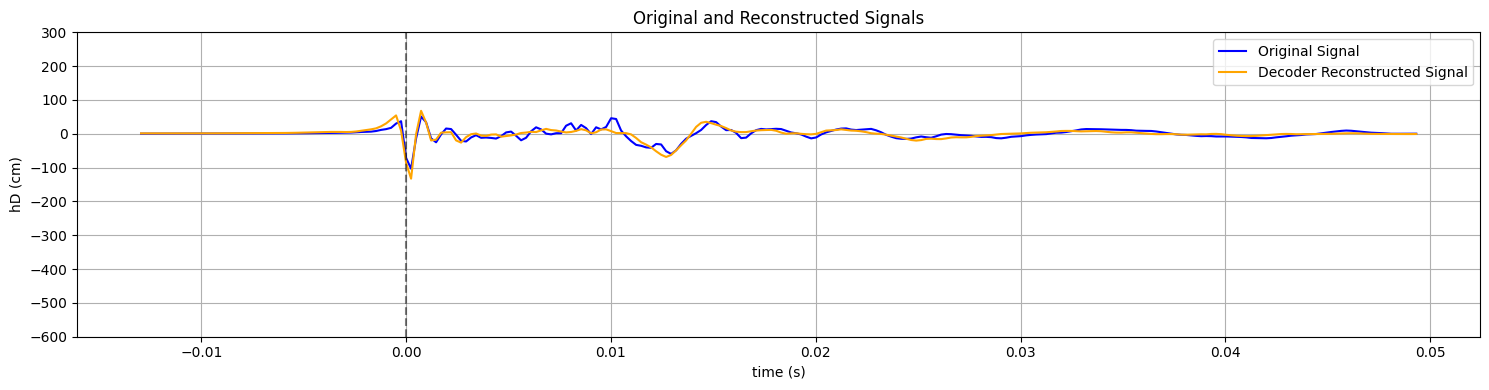

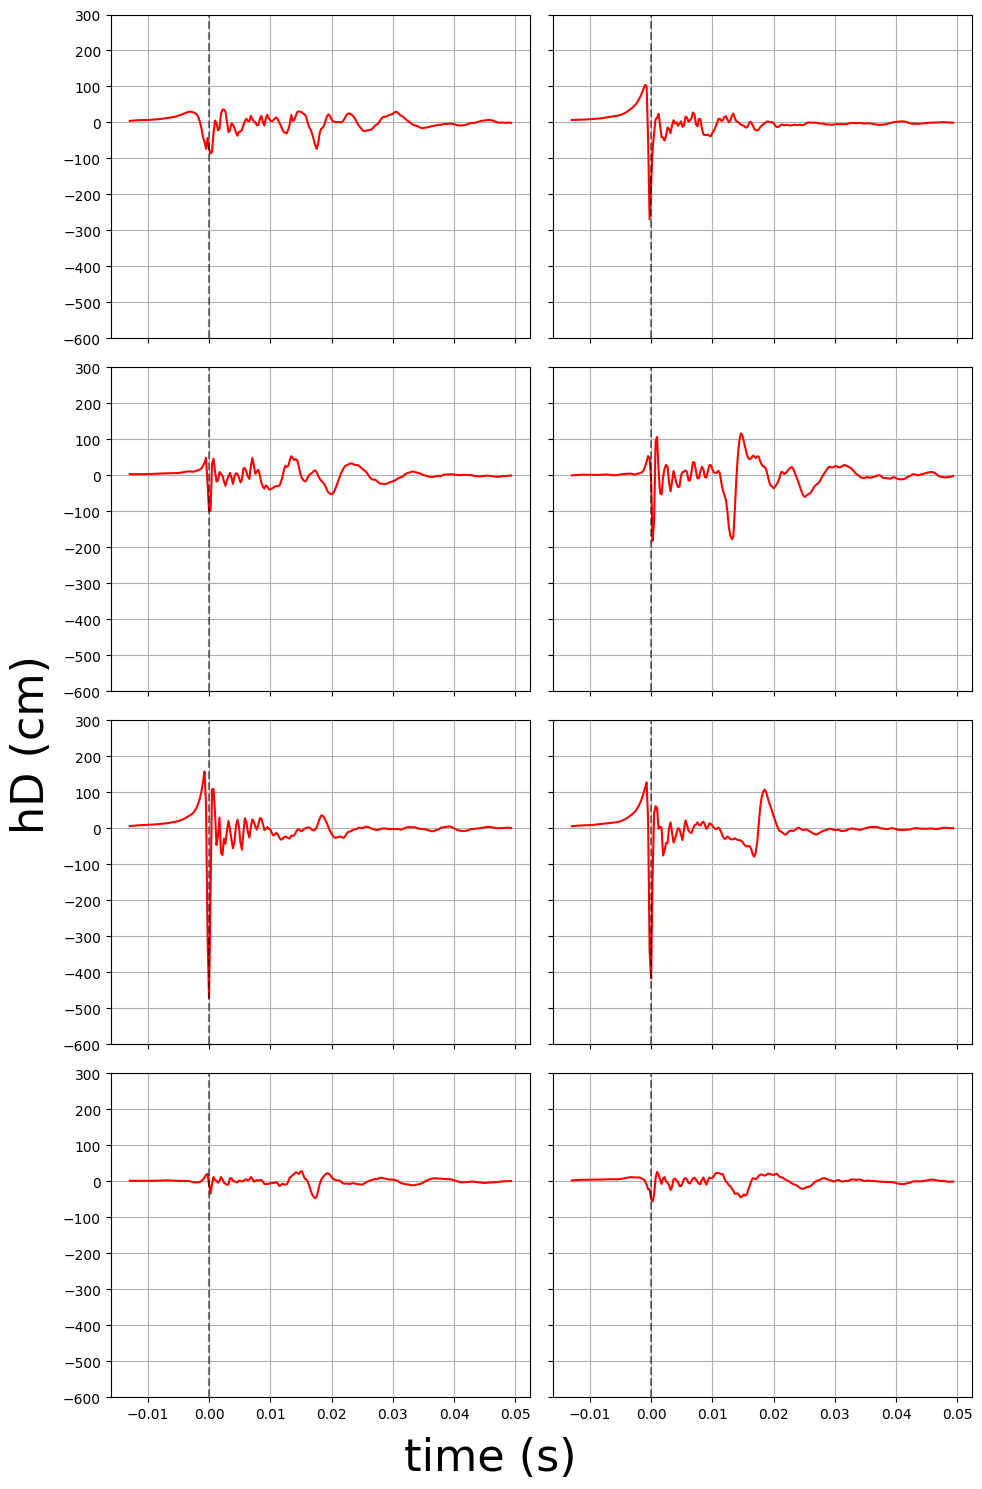

Epoch 311 complete! 	Average Loss: 28.3140
Epoch 312 complete! 	Average Loss: 28.1206
Epoch 313 complete! 	Average Loss: 28.2041
Epoch 314 complete! 	Average Loss: 28.1556
Epoch 315 complete! 	Average Loss: 28.2207
Epoch 316 complete! 	Average Loss: 27.9865
Epoch 317 complete! 	Average Loss: 28.1197
Epoch 318 complete! 	Average Loss: 28.0231
Epoch 319 complete! 	Average Loss: 27.8927
Epoch 320 complete! 	Average Loss: 28.1520


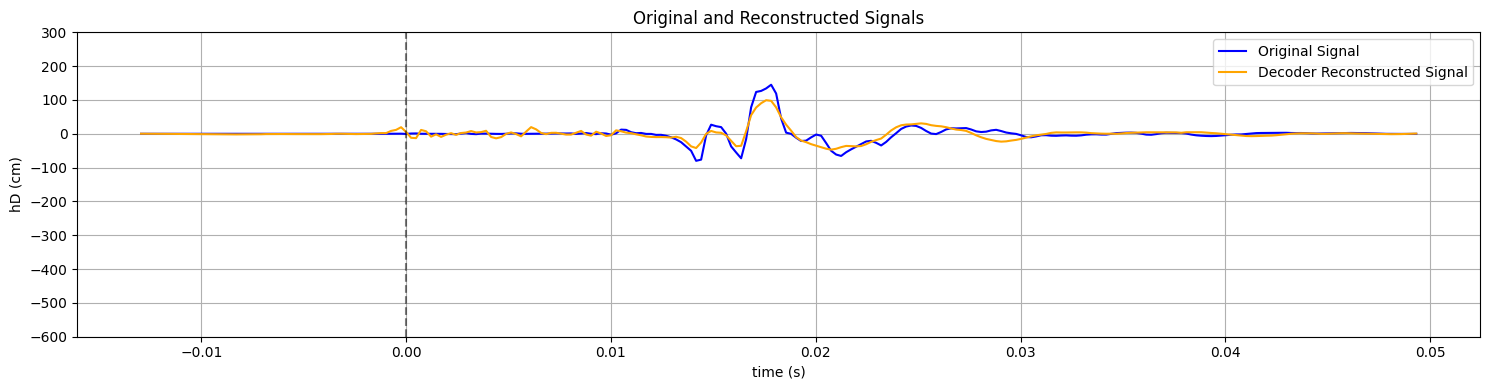

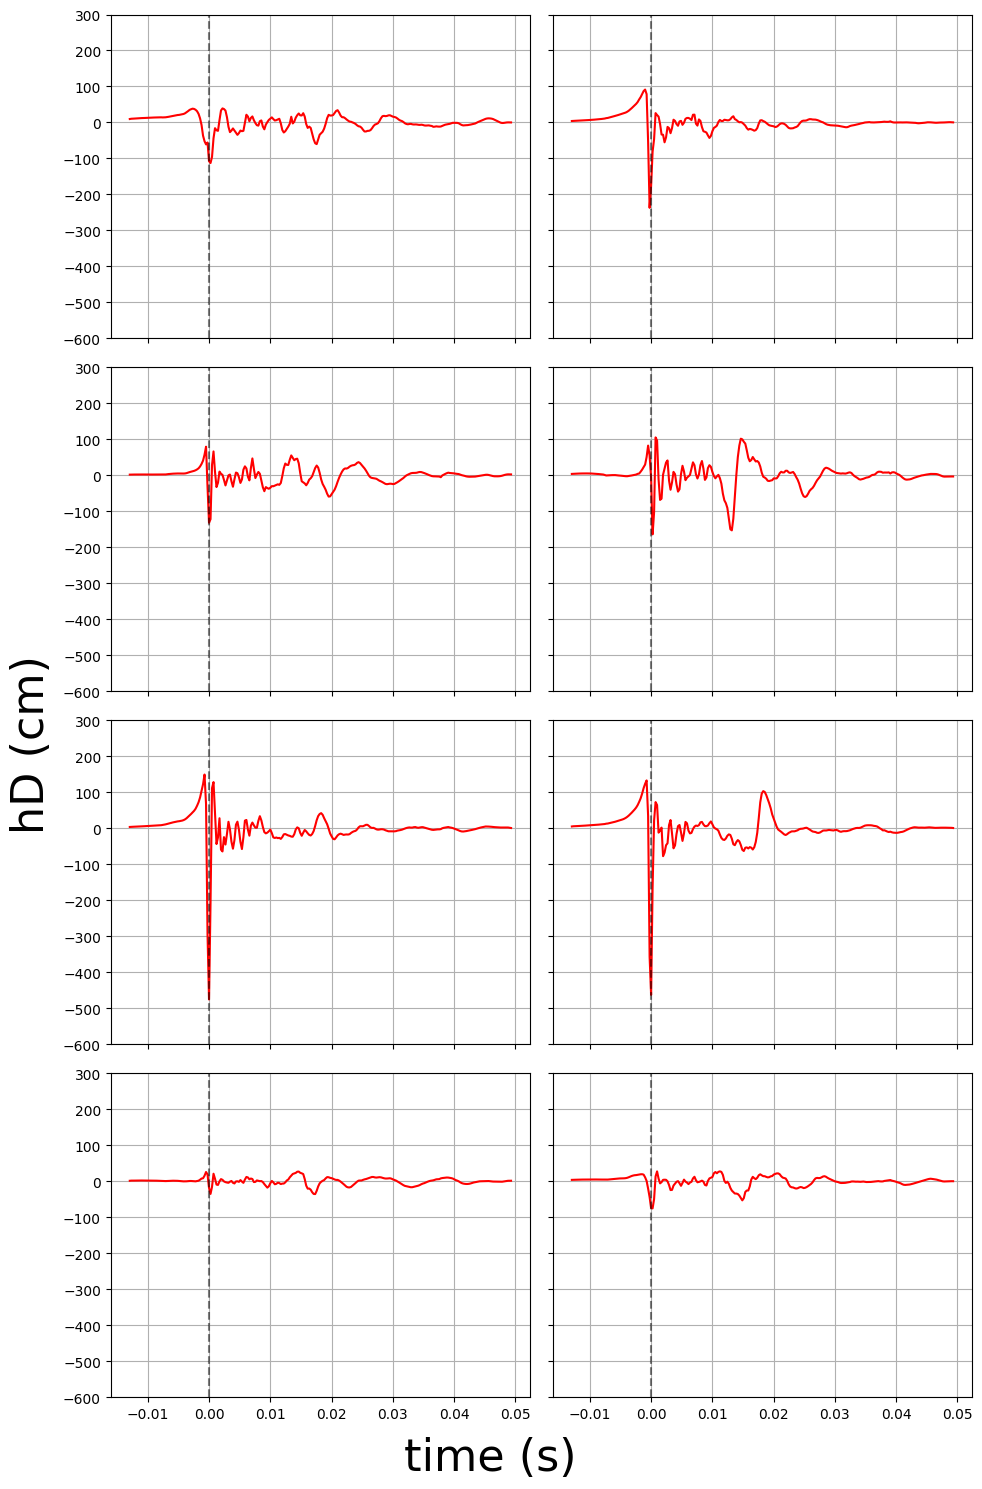

Training finished!


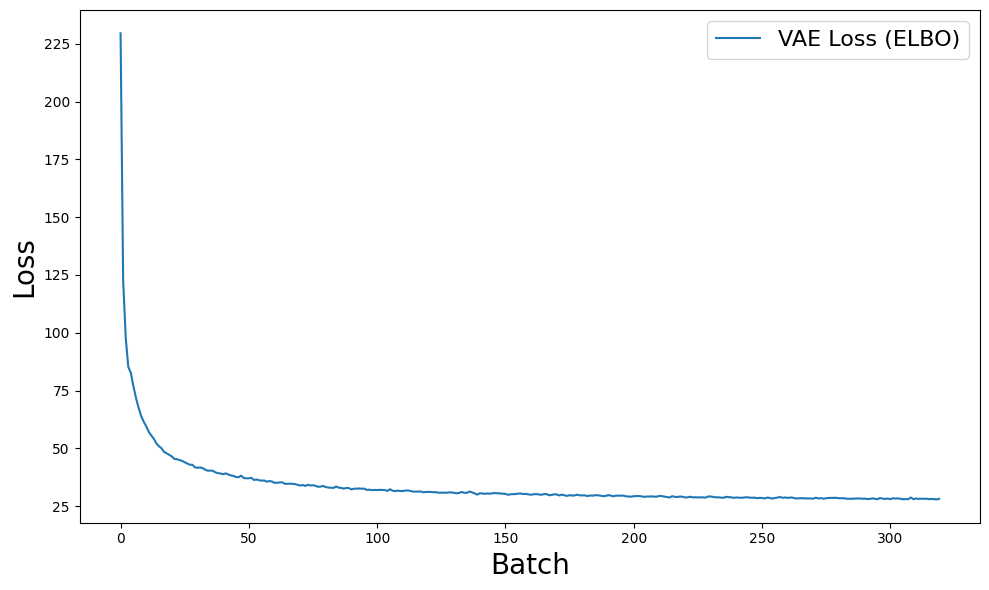

In [10]:
print("Start training VAE...")
model.train()

avg_total_losses = []
avg_reproduction_losses = []
avg_KLDs = []

noise = torch.randn(batch_size, latent_dim).to(DEVICE)

for epoch in range(epochs):
    overall_total_loss = 0
    overall_reproduction_loss = 0
    overall_KLD = 0

    total_samples = 0

    for batch_idx, x in enumerate(train_dataloader, 0):
        x = x.view(x.size(0), -1)  # Reshape to (batch_size, 256) if needed
        x = x.to(DEVICE)

        optimizer.zero_grad()

        x_hat, mean, log_var = model(x)
        total_loss, reproduction_loss, KLD = loss_function(x, x_hat, mean, log_var)
        
        overall_total_loss += total_loss.item()
        overall_reproduction_loss += reproduction_loss.item()
        overall_KLD += KLD.item()
        total_samples += x.size(0)

        total_loss.backward()
        optimizer.step()

    avg_total_loss = overall_total_loss / total_samples
    avg_reproduction_loss = overall_reproduction_loss / total_samples
    avg_KLD = overall_KLD / total_samples

    avg_total_losses.append(avg_total_loss)
    avg_reproduction_losses.append(avg_reproduction_loss)
    avg_KLDs.append(avg_KLD)

    print(f"Epoch {epoch + 1} complete! \tAverage Loss: {avg_total_loss:.4f}")

    if (epoch + 1) % 10 == 0:
        x = x.cpu().detach()
        x_hat = x_hat.cpu().detach()
        plot_reconstruction(x[0], x_hat[0], max_value=train_dataset.max_value)

        with torch.no_grad():
            generated_signals = decoder(noise).cpu().detach().numpy()
        
        plot_waveform_grid(signals=generated_signals, max_value=train_dataset.max_value)

print("Training finished!")

### Loss

In [ ]:
plot_loss(avg_losses)

### Morph Between Two Signals